# **Project: Campaign Expenditure Prediction**


--------------
## **Business Case:**
--------------

We are a consulting agency specializing in advising prospective state-level political candidates on effectively anticipating their campaign budget needs. Our goal is to assist these candidates in developing strategic budget allocations that maximize campaign efficiency and impact. To achieve this, we will build a regression model that leverages insights from the '2005 Campaign Expenditure' dataset. This model will incorporate key features and factors influencing campaign costs, providing candidates with data-driven guidance to determine an optimal expenditure amount that aligns with their campaign goals and resources.

-----------------------------
## **Dataset:**
-----------------------------

**The Campaign Expenditure dataset contains the following attributes:**

-  ELECTION

Description: The election cycle when the expenditure was recorded.
Notes: Identifies the specific election context for the data.

- OFFICECD

Description: The office for which the candidate is running.
Notes: Coded as 1=Mayor, 2=Public Advocate, 3=Comptroller, 4=Borough President, 5=City Council, 6=Undeclared.

- CANDID

Description: Candidate ID assigned by the Campaign Finance Board (CFB).
Notes: Unique identifier for each candidate.

- CANCLASS

Description: Campaign Finance Program Classification.
Notes: Indicates whether a candidate is a Participant, Non-Participant, Limited Participant, or Undetermined.

- CANDLAST

Description: Candidate's last name.
Notes: Last name of the candidate associated with the expenditure.

- CANDFIRST

Description: Candidate's first name.
Notes: First name of the candidate.

- CANDMI

Description: Candidate's middle initial.
Notes: Only included if applicable; may have missing values.

- COMMITTEE

Description: The ID of the committee associated with the candidate.
Notes: Represents the committee handling finances for the candidate.

- FILING

Description: Disclosure statement or filing period.
Notes: Indicates the reporting period for the expenditure.

- SCHEDULE

Description: Type of schedule for the expenditure.
Notes: Coded as ABC=Monetary Contributions, D=In-Kind Contributions, G=Transfers In, K=Loans/Liabilities Forgiven, M=Receipt Adjustments, N=Outstanding Liabilities.

- PAGENO

Description: Page number in the schedule for this expenditure.
Notes: May have missing values.

- SEQUENCENO

Description: Sequence number in the schedule.
Notes: A unique sequence within the schedule; may have missing values.

- REFNO

Description: Transaction reference number.
Notes: Unique identifier for each transaction.

- INV_DATE

Description: Date the invoice was issued.
Notes: Date format; some values may be missing.

- DATE

Description: Date the payment was received or recorded.
Notes: Represents the transaction's recorded date.

- NAME

Description: The payee’s name.
Notes: Indicates the recipient or vendor of the expenditure.

- C_CODE

Description: Vendor type.
Notes: Coded as CAN=Candidate, CORP=Corporation, IND=Individual, etc.

- ORG_IND

Description: Organization indicator.
Notes: Y=Vendor is an organization, N=Vendor is not.

- NUMBER

Description: Vendor's building number.
Notes: Street number of the vendor's address.

- STREET

Description: Vendor’s street address.
Notes: Street name where the vendor is located.

- UNIT

Description: Vendor's apartment or unit number.
Notes: Optional field for more detailed addresses.

- CITY

Description: Vendor's city.
Notes: Location information for the vendor.

- STATE

Description: Vendor's state.
Notes: U.S. state or international region where the vendor is located.

- Postcode

Description: Vendor's ZIP code.
Notes: Postal code for the vendor's address.

- Latitude

Description: Latitude coordinate for the vendor's address.
Notes: Geolocation information; may be missing.

- Longitude

Description: Longitude coordinate for the vendor's address.
Notes: Geolocation information; may be missing.

- Community Board

Description: New York City Community Board code.
Notes: Used to identify local regions within NYC.

- Community Council

Description: Community Council district.
Notes: Represents local councils in NYC.

- Census Tract

Description: Census tract for the vendor's location.
Notes: Geographic unit used by the U.S. Census Bureau.

- BIN

Description: Building Identification Number.
Notes: Unique identifier for NYC buildings.

- BBL

Description: Borough, Block, and Lot identifier.
Notes: Unique code for property parcels in NYC.

- NTA

Description: Neighborhood Tabulation Area.
Notes: Geographic designation for neighborhood analysis.

- Borough

Description: Borough in NYC.
Notes: 1=Manhattan, 2=Bronx, 3=Brooklyn, 4=Queens, 5=Staten Island.

- PAY_METHOD

Description: Payment method used for the transaction.
Notes: ADVANCE=Advance Payment, FINAL=Final Payment, PART=Partial Payment, etc.

- AMNT

Description: The amount spent in the transaction.
Notes: Currency value indicating the transaction amount.

- PURPOSECD

Description: Purpose code for the transaction.
Notes: Coded as TVADS=TV Ads, FUNDR=Fundraising, etc.

- PURPOSE

Description: Description of the expenditure.
Notes: Text-based detail of the transaction's purpose.

- EXPLAIN

Description: Explanation of the expenditure.
Notes: Optional field for additional details.

- EXEMPTCD

Description: Exemption code.
Notes: Compliance-related information; C=Compliance Costs, U=Unknown, etc.

- RR_IND

Description: Run-off or re-run indicator.
Notes: Y=Yes, N=No.

- SEG_IND

Description: Segregated indicator.
Notes: Used for specific financial reporting purposes.


#Importing Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Import necessary libraries
from google.colab import drive
import pandas as pd

# Step 2: Mount Google Drive
drive.mount('/content/drive')

# Step 3: Load the CSV file from Google Drive
# Update the file path to point to the 'Hult' folder
file_path = '/content/drive/My Drive/Hult/2005_Campaign_Expenditures_20241016.csv'
df = pd.read_csv(file_path)

# Step 4: Display the first few rows of the DataFrame
print(df.head())

Mounted at /content/drive
   ELECTION  OFFICECD CANDID CANCLASS      CANDLAST CANDFIRST CANDMI  \
0      2005         4    206        P       Manzano    Carlos    NaN   
1      2005         4     ED        P  Carrion, Jr.    Adolfo    NaN   
2      2005         4     ED        P  Carrion, Jr.    Adolfo    NaN   
3      2005         4     BW        P     Moskowitz       Eva      S   
4      2005         5    232        P        Weprin     David      I   

  COMMITTEE  FILING SCHEDULE  ...                   NTA    Borough PAY_METHOD  \
0         K       5        F  ...               Clinton  MANHATTAN      Final   
1         J       8        F  ...  Murray Hill-Kips Bay  MANHATTAN      Final   
2         J       5        F  ...  Murray Hill-Kips Bay  MANHATTAN      Final   
3         A      10        F  ...                   NaN        NaN      Final   
4         K      17        F  ...                   NaN        NaN      Final   

   AMNT PURPOSECD           PURPOSE        EXPLAIN EXE

<ipython-input-2-44c76a11a199>:11: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
df.head(10)

,ELECTION,OFFICECD,CANDID,CANCLASS,CANDLAST,CANDFIRST,CANDMI,COMMITTEE,FILING,SCHEDULE,...,NTA,Borough,PAY_METHOD,AMNT,PURPOSECD,PURPOSE,EXPLAIN,EXEMPTCD,RR_IND,SEG_IND
0,2005,4,206,P,Manzano,Carlos,NaN,K,5,F,...,Clinton,MANHATTAN,Final,918,FUNDR,Fundraising,Catered Event,NaN,N,N
1,2005,4,ED,P,"Carrion, Jr.",Adolfo,NaN,J,8,F,...,Murray Hill-Kips Bay,MANHATTAN,Final,3200,CNTRB,Polit Contribs.,EVENT TICKETS,NaN,N,N
2,2005,4,ED,P,"Carrion, Jr.",Adolfo,NaN,J,5,F,...,Murray Hill-Kips Bay,MANHATTAN,Final,1500,OTHER,Other: explntion,EVENT TICKETS,NaN,N,N
3,2005,4,BW,P,Moskowitz,Eva,S,A,10,F,...,NaN,NaN,Final,55,OTHER,Other: explntion,Flowers,NaN,N,N
4,2005,5,232,P,Weprin,David,I,K,17,F,...,NaN,NaN,Final,103,OTHER,Other: explntion,Flowers/Sick,NaN,N,N
5,2005,5,837,P,Nocerino,Joseph,R,H,8,F,...,NaN,NaN,Final,210,LITER,Campgn Lit.,Campaign Buttons,NaN,N,N
6,2005,5,837,P,Nocerino,Joseph,R,H,8,F,...,NaN,NaN,Final,538,LITER,Campgn Lit.,Campaign Buttons,NaN,N,N
7,2005,5,837,P,Nocerino,Joseph,R,H,8,F,...,NaN,NaN,Final,372,LITER,Campgn Lit.,Campaign Buttons,NaN,N,N
8,2005,5,837,P,Nocerino,Joseph,R,H,8,F,...,NaN,NaN,Final,373,LITER,Campgn Lit.,Campaign Buttons,NaN,N,N
9,2005,1,AY,P,Ferrer,Fernando,NaN,I,17,F,...,Hudson Yards-Chelsea-Flatiron-Union Square,MANHATTAN,Final,23,OTHER,Other: explntion,Parking,NaN,N,N


#Dimension / Shape

In [ ]:
df.shape

(58528, 41)

The dataset has 58528 rows and 41 columns

#Missing Values

In [ ]:
df.isna().sum()

,0
ELECTION,0
OFFICECD,0
CANDID,0
CANCLASS,0
CANDLAST,0
CANDFIRST,0
CANDMI,26339
COMMITTEE,0
FILING,0
SCHEDULE,0


In [ ]:
df.isnull().sum()

,0
ELECTION,0
OFFICECD,0
CANDID,0
CANCLASS,0
CANDLAST,0
CANDFIRST,0
CANDMI,26339
COMMITTEE,0
FILING,0
SCHEDULE,0


The dataset reveals varying levels of missing values across different columns, with some columns like 'Latitude', 'Longitude', 'Community Board', 'CANDMI', 'PAGENO', 'SEQUENCENO', 'UNIT', and 'EXEMPTCD' having a substantial number of missing entries, indicating incomplete information for these fields.

The presence of missing values in these columns suggests the need for data imputation or careful exclusion to avoid biases during analysis and modeling via feature selection.

In [ ]:

# List of columns to drop (correct the column names to match actual columns)
columns_to_drop = [
    'CANDID', 'CANDLAST', 'CANDFIRST', 'CANDMI', 'COMMITTEE',
    'PAGENO', 'SEQUENCENO', 'REFNO', 'NAME', 'PURPOSE',
    'RR_IND', 'SEG_IND', 'ELECTION', 'BIN', 'BBL', 'INV_DATE', 'DATE', 'EXPLAIN'
]

# Drop the columns that are present in the DataFrame
df_cleaned = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Fill missing numeric columns with their respective median values
df_cleaned = df_cleaned.fillna(df_cleaned.median(numeric_only=True))

# Verify the cleaned DataFrame
print("Cleaned DataFrame info:\n", df_cleaned.info())
print("First few rows of the cleaned data:\n", df_cleaned.head())
# Check remaining missing values in the cleaned DataFrame
missing_values_after_cleaning = df_cleaned.isnull().sum()
print("Remaining missing values in each column:\n", missing_values_after_cleaning)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58528 entries, 0 to 58527
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OFFICECD            58528 non-null  int64  
 1   CANCLASS            58528 non-null  object 
 2   FILING              58528 non-null  int64  
 3   SCHEDULE            58528 non-null  object 
 4   C_CODE              58528 non-null  object 
 5   ORG_IND             58528 non-null  object 
 6   NUMBER              49616 non-null  object 
 7   STREET              54566 non-null  object 
 8   UNIT                13857 non-null  object 
 9   CITY                54870 non-null  object 
 10  STATE               55006 non-null  object 
 11  Postcode            52295 non-null  object 
 12  Latitude            58528 non-null  float64
 13  Longitude           58528 non-null  float64
 14  Community Board     58528 non-null  float64
 15  Community Council   58528 non-null  float64
 16  Cens

Several columns were dropped to reduce dataset dimensionality and narrow down the choices of features for modeling.

In [ ]:
# Fill missing values in numeric columns with the median
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())

# Fill missing values in categorical columns with the mode (most frequent value)
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna(df_cleaned[categorical_cols].mode().iloc[0])

# Verify the cleaned DataFrame after filling missing values
print("Cleaned DataFrame after filling missing values:\n", df_cleaned.info())
print("First few rows of cleaned data:\n", df_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58528 entries, 0 to 58527
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OFFICECD            58528 non-null  int64  
 1   CANCLASS            58528 non-null  object 
 2   FILING              58528 non-null  int64  
 3   SCHEDULE            58528 non-null  object 
 4   C_CODE              58528 non-null  object 
 5   ORG_IND             58528 non-null  object 
 6   NUMBER              58528 non-null  object 
 7   STREET              58528 non-null  object 
 8   UNIT                58528 non-null  object 
 9   CITY                58528 non-null  object 
 10  STATE               58528 non-null  object 
 11  Postcode            58528 non-null  object 
 12  Latitude            58528 non-null  float64
 13  Longitude           58528 non-null  float64
 14  Community Board     58528 non-null  float64
 15  Community Council   58528 non-null  float64
 16  Cens

Missing values were imputed by using the median for the numerical features and the mode for the categorical features.

Imputing missing values with the median for numerical features is effective because the median is less affected by outliers than the mean, preserving the central tendency of the data without skewing results. For the categorical features, using the mode helps maintain the distribution of categories, ensuring the imputed values align with the most common patterns in the data. This approach helps retain the dataset's underlying structure while filling in gaps in a balanced manner.

In [ ]:
df_cleaned.isna().sum()

,0
OFFICECD,0
CANCLASS,0
FILING,0
SCHEDULE,0
C_CODE,0
ORG_IND,0
NUMBER,0
STREET,0
UNIT,0
CITY,0


In [ ]:
df_cleaned.isnull().sum()

,0
OFFICECD,0
CANCLASS,0
FILING,0
SCHEDULE,0
C_CODE,0
ORG_IND,0
NUMBER,0
STREET,0
UNIT,0
CITY,0


#Data Types

In [ ]:
df_cleaned.dtypes

,0
OFFICECD,int64
CANCLASS,object
FILING,int64
SCHEDULE,object
C_CODE,object
ORG_IND,object
NUMBER,object
STREET,object
UNIT,object
CITY,object


It is observed that several data types are misclassified.

In [ ]:
# Converting columns to correct data types
df_cleaned = df_cleaned.astype({
    'OFFICECD': 'int64',               # Office Sought - integer
    'CANCLASS': 'category',            # Campaign Finance Program Classification - categorical
    'FILING': 'int64',                 # Filing period - integer
    'SCHEDULE': 'category',            # Schedule - categorical
    'C_CODE': 'category',              # Vendor Type - categorical
    'ORG_IND': 'category',             # Organization Indicator - categorical
    'NUMBER': 'string',                # Vendor's Street Number - string
    'STREET': 'string',                # Vendor's Street Name - string
    'UNIT': 'string',                  # Vendor's Apartment Number - string
    'CITY': 'category',                # Vendor's City - categorical
    'STATE': 'category',               # Vendor's State - categorical
    'Postcode': 'string',              # Vendor's ZIP Code - string
    'Latitude': 'float64',             # Latitude - float
    'Longitude': 'float64',            # Longitude - float
    'Community Board': 'float64',      # Community Board - float (may contain missing values)
    'Census Tract': 'float64',         # Census Tract - float (may contain missing values)
    'NTA': 'category',                 # Neighborhood Tabulation Area - categorical
    'Borough': 'category',             # Borough - categorical
    'PAY_METHOD': 'category',          # Payment Method - categorical
    'PURPOSECD': 'category',           # Purpose Code - categorical
    'EXEMPTCD': 'category'             # Exempt Code - categorical
})

# Print dataframe info to verify changes
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58528 entries, 0 to 58527
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   OFFICECD            58528 non-null  int64   
 1   CANCLASS            58528 non-null  category
 2   FILING              58528 non-null  int64   
 3   SCHEDULE            58528 non-null  category
 4   C_CODE              58528 non-null  category
 5   ORG_IND             58528 non-null  category
 6   NUMBER              58528 non-null  string  
 7   STREET              58528 non-null  string  
 8   UNIT                58528 non-null  string  
 9   CITY                58528 non-null  category
 10  STATE               58528 non-null  category
 11  Postcode            58528 non-null  string  
 12  Latitude            58528 non-null  float64 
 13  Longitude           58528 non-null  float64 
 14  Community Board     58528 non-null  float64 
 15  Community Council   58528 non-null  

All the data types are now correctly classified, they consist of int64, category, string, and float64 data types.

In [ ]:
df_cleaned.head()

,OFFICECD,CANCLASS,FILING,SCHEDULE,C_CODE,ORG_IND,NUMBER,STREET,UNIT,CITY,...,Longitude,Community Board,Community Council,Census Tract,NTA,Borough,PAY_METHOD,AMNT,PURPOSECD,EXEMPTCD
0,4,P,5,F,CORP,Y,735,Tenth Avenue,450,New York,...,-73.991867,104.0,3.0,129.0,Clinton,MANHATTAN,Final,918,FUNDR,C
1,4,P,8,F,CORP,Y,355,Lexington Ave.,3RDFL,New York,...,-73.976909,106.0,4.0,80.0,Murray Hill-Kips Bay,MANHATTAN,Final,3200,CNTRB,C
2,4,P,5,F,CORP,Y,355,Lexington Ave.,3RDFL,New York,...,-73.976909,106.0,4.0,80.0,Murray Hill-Kips Bay,MANHATTAN,Final,1500,OTHER,C
3,4,P,10,F,CORP,Y,225,Broadway,450,New York,...,-73.967973,112.0,10.0,171.0,Midtown-Midtown South,MANHATTAN,Final,55,OTHER,C
4,5,P,17,F,CORP,Y,225,Broadway,450,NY,...,-73.967973,112.0,10.0,171.0,Midtown-Midtown South,MANHATTAN,Final,103,OTHER,C


#Cleaning Data After Converting Data Types

In [ ]:
df_cleaned.isna().sum()

,0
OFFICECD,0
CANCLASS,0
FILING,0
SCHEDULE,0
C_CODE,0
ORG_IND,0
NUMBER,0
STREET,0
UNIT,0
CITY,0


##Mapping Columns to reduce the number of Unique Values per Column

To ensure that all features are present and able to be analyzed effectively, all the categorical features will be mapped into sub-categories then be assigned dummy values, and have their data types converted to numerical features.

In [ ]:
# List of columns to drop (correct the column names to match actual columns)
columns_to_drop = [
    'NTA', 'STREET'
]

# Drop the columns that are present in the DataFrame
df_cleaned = df_cleaned.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Impute specific erroneous values in the 'STATE' column
df_cleaned['STATE'] = df_cleaned['STATE'].replace({
    'RX': 'TX',  # Replace 'RX' with 'TX'
    'NT': 'NY',  # Replace 'NT' with 'NY'
    'IO': 'IA'   # Replace 'IO' with 'IA'
})

# Define the mapping for grouping states/regions into 5 categories
state_group_mapping = {
    'NY': 'Mainland U.S.', 'FL': 'Mainland U.S.', 'CA': 'Mainland U.S.',
    'OH': 'Mainland U.S.', 'IL': 'Mainland U.S.', 'MA': 'Mainland U.S.',
    'CT': 'Mainland U.S.', 'DE': 'Mainland U.S.', 'NJ': 'Mainland U.S.',
    'VA': 'Mainland U.S.', 'OR': 'Mainland U.S.', 'PA': 'Mainland U.S.',
    'MD': 'Mainland U.S.', 'OK': 'Mainland U.S.', 'KY': 'Mainland U.S.',
    'WA': 'Mainland U.S.', 'IN': 'Mainland U.S.', 'TX': 'Mainland U.S.',
    'AZ': 'Mainland U.S.', 'AR': 'Mainland U.S.', 'TN': 'Mainland U.S.',
    'MN': 'Mainland U.S.', 'UT': 'Mainland U.S.', 'NV': 'Mainland U.S.',
    'GA': 'Mainland U.S.', 'MI': 'Mainland U.S.', 'WI': 'Mainland U.S.',
    'IA': 'Mainland U.S.', 'LA': 'Mainland U.S.', 'ID': 'Mainland U.S.',
    'VT': 'Mainland U.S.', 'CO': 'Mainland U.S.', 'RI': 'Mainland U.S.',
    'ME': 'Mainland U.S.', 'NE': 'Mainland U.S.', 'NC': 'Mainland U.S.',
    'AL': 'Mainland U.S.', 'NH': 'Mainland U.S.', 'MO': 'Mainland U.S.',
    'SD': 'Mainland U.S.', 'MT': 'Mainland U.S.', 'NM': 'Mainland U.S.',
    'KS': 'Mainland U.S.', 'WY': 'Mainland U.S.', 'ND': 'Mainland U.S.',
    'SC': 'Mainland U.S.', 'WV': 'Mainland U.S.',  # Add WV to Mainland U.S.
    'DC': 'U.S. Territories and DC', 'PR': 'U.S. Territories and DC',
    'MX': 'Foreign', 'UK': 'Foreign', 'QC': 'Foreign',
    'IS': 'Foreign', 'AN': 'Foreign', 'DR': 'Foreign'  # Add IS, AN, DR to Foreign
}

# Set the categories explicitly for 'State_Group'
df_cleaned['STATE'] = df_cleaned['STATE'].astype('category')
df_cleaned['State_Group'] = df_cleaned['STATE'].replace(state_group_mapping)
df_cleaned['State_Group'] = df_cleaned['State_Group'].astype('category')


# Display the first few rows to verify the changes
df_cleaned.head(10)


<ipython-input-15-e8a186b3e2f6>:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_cleaned['STATE'] = df_cleaned['STATE'].replace({
<ipython-input-15-e8a186b3e2f6>:41: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_cleaned['State_Group'] = df_cleaned['STATE'].replace(state_group_mapping)


,OFFICECD,CANCLASS,FILING,SCHEDULE,C_CODE,ORG_IND,NUMBER,UNIT,CITY,STATE,...,Longitude,Community Board,Community Council,Census Tract,Borough,PAY_METHOD,AMNT,PURPOSECD,EXEMPTCD,State_Group
0,4,P,5,F,CORP,Y,735,450,New York,NY,...,-73.991867,104.0,3.0,129.0,MANHATTAN,Final,918,FUNDR,C,Mainland U.S.
1,4,P,8,F,CORP,Y,355,3RDFL,New York,NY,...,-73.976909,106.0,4.0,80.0,MANHATTAN,Final,3200,CNTRB,C,Mainland U.S.
2,4,P,5,F,CORP,Y,355,3RDFL,New York,NY,...,-73.976909,106.0,4.0,80.0,MANHATTAN,Final,1500,OTHER,C,Mainland U.S.
3,4,P,10,F,CORP,Y,225,450,New York,NY,...,-73.967973,112.0,10.0,171.0,MANHATTAN,Final,55,OTHER,C,Mainland U.S.
4,5,P,17,F,CORP,Y,225,450,NY,NY,...,-73.967973,112.0,10.0,171.0,MANHATTAN,Final,103,OTHER,C,Mainland U.S.
5,5,P,8,F,OTHR,Y,5703,187,Winter Springs,FL,...,-73.967973,112.0,10.0,171.0,MANHATTAN,Final,210,LITER,C,Mainland U.S.
6,5,P,8,F,OTHR,Y,5703,187,Winter Springs,FL,...,-73.967973,112.0,10.0,171.0,MANHATTAN,Final,538,LITER,C,Mainland U.S.
7,5,P,8,F,OTHR,Y,5703,187,Winter Springs,FL,...,-73.967973,112.0,10.0,171.0,MANHATTAN,Final,372,LITER,C,Mainland U.S.
8,5,P,8,F,OTHR,Y,5703,187,Winter Springs,FL,...,-73.967973,112.0,10.0,171.0,MANHATTAN,Final,373,LITER,C,Mainland U.S.
9,1,P,17,F,CORP,Y,101,450,New York,NY,...,-73.993226,104.0,3.0,91.0,MANHATTAN,Final,23,OTHER,C,Mainland U.S.


There are many different states that are listed under the 'STATE' column, hence they will be mapped into groups of three (Mainland U.S., U.S. Territories, and D.C., and Foreign) under a new column called 'State_Group' to simplify the modeling process.

In [ ]:
# Define the mapping for the 7 groups for C_CODE
c_code_mapping_7_groups = {
    'CAN': 'Candidate',
    'FAM': 'Family and Spouse',
    'SPO': 'Family and Spouse',
    'CORP': 'Business Entities',
    'LLC': 'Business Entities',
    'PART': 'Business Entities',
    'PCOMC': 'Committees - Candidate and PAC',
    'PCOMP': 'Committees - Candidate and PAC',
    'PCOMZ': 'Committees - Party',
    'IND': 'Individuals and Labor',
    'EMPO': 'Individuals and Labor',
    'OTHR': 'Other and Unknown',
    'UNKN': 'Other and Unknown'
}

# Apply the mapping to the 'C_CODE' column in the cleaned DataFrame
df_cleaned['C_CODE_Group'] = df_cleaned['C_CODE'].replace(c_code_mapping_7_groups)

# Define the mapping for the 6 groups for PURPOSECD
purpose_code_mapping_6_groups = {
    'CMAIL': 'Campaign Operations',
    'PRINT': 'Campaign Operations',
    'POSTA': 'Campaign Operations',
    'OFFCE': 'Campaign Operations',
    'RENTO': 'Campaign Operations',
    'WAGES': 'Campaign Operations',
    'TVADS': 'Media and Advertising',
    'RADIO': 'Media and Advertising',
    'LITER': 'Media and Advertising',
    'POLLS': 'Polling and Fundraising',
    'FUNDR': 'Polling and Fundraising',
    'COMPL': 'Compliance and Consultants',
    'CONSL': 'Compliance and Consultants',
    'PROFL': 'Compliance and Consultants',
    'CNTRB': 'Political Contributions and Voter Engagement',
    'CONSV': 'Political Contributions and Voter Engagement',
    'VOTER': 'Political Contributions and Voter Engagement',
    'ADVAN': 'Other and Miscellaneous',
    'INTER': 'Other and Miscellaneous',
    'PETIT': 'Other and Miscellaneous',
    'NQUAL': 'Other and Miscellaneous',
    'OTHER': 'Other and Miscellaneous',
    'UNKN': 'Other and Miscellaneous'
}

# Apply the mapping to the 'PURPOSECD' column in the cleaned DataFrame
df_cleaned['PURPOSECD_Group'] = df_cleaned['PURPOSECD'].replace(purpose_code_mapping_6_groups)

# Display the first few rows to verify the changes
df_cleaned[['C_CODE', 'C_CODE_Group', 'PURPOSECD', 'PURPOSECD_Group']].head(10)


<ipython-input-16-79470421018b>:19: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_cleaned['C_CODE_Group'] = df_cleaned['C_CODE'].replace(c_code_mapping_7_groups)
<ipython-input-16-79470421018b>:49: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_cleaned['PURPOSECD_Group'] = df_cleaned['PURPOSECD'].replace(purpose_code_mapping_6_groups)


,C_CODE,C_CODE_Group,PURPOSECD,PURPOSECD_Group
0,CORP,Business Entities,FUNDR,Polling and Fundraising
1,CORP,Business Entities,CNTRB,Political Contributions and Voter Engagement
2,CORP,Business Entities,OTHER,Other and Miscellaneous
3,CORP,Business Entities,OTHER,Other and Miscellaneous
4,CORP,Business Entities,OTHER,Other and Miscellaneous
5,OTHR,Other and Unknown,LITER,Media and Advertising
6,OTHR,Other and Unknown,LITER,Media and Advertising
7,OTHR,Other and Unknown,LITER,Media and Advertising
8,OTHR,Other and Unknown,LITER,Media and Advertising
9,CORP,Business Entities,OTHER,Other and Miscellaneous


There are also many corporation types under 'C_CODE' and many purpose types under 'PURPOSECD'. They both have been mapped into smaller sub-categories, thus we now have 2 new columns called 'C_CODE_Group' and 'PURPOSECD_Group' to simplify the modeling process.

In [ ]:
# Drop the specified columns from the DataFrame
columns_to_drop = ['CITY', 'STATE', 'UNIT', 'NUMBER', 'Postcode','PAY_METHOD','C_CODE','PURPOSECD']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Display the DataFrame info to verify the columns have been dropped
df_cleaned_info_after_drop = df_cleaned.info()
df_cleaned_info_after_drop


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58528 entries, 0 to 58527
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   OFFICECD            58528 non-null  int64   
 1   CANCLASS            58528 non-null  category
 2   FILING              58528 non-null  int64   
 3   SCHEDULE            58528 non-null  category
 4   ORG_IND             58528 non-null  category
 5   Latitude            58528 non-null  float64 
 6   Longitude           58528 non-null  float64 
 7   Community Board     58528 non-null  float64 
 8   Community Council   58528 non-null  float64 
 9   Census Tract        58528 non-null  float64 
 10  Borough             58528 non-null  category
 11  AMNT                58528 non-null  int64   
 12  EXEMPTCD            58528 non-null  category
 13  State_Group         58528 non-null  category
 14  C_CODE_Group        58528 non-null  category
 15  PURPOSECD_Group     58528 non-null  

The original features that have been mapped are now dropped to avoid redundancy.

In [ ]:
# List columns that do not have numerical values after processing
non_numerical_cols = df_cleaned.select_dtypes(exclude=['int64', 'float64']).columns
non_numerical_cols
# Get the number of unique values for each of the non-numerical columns
unique_values_count = df_cleaned[non_numerical_cols].nunique()
unique_values_count


,0
CANCLASS,2
SCHEDULE,5
ORG_IND,2
Borough,5
EXEMPTCD,3
State_Group,3
C_CODE_Group,8
PURPOSECD_Group,6


In [ ]:
df_cleaned.head(10)

,OFFICECD,CANCLASS,FILING,SCHEDULE,ORG_IND,Latitude,Longitude,Community Board,Community Council,Census Tract,Borough,AMNT,EXEMPTCD,State_Group,C_CODE_Group,PURPOSECD_Group
0,4,P,5,F,Y,40.764594,-73.991867,104.0,3.0,129.0,MANHATTAN,918,C,Mainland U.S.,Business Entities,Polling and Fundraising
1,4,P,8,F,Y,40.750245,-73.976909,106.0,4.0,80.0,MANHATTAN,3200,C,Mainland U.S.,Business Entities,Political Contributions and Voter Engagement
2,4,P,5,F,Y,40.750245,-73.976909,106.0,4.0,80.0,MANHATTAN,1500,C,Mainland U.S.,Business Entities,Other and Miscellaneous
3,4,P,10,F,Y,40.738928,-73.967973,112.0,10.0,171.0,MANHATTAN,55,C,Mainland U.S.,Business Entities,Other and Miscellaneous
4,5,P,17,F,Y,40.738928,-73.967973,112.0,10.0,171.0,MANHATTAN,103,C,Mainland U.S.,Business Entities,Other and Miscellaneous
5,5,P,8,F,Y,40.738928,-73.967973,112.0,10.0,171.0,MANHATTAN,210,C,Mainland U.S.,Other and Unknown,Media and Advertising
6,5,P,8,F,Y,40.738928,-73.967973,112.0,10.0,171.0,MANHATTAN,538,C,Mainland U.S.,Other and Unknown,Media and Advertising
7,5,P,8,F,Y,40.738928,-73.967973,112.0,10.0,171.0,MANHATTAN,372,C,Mainland U.S.,Other and Unknown,Media and Advertising
8,5,P,8,F,Y,40.738928,-73.967973,112.0,10.0,171.0,MANHATTAN,373,C,Mainland U.S.,Other and Unknown,Media and Advertising
9,1,P,17,F,Y,40.743097,-73.993226,104.0,3.0,91.0,MANHATTAN,23,C,Mainland U.S.,Business Entities,Other and Miscellaneous


Now it is seen that all the categorical columns have less than 10 unique values in each of them, which will allow for more effective feature analysis moving forward.

##Assigning Dummy Values to Categorical Features

In [ ]:
# Assign dummy values for the specified categorical columns
columns_to_dummy = ['CANCLASS', 'SCHEDULE', 'C_CODE_Group', 'ORG_IND', 'Borough', 'PURPOSECD_Group', 'State_Group', 'EXEMPTCD']
dummy_value_mapping = {}

for col in columns_to_dummy:
    # Generate a mapping for the dummy values
    df_cleaned[col] = df_cleaned[col].astype('category')
    mapping = {val: idx + 1 for idx, val in enumerate(df_cleaned[col].cat.categories)}

    # Store the mapping for future reference
    dummy_value_mapping[col] = mapping

    # Use rename_categories to change categories to numeric codes
    df_cleaned[col] = df_cleaned[col].cat.rename_categories(mapping)

# Convert them to numeric data types
for col in columns_to_dummy:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Provide the description of the assignments
dummy_value_mapping

{'CANCLASS': {'NP': 1, 'P': 2},
 'SCHEDULE': {'D': 1, 'F': 2, 'H': 3, 'L': 4, 'N': 5},
 'C_CODE_Group': {'Candidate': 1,
  'CFB': 2,
  'Business Entities': 3,
  'Individuals and Labor': 4,
  'Family and Spouse': 5,
  'Other and Unknown': 6,
  'Committees - Candidate and PAC': 7,
  'Committees - Party': 8},
 'ORG_IND': {'N': 1, 'Y': 2},
 'Borough': {'BRONX': 1,
  'BROOKLYN': 2,
  'MANHATTAN': 3,
  'QUEENS': 4,
  'STATEN IS': 5},
 'PURPOSECD_Group': {'Other and Miscellaneous': 1,
  'Campaign Operations': 2,
  'Political Contributions and Voter Engagement': 3,
  'Compliance and Consultants': 4,
  'Polling and Fundraising': 5,
  'Media and Advertising': 6},
 'State_Group': {'Mainland U.S.': 1,
  'Foreign': 2,
  'U.S. Territories and DC': 3},
 'EXEMPTCD': {'C': 1, 'E': 2, 'P': 3}}

Now all the categorical columns have been assigned dummy values and have been changed into numerical columns.

##Additional Data Dictionary

'CANCLASS': (NP = Non-Participant), (P = Participant)

'SCHEDULE': (D = In-Kind), (F = Loan Forgiven), (N = Outstanding Liabilities), (L = Liabilities), (H = Honorarium)

'EXEMPTCD': (C = Compliance Costs), (E = Previous Election Costs), (P = Petition Challenges)

In [ ]:
df_cleaned.head(10)

,OFFICECD,CANCLASS,FILING,SCHEDULE,ORG_IND,Latitude,Longitude,Community Board,Community Council,Census Tract,Borough,AMNT,EXEMPTCD,State_Group,C_CODE_Group,PURPOSECD_Group
0,4,2,5,2,2,40.764594,-73.991867,104.0,3.0,129.0,3,918,1,1,3,5
1,4,2,8,2,2,40.750245,-73.976909,106.0,4.0,80.0,3,3200,1,1,3,3
2,4,2,5,2,2,40.750245,-73.976909,106.0,4.0,80.0,3,1500,1,1,3,1
3,4,2,10,2,2,40.738928,-73.967973,112.0,10.0,171.0,3,55,1,1,3,1
4,5,2,17,2,2,40.738928,-73.967973,112.0,10.0,171.0,3,103,1,1,3,1
5,5,2,8,2,2,40.738928,-73.967973,112.0,10.0,171.0,3,210,1,1,6,6
6,5,2,8,2,2,40.738928,-73.967973,112.0,10.0,171.0,3,538,1,1,6,6
7,5,2,8,2,2,40.738928,-73.967973,112.0,10.0,171.0,3,372,1,1,6,6
8,5,2,8,2,2,40.738928,-73.967973,112.0,10.0,171.0,3,373,1,1,6,6
9,1,2,17,2,2,40.743097,-73.993226,104.0,3.0,91.0,3,23,1,1,3,1


In [ ]:
df_cleaned.dtypes

,0
OFFICECD,int64
CANCLASS,int64
FILING,int64
SCHEDULE,int64
ORG_IND,int64
Latitude,float64
Longitude,float64
Community Board,float64
Community Council,float64
Census Tract,float64


In [ ]:
df_cleaned.isna().sum()

,0
OFFICECD,0
CANCLASS,0
FILING,0
SCHEDULE,0
ORG_IND,0
Latitude,0
Longitude,0
Community Board,0
Community Council,0
Census Tract,0


#Univariative Analysis

##Histograms - Numerical Values

Summary Statistics for Numerical Columns:
           OFFICECD      CANCLASS        FILING      SCHEDULE       ORG_IND  \
count  58528.000000  58528.000000  58528.000000  58528.000000  58528.000000   
mean       3.502392      1.882227     11.543740      2.070189      1.591836   
std        1.701460      0.322342      3.853894      0.486348      0.491498   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        1.000000      2.000000     10.000000      2.000000      1.000000   
50%        4.000000      2.000000     12.000000      2.000000      2.000000   
75%        5.000000      2.000000     15.000000      2.000000      2.000000   
max        6.000000      2.000000     17.000000      5.000000      2.000000   

           Latitude     Longitude  Community Board  Community Council   \
count  58528.000000  58528.000000     58528.000000        58528.000000   
mean      40.735552    -73.956054       186.268829           15.121702   
std        0.053964     

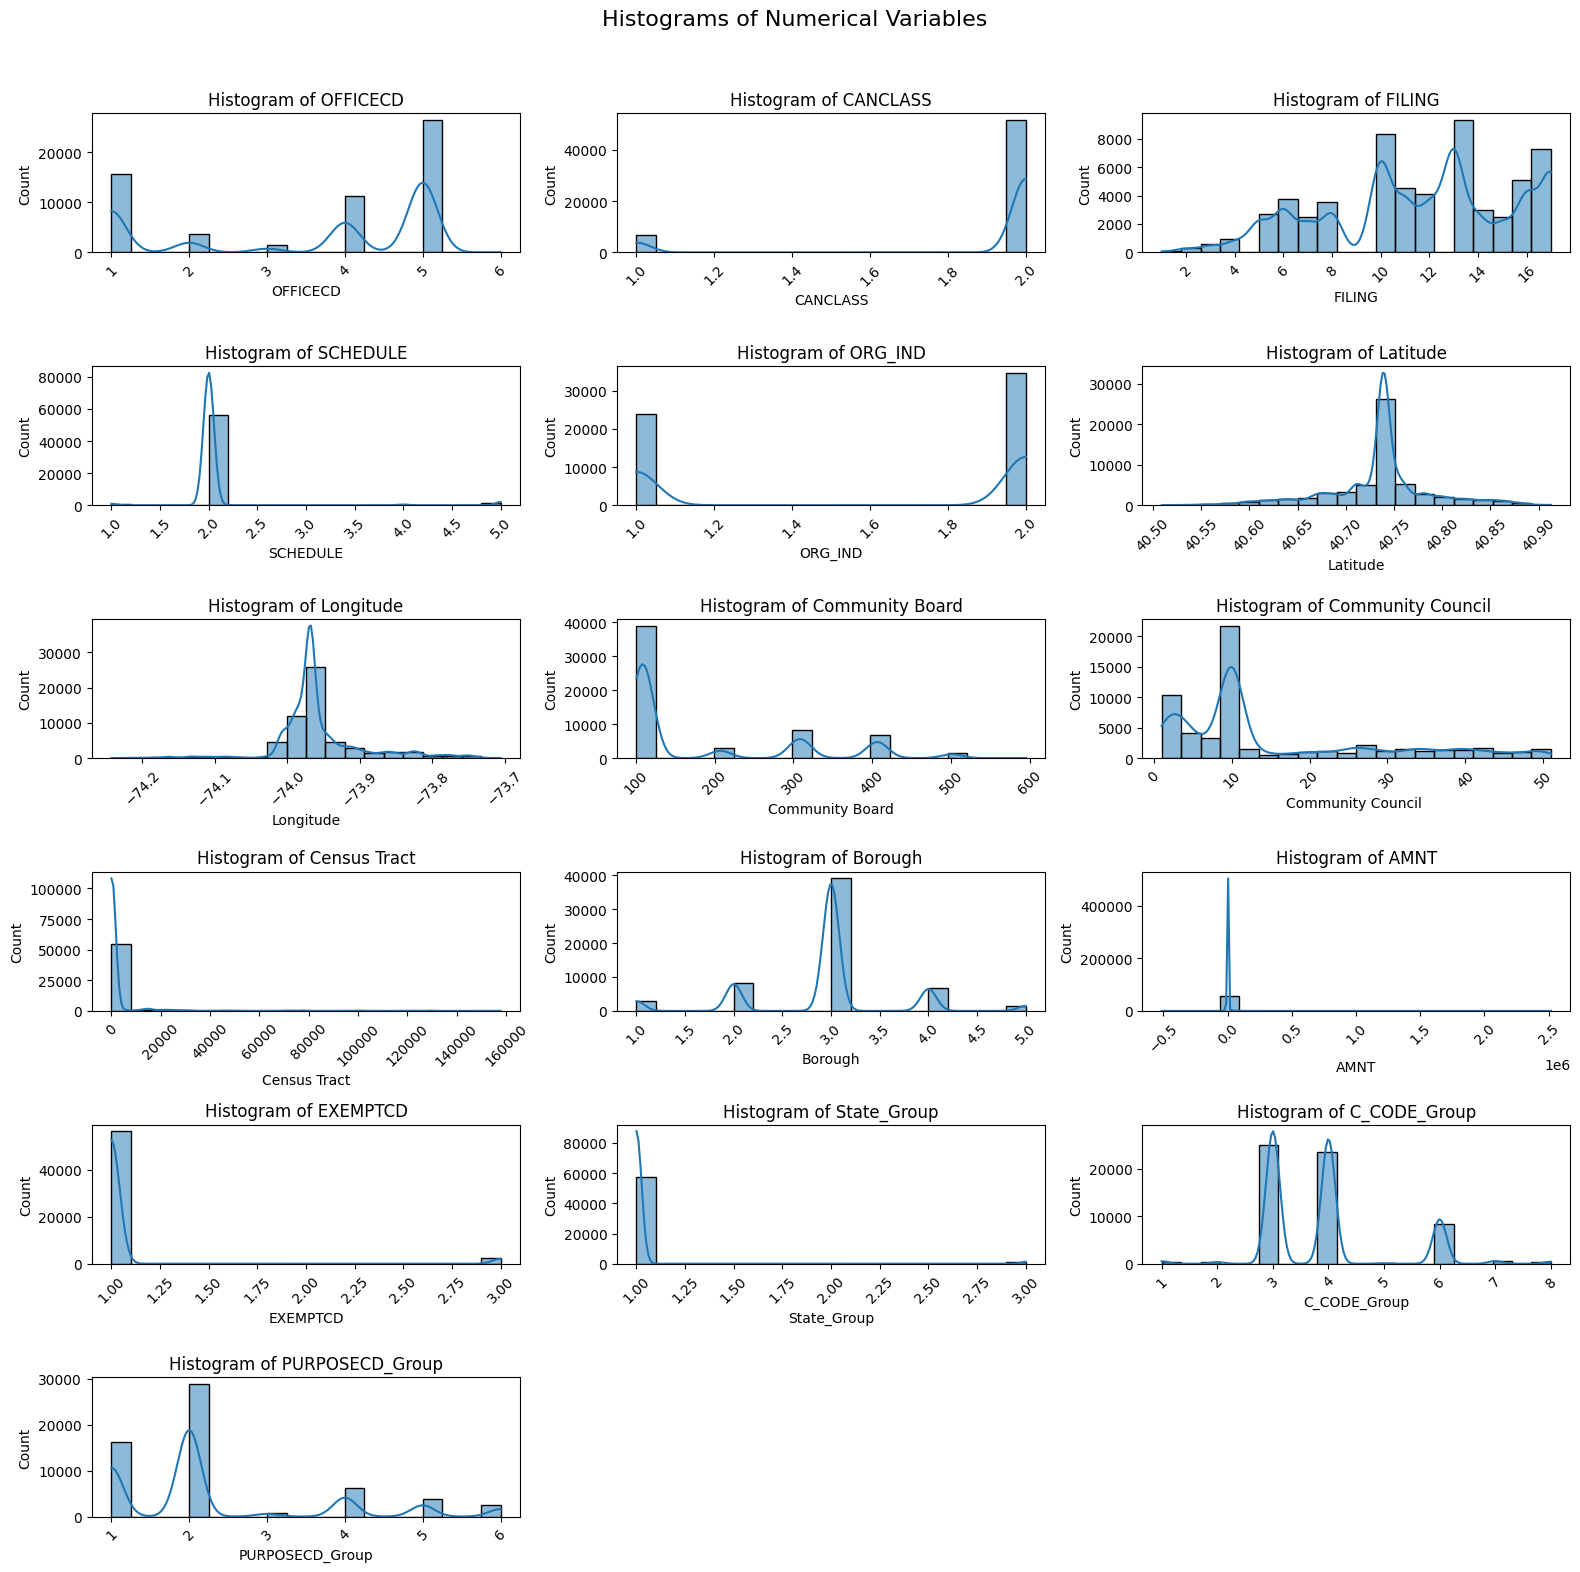

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select numerical columns for univariate analysis
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Step 2: Display summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
print(numerical_cols.describe())

# Step 3: Create histograms for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_cols.columns)//3 + 1, ncols=3, figsize=(16, 16))
axes = axes.flatten()  # Flatten the axes array to easily iterate over it

for i, col in enumerate(numerical_cols.columns):
    sns.histplot(data=numerical_cols, x=col, ax=axes[i], bins=20, kde=True)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate the x-axis labels for better visibility

# Remove any empty subplots if the number of numerical columns is not a multiple of 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Step 4: Set a global title and adjust layout
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

1. FILING: The presence of multiple peaks (multimodal distribution) in the FILING feature suggests that the data may be grouped into distinct categories or periods. These could represent different filing periods, such as quarterly, bi-annual, or annual filings, or different types of filings (e.g., amendments vs. original filings).


2. SCHEDULE: A distribution heavily concentrated around one value (unimodal) indicates that the vast majority of data points for the SCHEDULE feature fall within a narrow range. This could mean that most of the transactions or events in the dataset adhere to a particular schedule, with very few deviations.


3. ORG_IND: It shows a bimodal distribution in ORG_IND (Organization Indicator) which indicates two distinct groups or types of organizations that are prevalent in the dataset. This pattern might reflect differences in organizational size, purpose, or categorization, such as non-profit versus for-profit organizations, or organizations of different revenue or size classes.


4. Latitude and Longitude: The clustering of data points in latitude and longitude indicates that transactions or records are concentrated in specific geographical regions. These clusters may correspond to densely populated areas, major cities, or specific regions where certain types of filings are more common.


5. AMNT: The sharp peak in the AMNT (Amount) distribution suggests that many transactions have very similar amounts, likely clustered around a single dominant value. This could mean that many filings or transactions occur at a common monetary value, which might indicate a standard fee, threshold, or common grant/donation amount.


6. EXEMPTCD: A heavily skewed distribution for EXEMPTCD (Exemption Code) means that most of the data points belong to a specific exemption category, with very few falling into other categories. This could reflect a particular exemption code being dominant in the dataset.


7. State_Group: A skewed distribution in State_Group means that most filings or transactions are concentrated in certain states or regions, with relatively few from other states. This could indicate that certain states have a higher volume of organizations, filings, or activities, leading to an overrepresentation in the dataset.

##Barplots - Categorical Values

Bearing into account that we map our columns to prepare the data, the bar plots that are going to be shown, have an exponential decay distribution.

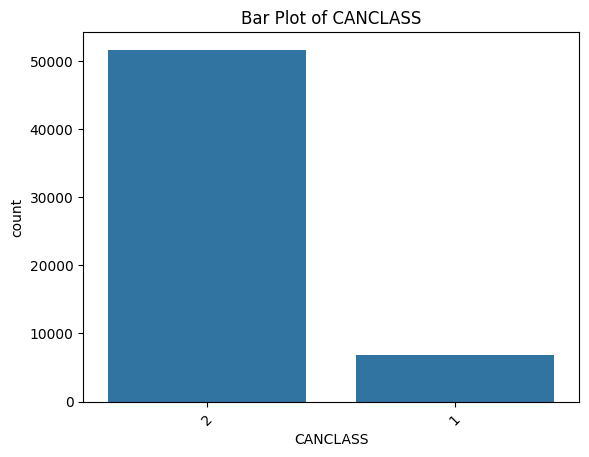

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_cleaned, x='CANCLASS', order=df_cleaned['CANCLASS'].value_counts().index)
plt.title('Bar Plot of CANCLASS')
plt.xticks(rotation=45)
plt.show()

The distribution for this bar plot is highly imbalanced. The majority of data points fall under one category (2), with a significantly higher count compared to the other category, indicating a skewed representation in the dataset. This suggests that the dataset is dominated by one “CANCLASS” value, which could affect model performance.

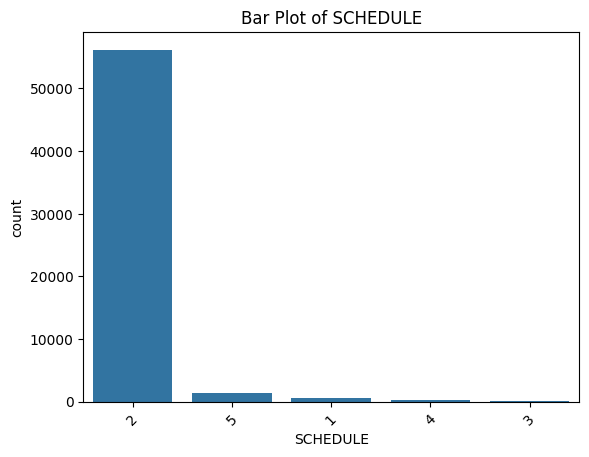

In [ ]:
sns.countplot(data=df_cleaned, x='SCHEDULE', order=df_cleaned['SCHEDULE'].value_counts().index)
plt.title('Bar Plot of SCHEDULE')
plt.xticks(rotation=45)
plt.show()

Uneven Distribution: This type of plot suggests that SCHEDULE is heavily concentrated in one category (specifically SCHEDULE = 2), where the majority of data points are found. The other categories (0, 1, 3) have significantly lower counts, potentially showing minimal representation in comparison.

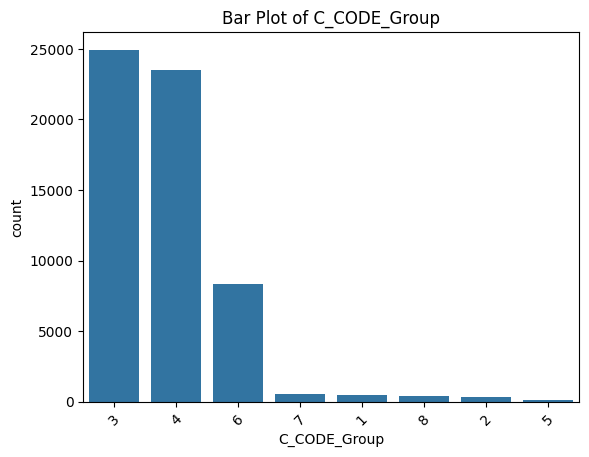

In [ ]:
sns.countplot(data=df_cleaned, x='C_CODE_Group', order=df_cleaned['C_CODE_Group'].value_counts().index)
plt.title('Bar Plot of C_CODE_Group')
plt.xticks(rotation=45)
plt.show()

Categories 3 and 4 have the highest counts, with c_code_group 3 being the most frequent, hitting the 25,000 mark. This suggests that a large proportion of the data belongs to these two groups. c_code_group 6 is moderately represented, with a count between 5,000 to 10,000. Although much less frequent than groups 3 and 4, it still has a noticeable presence in the dataset. Other groups likely have lower frequencies that are harder to interpret due to the scale difference.

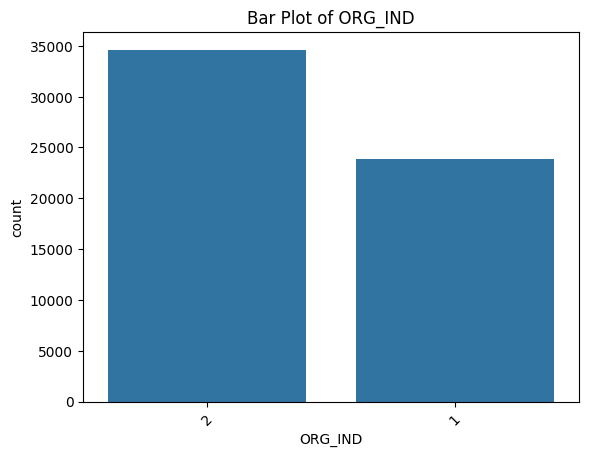

In [ ]:
sns.countplot(data=df_cleaned, x='ORG_IND', order=df_cleaned['ORG_IND'].value_counts().index)
plt.title('Bar Plot of ORG_IND')
plt.xticks(rotation=45)
plt.show()

Since there are only two categories, the bar plot provides a clear and straightforward visual representation of their counts. The difference in counts between the two categories is noticeable but not extreme, with org_ind 2 having the highest count at 35,000 and org_ind 1 at 25,000. While both categories are substantially represented, org_ind 2 is the most frequent, dominating the distribution. The plot effectively shows this difference simply and directly.

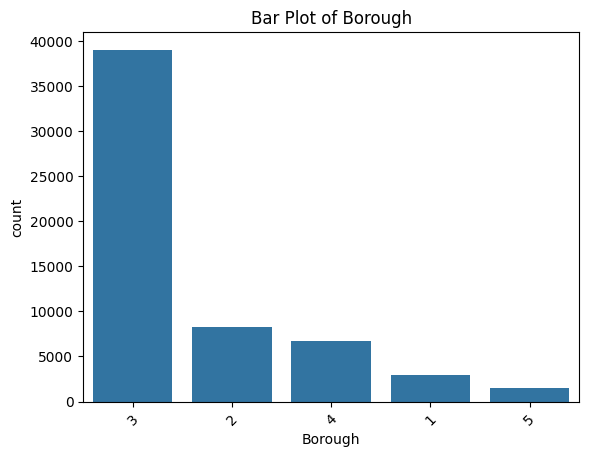

In [ ]:
sns.countplot(data=df_cleaned, x='Borough', order=df_cleaned['Borough'].value_counts().index)
plt.title('Bar Plot of Borough')
plt.xticks(rotation=45)
plt.show()

The bar plot shows a highly skewed distribution. The borough variable is dominated by borough 3, which has the highest count at 40,000. Boroughs 2 and 4 show moderate representation, while boroughs 1 and 5 are underrepresented, with borough 5 having the lowest count. The plot demonstrates a clear imbalance, indicating that borough 3 is significantly more frequent in the dataset than the others.

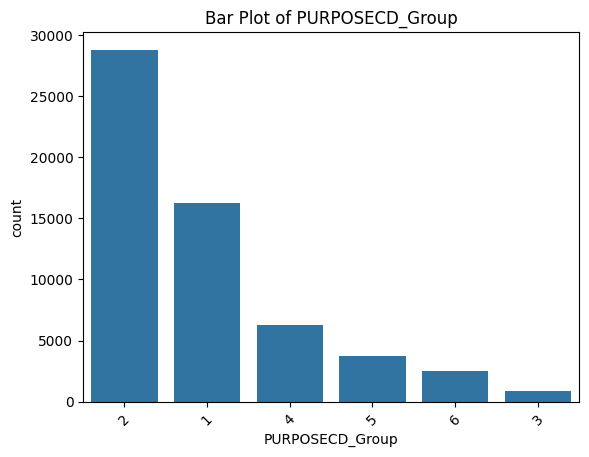

In [ ]:
sns.countplot(data=df_cleaned, x='PURPOSECD_Group', order=df_cleaned['PURPOSECD_Group'].value_counts().index)
plt.title('Bar Plot of PURPOSECD_Group')
plt.xticks(rotation=45)
plt.show()

The distribution of the data is heavily skewed toward Purpose Codes 2 and 1, indicating that these categories are much more prevalent compared to others. Purpose Code 2 is the most represented category in the dataset, nearing a count of 30,000, indicating that it likely represents a common or significant purpose. Purpose Code 1 also shows substantial representation with counts above 15,000, suggesting it's another major purpose category but significantly lower than Code 2.

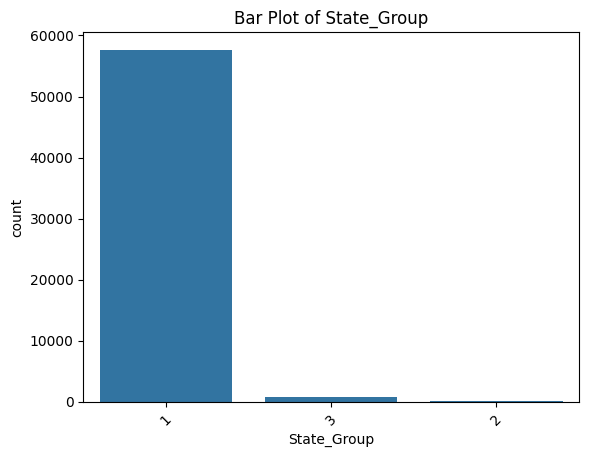

In [ ]:
sns.countplot(data=df_cleaned, x='State_Group', order=df_cleaned['State_Group'].value_counts().index)
plt.title('Bar Plot of State_Group')
plt.xticks(rotation=45)
plt.show()


The distribution is heavily skewed toward State Group 1, demonstrating a significant imbalance in representation across the groups. State Group 3 and State Group 2 have counts that are very close to 0, suggesting that these categories have negligible representation in the dataset. This could indicate that these state groups are either underrepresented or possibly not applicable to the dataset being analyzed.

##Boxplots

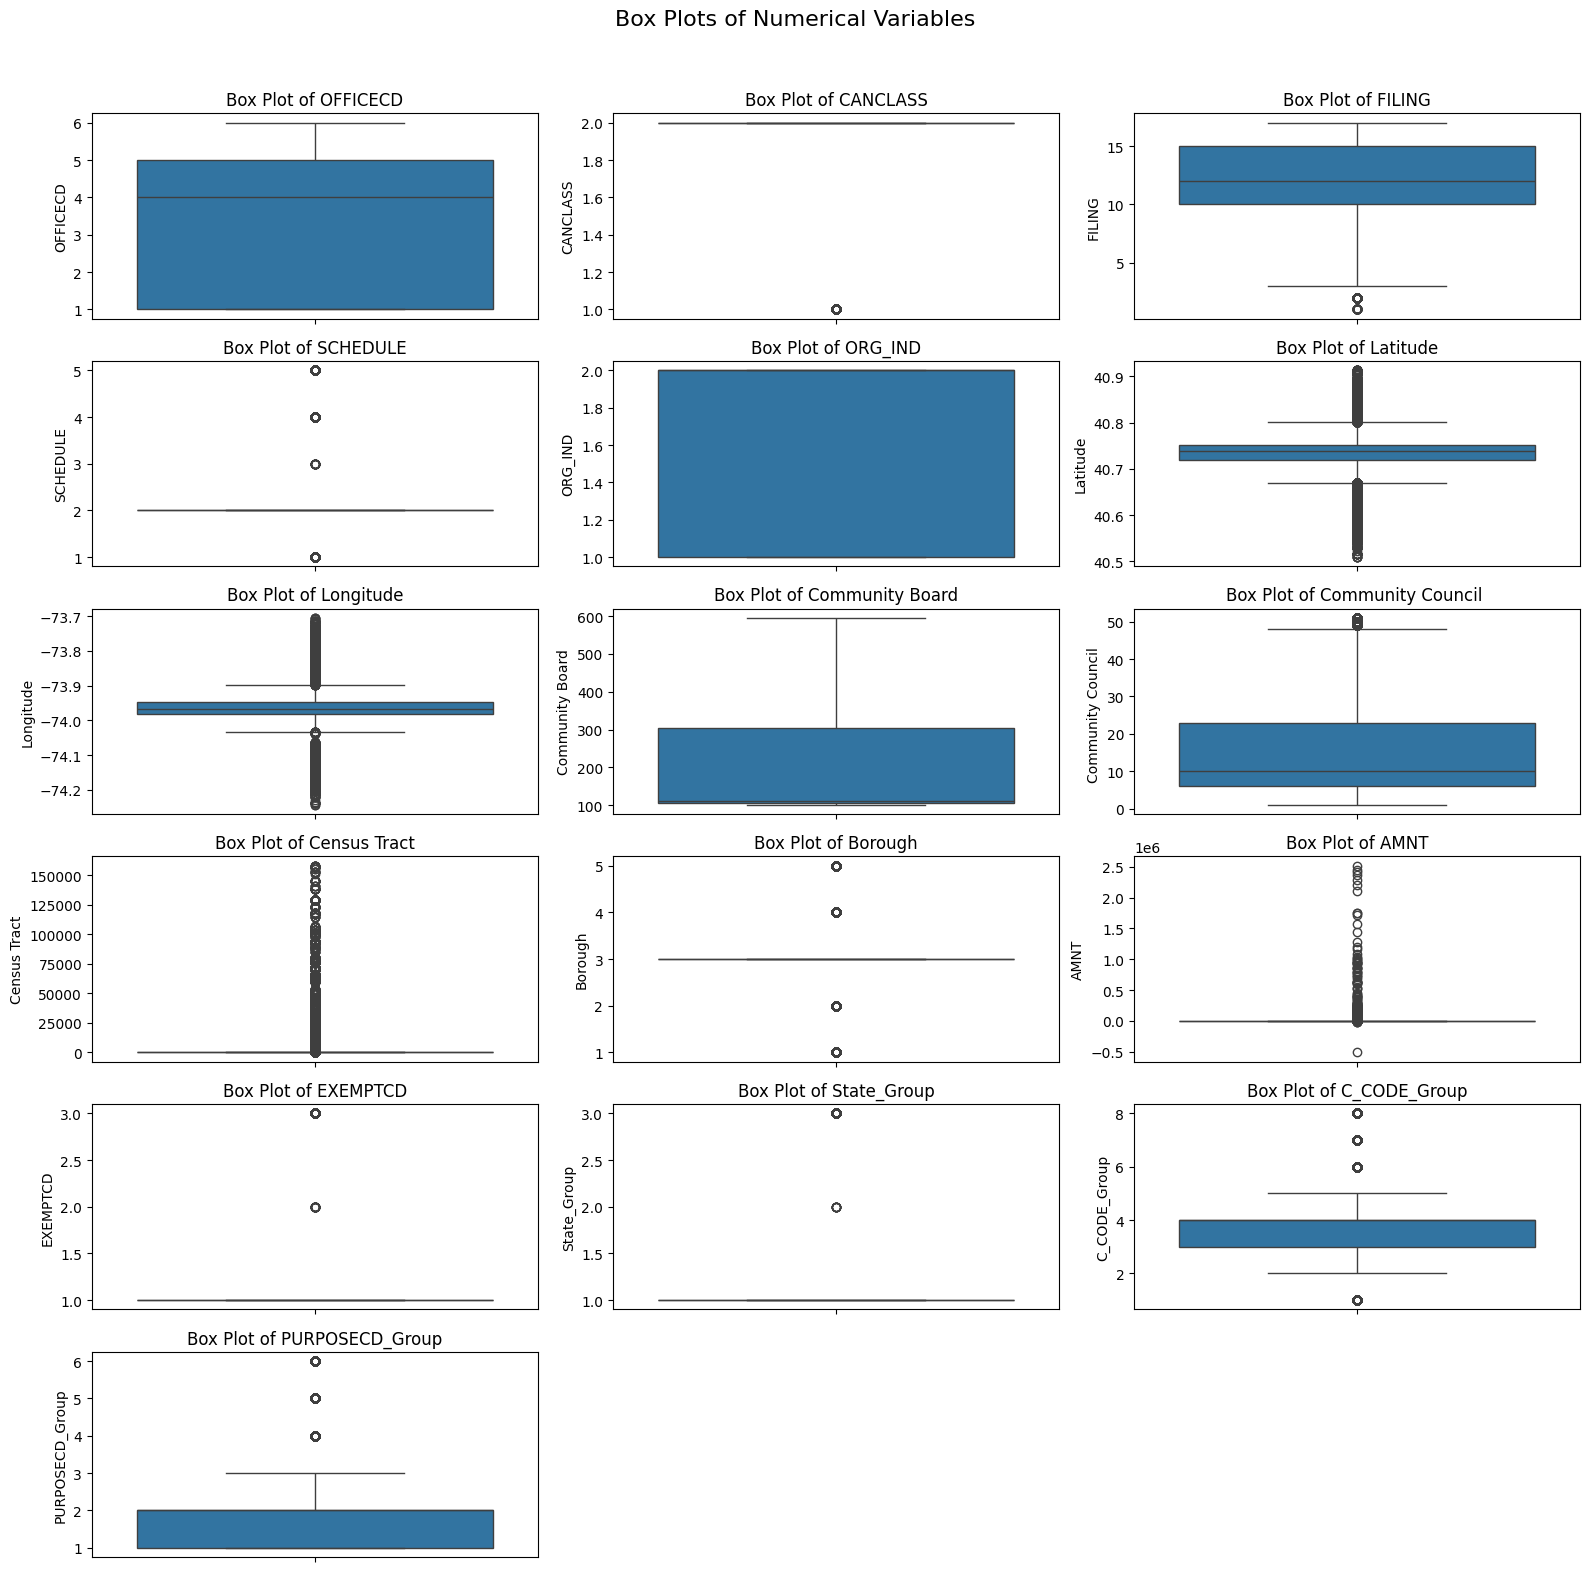

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select numerical columns for univariate analysis
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Step 2: Create boxplots for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_cols.columns)//3 + 1, ncols=3, figsize=(16, 16))
axes = axes.flatten()  # Flatten the axes array to easily iterate over it

for i, col in enumerate(numerical_cols.columns):
    sns.boxplot(data=df_cleaned, y=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Remove any empty subplots if the number of numerical columns is not a multiple of 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Step 3: Set a global title and adjust layout
plt.suptitle('Box Plots of Numerical Variables', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


1. AMNT: The AMNT (Amount) variable shows extreme outliers, indicating that while most transactions occur within a reasonable range, there are a few disproportionately high transactions. This could reflect unusually large donations, expenses, or transactions in certain campaigns or filings. In some cases, these could also be anomalies due to misreported amounts or extraordinary cases.

3. Census Tract: The variable has many outliers at higher values, meaning that while the majority of data points are within a standard range, some census tracts represent areas with much higher values for the variable being measured (e.g., population, income, or another metric tied to the census tract).


4. Latitude and Longitude (Tight Distributions): The relatively tight distribution for latitude and longitude suggests that most of the data points are concentrated in a specific geographical area, with minimal variation. It could also suggest a dataset that is focused on a specific city or state, rather than being nationwide or global.

5. Community Council and Community Board (Moderate Spread with Some Outliers): Community Council and Community Board features show a moderate spread, indicating a wider variation in the data. There are also outliers present, suggesting that while the majority of community councils and boards have values within a standard range, a few are significantly different.

#Bivariative Analysis

##Correlation Matrix

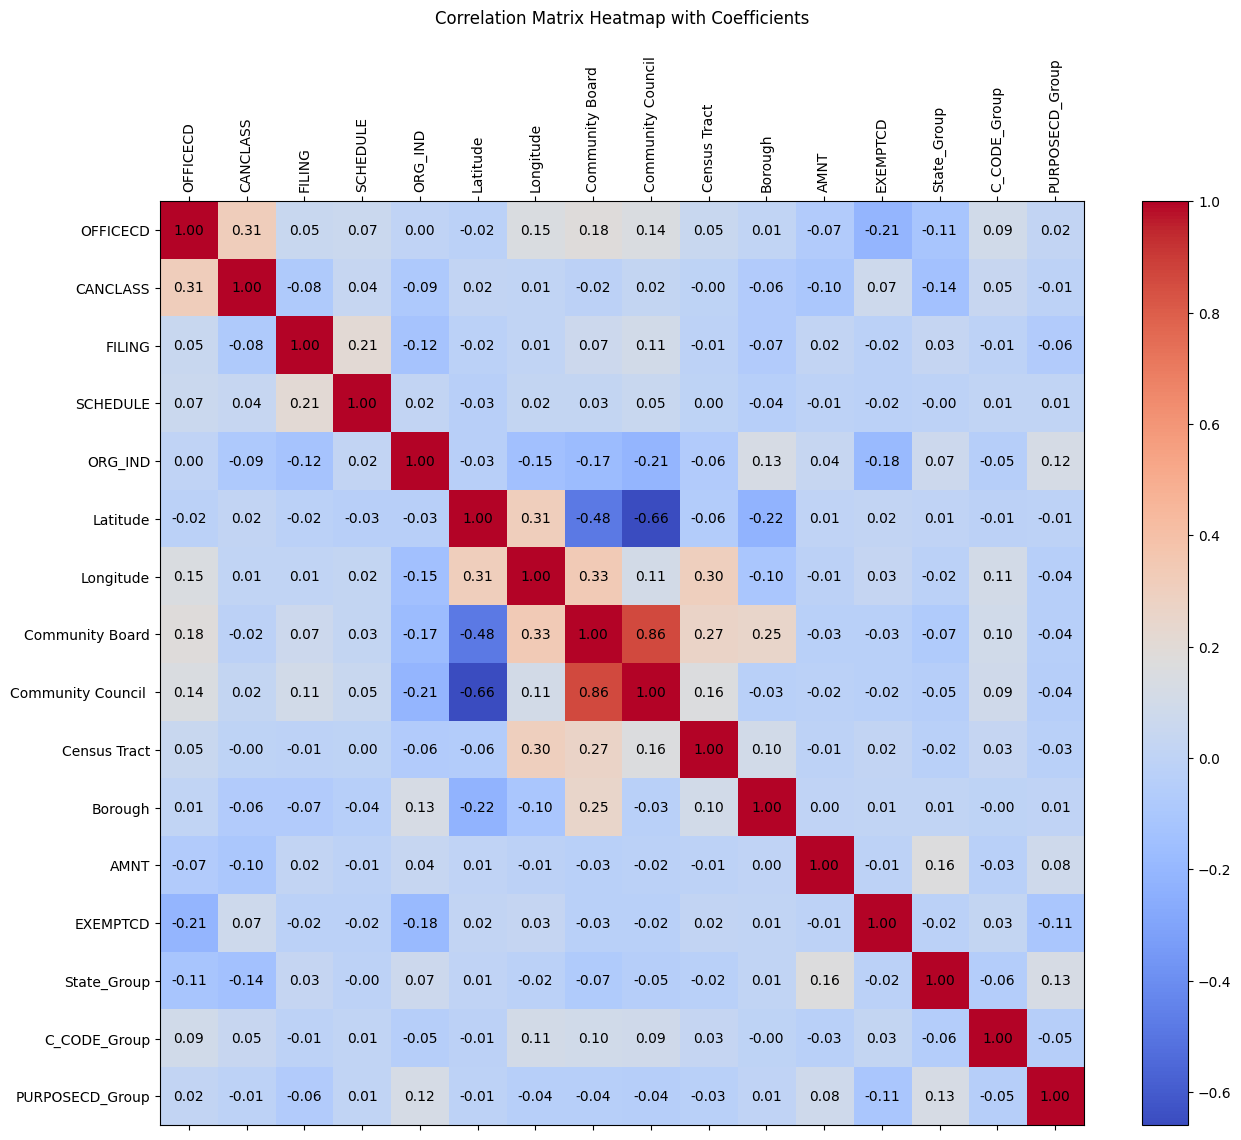

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns for correlation analysis
numeric_cols = df_cleaned.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the correlation matrix as a heatmap including correlation coefficients
fig, ax = plt.subplots(figsize=(15, 12))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')

# Add colorbar
plt.colorbar(cax)

# Set axis labels with column names
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

# Add correlation coefficients to each cell
for (i, j), val in np.ndenumerate(correlation_matrix):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix Heatmap with Coefficients', pad=20)
plt.show()


Correlation Matrix

Positive Correlations:

1. Community Board & Community Council (0.87):
The strong positive correlation suggests these administrative bodies are closely aligned and have coordinated governance structure. It may also reflect overlapping jurisdictions or responsibilities

2. OFFICECD & CANCLASS (0.33):
A correlation of 0.33 between OFFICECD and CANCLASS suggests a moderate positive relationship. This means that as one variable increases, the other tends to increase moderately as well. In practical terms, certain office types might be more commonly associated with particular candidate classifications.


Negative Correlations:

1. Latitude & Community Council (-0.66):
Strong negative correlation indicates geographic organization as you move northward (higher latitude), Community Council numbers decrease suggests systematic numbering of councils based on geographic location

2. Borough & Longitude (-0.26):
The weak negative correlation implies a minor westward trend (decreasing longitude) as the borough number increases. This trend is not strong, so while some boroughs may be more to the west than others, this pattern is not consistent across the entire dataset. Boroughs may not be arranged in a purely linear geographic order (east to west or west to east). They could be spread in various directions, causing only a weak and scattered relationship between borough number and longitude.

##Scatterplots

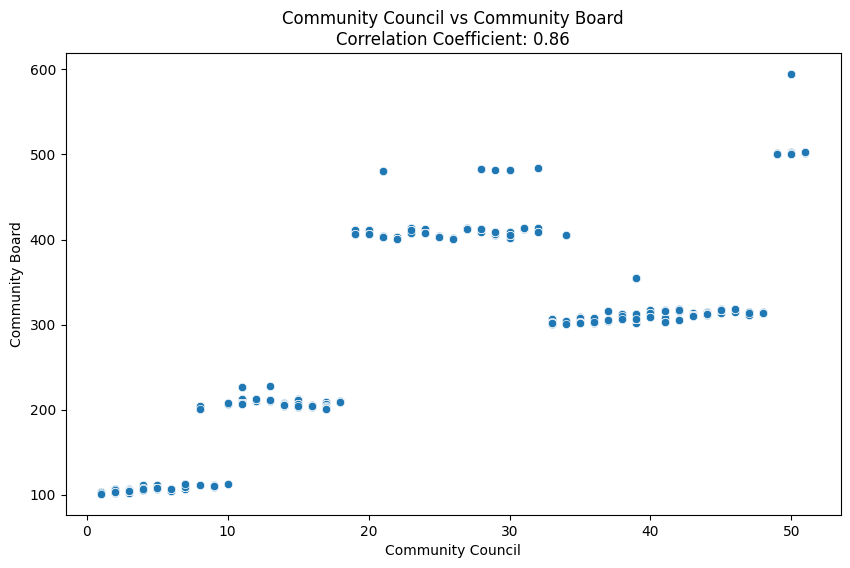

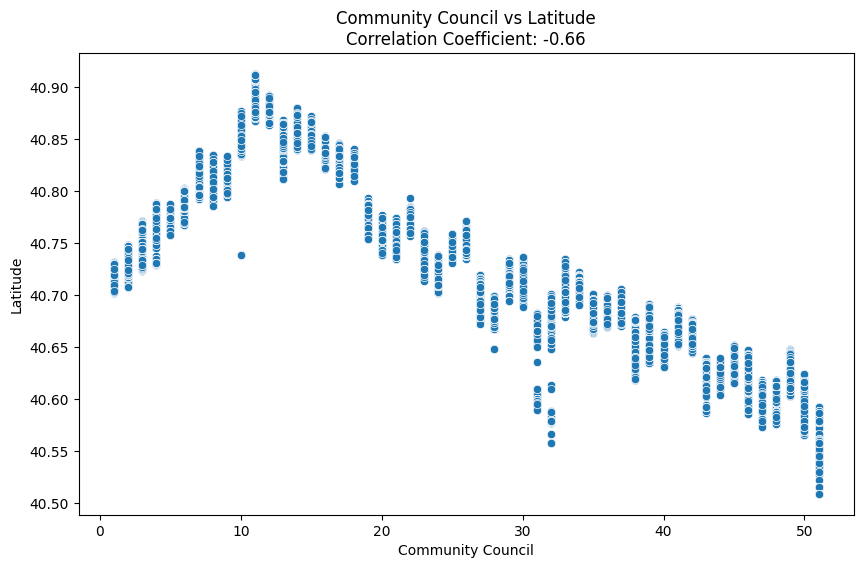

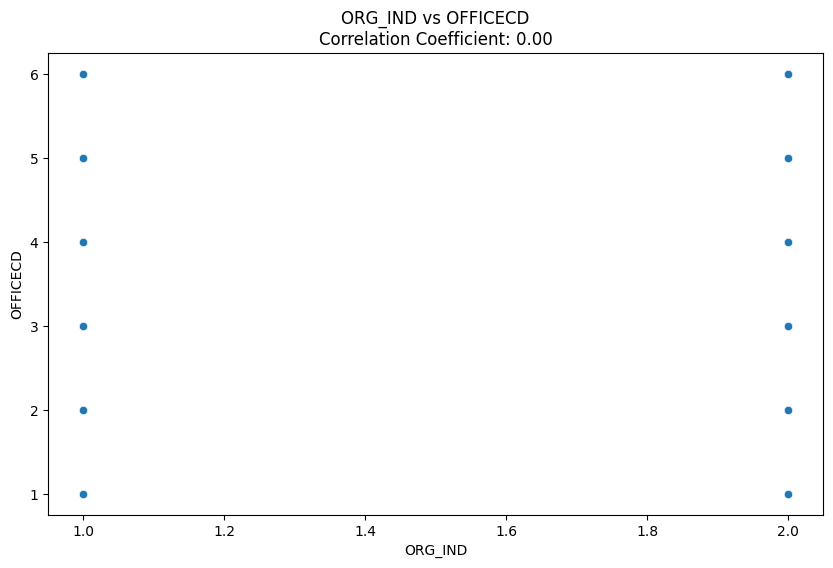

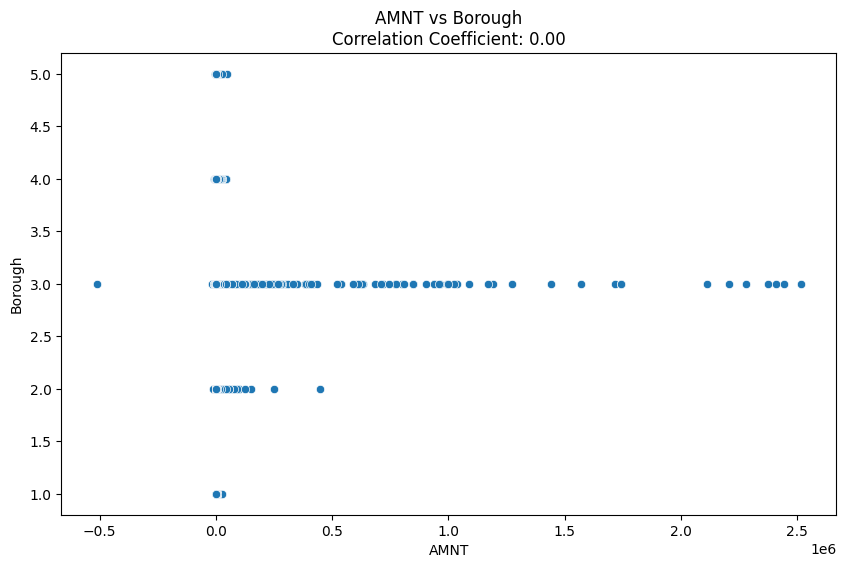

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Strip whitespace from column names
df_cleaned.columns = df_cleaned.columns.str.strip()

# Scatterplot 1: Community Council and Community Board
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Community Council', y='Community Board')
corr_1 = df_cleaned['Community Council'].corr(df_cleaned['Community Board'])
plt.title(f'Community Council vs Community Board\nCorrelation Coefficient: {corr_1:.2f}')
plt.xlabel('Community Council')
plt.ylabel('Community Board')
plt.show()

# Scatterplot 2: Community Council and Latitude
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Community Council', y='Latitude')
corr_2 = df_cleaned['Community Council'].corr(df_cleaned['Latitude'])
plt.title(f'Community Council vs Latitude\nCorrelation Coefficient: {corr_2:.2f}')
plt.xlabel('Community Council')
plt.ylabel('Latitude')
plt.show()

# Scatterplot 3: ORG_IND and OFFICECD (Convert to numeric to plot and calculate correlation)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='ORG_IND', y='OFFICECD')
corr_3 = pd.to_numeric(df_cleaned['ORG_IND'], errors='coerce').corr(df_cleaned['OFFICECD'])
plt.title(f'ORG_IND vs OFFICECD\nCorrelation Coefficient: {corr_3:.2f}')
plt.xlabel('ORG_IND')
plt.ylabel('OFFICECD')
plt.show()

# Scatterplot 4: AMNT and Borough (No need to convert Borough to categorical codes)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='AMNT', y='Borough')
corr_4 = df_cleaned['AMNT'].corr(df_cleaned['Borough'])
plt.title(f'AMNT vs Borough\nCorrelation Coefficient: {corr_4:.2f}')
plt.xlabel('AMNT')
plt.ylabel('Borough')
plt.show()

 1. Community Council vs. Community Board:

The high positive correlation coefficient of 0.87 indicates a strong positive linear relationship between the Community Council and the Community Board. This suggests that as the values of the Community Council increase, the values of the Community Board also tend to increase. The scatter plot shows points that closely align along an upward slope, reinforcing the notion of a strong relationship.


 2. Community Council vs Latitude Scatter Plot:

A correlation of -0.66 indicates a strong negative relationship between the Community Council variable and Latitude. As the value of the Community Council increases, the latitude tends to decrease. This means that higher-numbered councils are likely to be located further south. The scatter plot shows a clear downward trend, supporting the idea that as the Community Council number increases, the geographical location (as indicated by latitude) moves further south.

 3. Org_Ind vs. OfficeCD:

A correlation coefficient close to 0 (here it’s -0.00) suggests no linear relationship between Org_Ind and OfficeCD. This indicates that changes in one variable do not correlate with changes in the other variable. The scatter plot for this pair showing no discernible trend or pattern.

4. Amount (AMT) vs. Borough:

The correlation coefficient of 0.01 indicates a very weak positive correlation between Amount (AMT) and Borough. While a linear trend exists, it is not strong enough to provide actionable insights without considering additional factors that may influence amounts across different boroughs.

#Multivariative Analysis

##Scatterplots

          AMNT   Latitude   Longitude      PAY_METHOD
0  1935.246582  35.669109 -113.352146           Check
1  4758.500101   6.497346   15.084341   Wire Transfer
2  3686.770315 -34.285029  134.260501  Online Payment
3  3033.426573  56.483104   83.600959  Online Payment
4   864.491338  33.251611  110.362013           Check


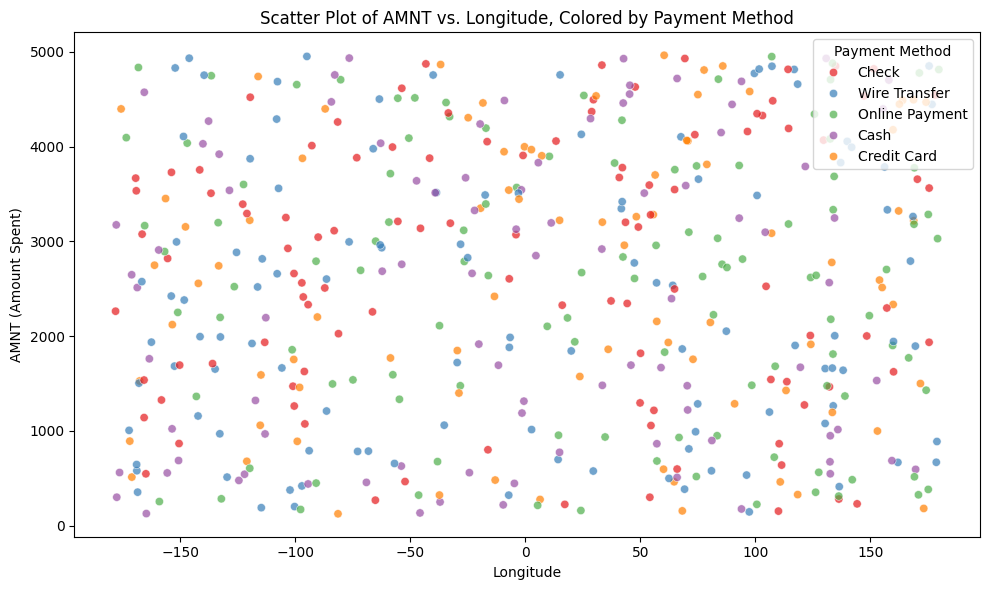

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a random dataset with columns AMNT, Latitude, Longitude, and PAY_METHOD
np.random.seed(42)  # For reproducibility

# Generate 500 random entries
data_size = 500

# Random values for amount (AMNT)
amnt = np.random.uniform(100, 5000, data_size)  # Amount between 100 and 5000

# Random values for Latitude and Longitude (simulating geographical locations)
latitude = np.random.uniform(-90, 90, data_size)
longitude = np.random.uniform(-180, 180, data_size)

# Create a list of payment methods
payment_methods = ['Cash', 'Check', 'Credit Card', 'Wire Transfer', 'Online Payment']

# Randomly assign a payment method to each entry
pay_method = np.random.choice(payment_methods, size=data_size)

# Create the DataFrame
df_new = pd.DataFrame({
    'AMNT': amnt,
    'Latitude': latitude,
    'Longitude': longitude,
    'PAY_METHOD': pay_method
})

# Display the first few rows of the dataset
print(df_new.head())

# Step 2: Scatter plot of AMNT vs. Longitude, colored by PAY_METHOD
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Longitude', y='AMNT', hue='PAY_METHOD', data=df_new, palette='Set1', alpha=0.7)

# Customize the plot
plt.title('Scatter Plot of AMNT vs. Longitude, Colored by Payment Method')
plt.xlabel('Longitude')
plt.ylabel('AMNT (Amount Spent)')
plt.legend(title='Payment Method', loc='upper right')
plt.tight_layout()
plt.show()


In this scatter plot, we visualize the relationship between the Amount Spent Column (AMNT) and the longitude of the transactions. Each color represents the payment method used, and each point represents a transaction.

**Key Observations that the analysis team came up with:**

1. There is no clear geographical trend. We can see that the longitude is spread across the data, however, we cannot look at any relevant trend, that combines a specific location, the amount spent, with the payment method.


2. There is a high variation in payment methods, with no 'clear winner' after all, showing that different payment methods are being used uniformly, regardless of a specific geographical location.

The reason these variables were plotted together, was an assumption that there would be at least some relevant trend between these variables, maybe some certain high-class location with high amounts of money being spent in payment methods such as Credit cards, or a low-class location where there would be a lower amount of money being spent with cash, for instance.

To conclude, no relevant trend was observed.


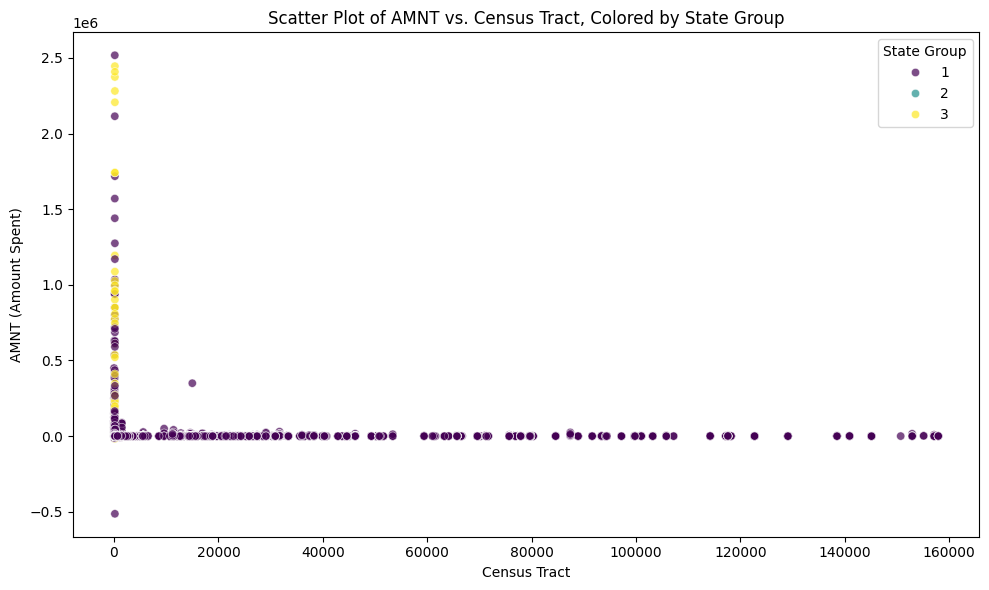

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned has the necessary columns
plt.figure(figsize=(10, 6))

# Scatter plot of AMNT vs. Census Tract, colored by State_Group
sns.scatterplot(x='Census Tract', y='AMNT', hue='State_Group', data=df_cleaned, palette='viridis', alpha=0.7)

# Customize the plot
plt.title('Scatter Plot of AMNT vs. Census Tract, Colored by State Group')
plt.xlabel('Census Tract')
plt.ylabel('AMNT (Amount Spent)')
plt.legend(title='State Group', loc='upper right')
plt.tight_layout()
plt.show()


In this scatter plot, we are looking for the relationship between the Census Tract and the Amount Spent (AMNT) colored by state group. Here are some Key points:

It is important to notice before going to the analysis that the Census Tract represents a small statistical subdivision of a county, used to represent geographic regions.


**Key Points:**

1. There is a concentration of spending, of most of the data points are clustered near the lower Census Tract numbers, suggesting that a relevant portion of the expenditure occurs in particular geographic areas, like more populated or central regions (an insight that it was not possible to gather when analyzing the longitude columns).

2. There are extremely high outliers, where the amount spent passes more than a million USD, and we can notice that this significant amount of money being spent is concentrated in specific areas within these geographic regions.

3. The hue variable (the color coding) shows that most points are clustered either for State Group 1 (purple) or State Group 3 (yellow), with this last one being more frequent in higher expenditures.

This can be useful for the context of our analysis because the concentration of high spending in certain areas may reflect some strategic decisions of the campaign to focus on putting a higher amount of resources into some specific areas.

Also, it is useful to see that State Group number one is the most frequent in terms of frequency of spending, however, State Group number three is more frequent in higher expenditures, thus depending on the campaign goals and activities, they could change their resource allocation/attention into these two groups.


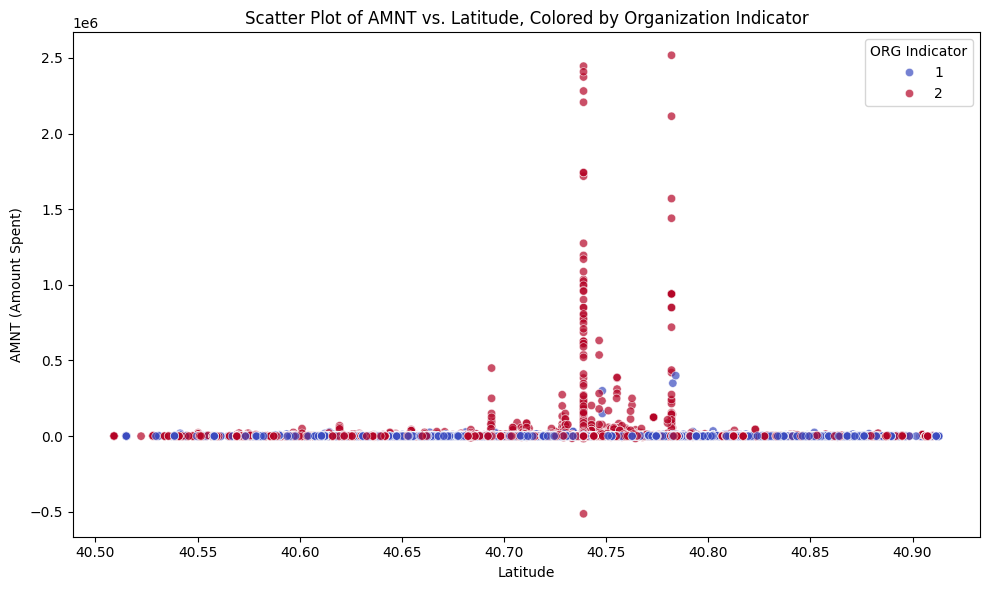

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot of AMNT vs. Latitude, colored by ORG_IND
sns.scatterplot(x='Latitude', y='AMNT', hue='ORG_IND', data=df_cleaned, palette='coolwarm', alpha=0.7)

# Customize the plot
plt.title('Scatter Plot of AMNT vs. Latitude, Colored by Organization Indicator')
plt.xlabel('Latitude')
plt.ylabel('AMNT (Amount Spent)')
plt.legend(title='ORG Indicator', loc='upper right')
plt.tight_layout()
plt.show()

This Scatter plot shows the relationship between the Latitude and Amount Spent (AMNT) variables, colored by the Organization Indicator. The reason this was plotted was to see different types of organizations that are involved in the transactions.

**Key Observations:**

1. The data shows that the amount spent is highly concentrated between some specific latitude values (like 40.70 to 40.80), corresponding to a particular geographic area most likely, that can be a key to campaign activities or vendor relationships.

2. Some outliers show a significant amount spent, which are concentrated in some narrow latitudes, reinforcing the insights previously stipulated by the last scatter plot, that some really specific areas are extremely important for the campaign strategy, considering they spend the most amount of money, which might be the core operational area for the campaign or the organization.

For the business implications, we can gather two extremely important insights:

1. First, there is a clear geographic focus on some key regions, which could reflect strategic decisions to focus efforts where the potential impact is highest.

2. The importance of Organization Indicator number two, since most high-value transactions are associated with Organization Indicator 2, shows that this organization type is crucial for high-value activities.

#Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the numeric columns from the cleaned DataFrame
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numeric columns and transform them
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

# Verify the scaling by printing the first few rows of the scaled DataFrame
print(df_cleaned.head())

   OFFICECD  CANCLASS    FILING  SCHEDULE   ORG_IND  Latitude  Longitude  \
0  0.292462  0.365369 -1.697970 -0.144319  0.830455  0.538180  -0.601951   
1  0.292462  0.365369 -0.919530 -0.144319  0.830455  0.272278  -0.350534   
2  0.292462  0.365369 -1.697970 -0.144319  0.830455  0.272278  -0.350534   
3  0.292462  0.365369 -0.400570 -0.144319  0.830455  0.062562  -0.200335   
4  0.880198  0.365369  1.415791 -0.144319  0.830455  0.062562  -0.200335   

   Community Board  Community Council  Census Tract   Borough      AMNT  \
0        -0.687423          -0.895221     -0.209705  0.102378 -0.042014   
1        -0.670712          -0.821369     -0.213260  0.102378  0.017943   
2        -0.670712          -0.821369     -0.213260  0.102378 -0.026722   
3        -0.620577          -0.378252     -0.206657  0.102378 -0.064688   
4        -0.620577          -0.378252     -0.206657  0.102378 -0.063427   

   EXEMPTCD  State_Group  C_CODE_Group  PURPOSECD_Group  
0 -0.200274    -0.119866     -0.78

To improve the quality of our analysis, the data was standardized

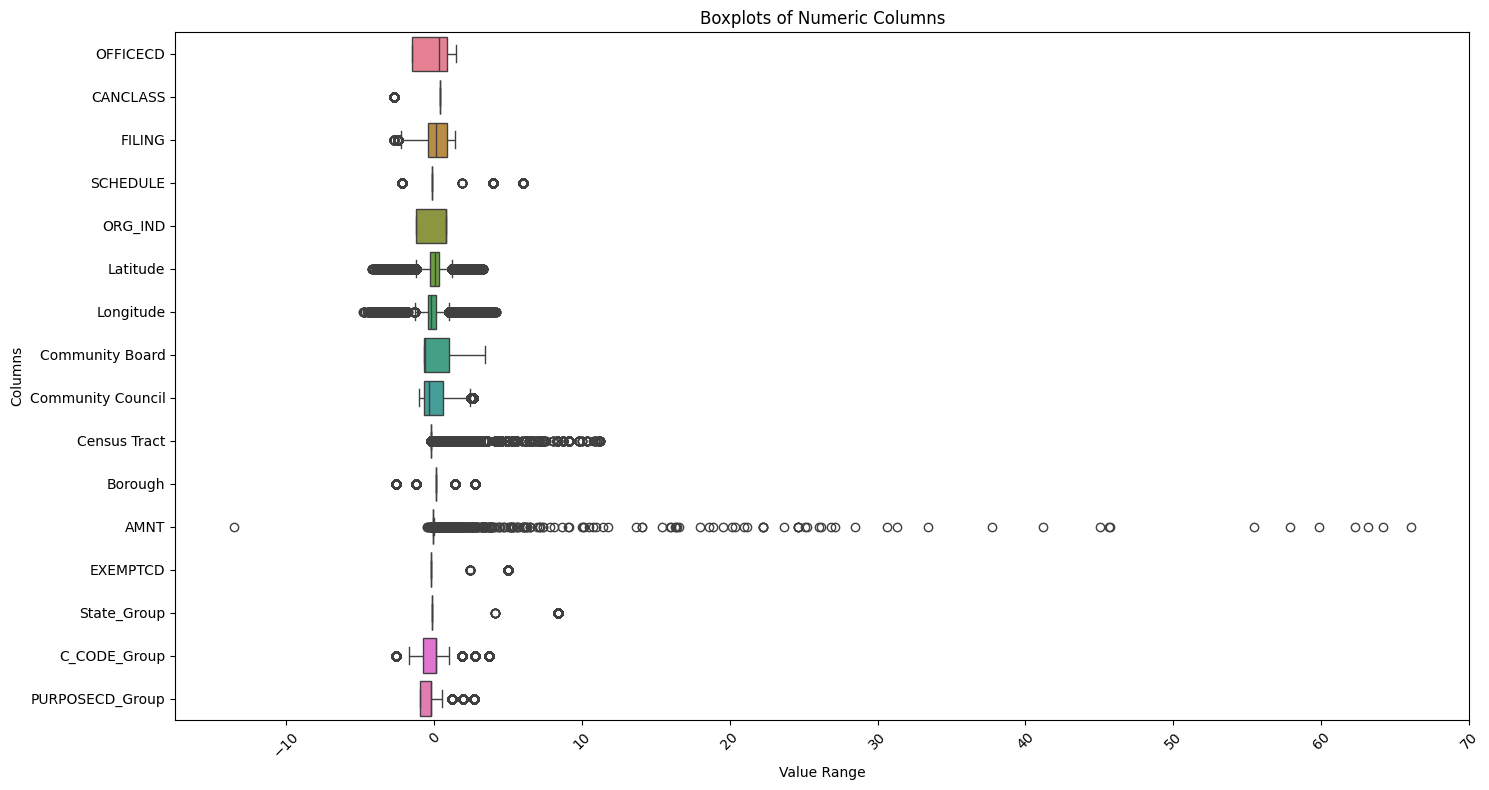

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numeric columns from the cleaned DataFrame
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for all numeric columns in the same graph
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_cleaned[numeric_cols], orient='h')

# Set plot title and labels
plt.title('Boxplots of Numeric Columns')
plt.xlabel('Value Range')
plt.ylabel('Columns')

# Rotate y-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

This is a boxplot only for the numeric columns of the data standardized.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Drop the 'AMNT' column
df_scaled = df_cleaned.drop(columns=['AMNT'])

# Select the numeric columns from the new DataFrame (excluding 'AMNT')
numeric_cols = df_scaled.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numeric columns and transform them
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# Verify the new scaled DataFrame by printing the first few rows
print(df_scaled.head())


   OFFICECD  CANCLASS    FILING  SCHEDULE   ORG_IND  Latitude  Longitude  \
0  0.292462  0.365369 -1.697970 -0.144319  0.830455  0.538180  -0.601951   
1  0.292462  0.365369 -0.919530 -0.144319  0.830455  0.272278  -0.350534   
2  0.292462  0.365369 -1.697970 -0.144319  0.830455  0.272278  -0.350534   
3  0.292462  0.365369 -0.400570 -0.144319  0.830455  0.062562  -0.200335   
4  0.880198  0.365369  1.415791 -0.144319  0.830455  0.062562  -0.200335   

   Community Board  Community Council  Census Tract   Borough  EXEMPTCD  \
0        -0.687423          -0.895221     -0.209705  0.102378 -0.200274   
1        -0.670712          -0.821369     -0.213260  0.102378 -0.200274   
2        -0.670712          -0.821369     -0.213260  0.102378 -0.200274   
3        -0.620577          -0.378252     -0.206657  0.102378 -0.200274   
4        -0.620577          -0.378252     -0.206657  0.102378 -0.200274   

   State_Group  C_CODE_Group  PURPOSECD_Group  
0    -0.119866     -0.784396         1.95625

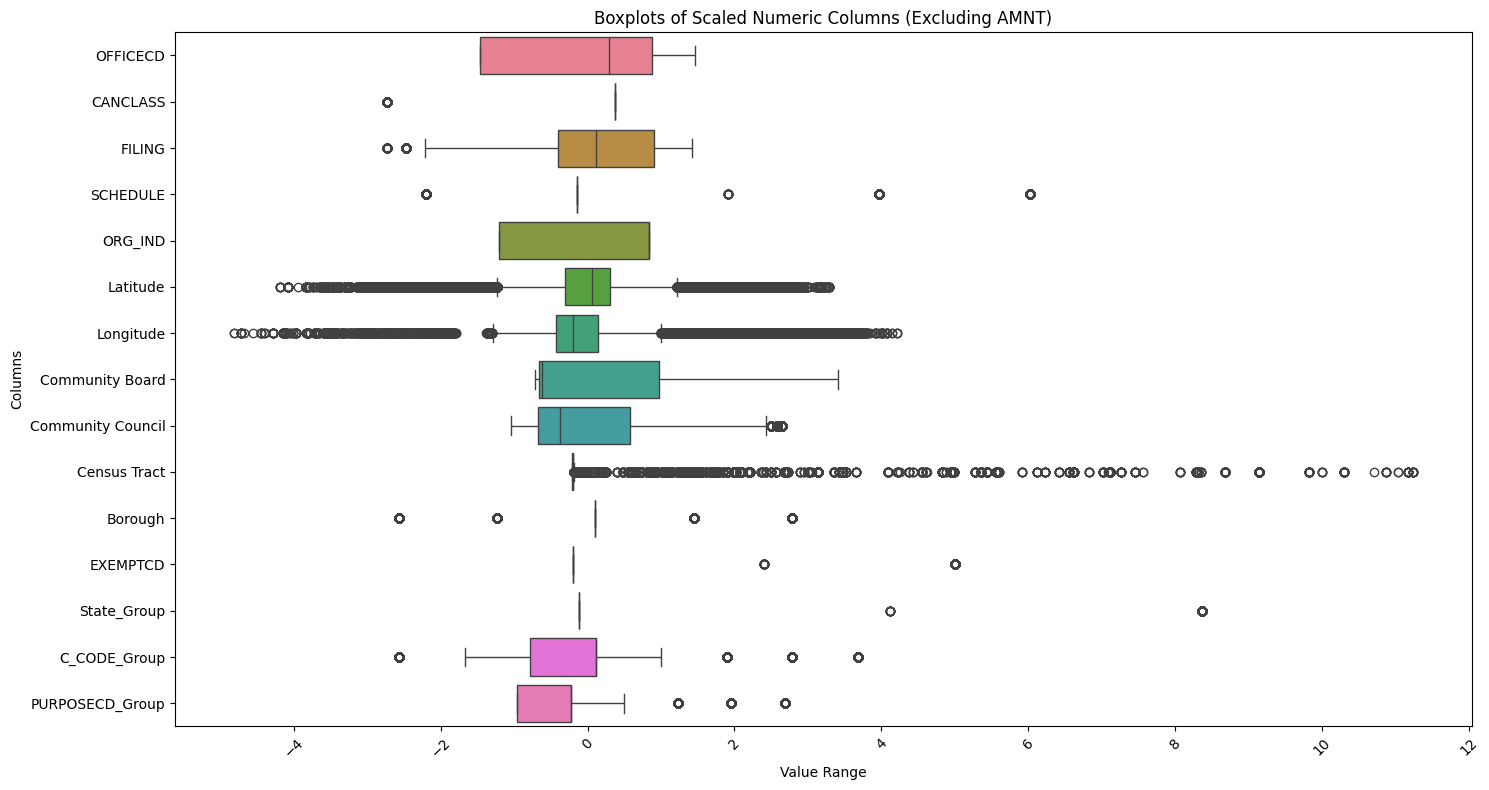

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numeric columns from the scaled DataFrame
numeric_cols_scaled = df_scaled.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for all numeric columns in the same graph
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_scaled[numeric_cols_scaled], orient='h')

# Set plot title and labels
plt.title('Boxplots of Scaled Numeric Columns (Excluding AMNT)')
plt.xlabel('Value Range')
plt.ylabel('Columns')

# Rotate y-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

Considering we had an extremely high range of Amount Spent data points, we excluded the 'AMNT' column to have a better visualization for our DF standardized.

In [ ]:
df_cleaned.shape

(58528, 16)

#Removing Outliers

In [ ]:
df_cleaned = df_cleaned[df_cleaned['Latitude'] < 3]
df_cleaned = df_cleaned[df_cleaned['Longitude'] < 3]
df_cleaned = df_cleaned[df_cleaned['Census Tract'] < 3]

In [ ]:
df_cleaned.shape

(56405, 16)

#PCA

We removed a few outliers in some of the rows with the highest numbers of extreme values. The outlier removal process was made in order to clean up the data, but not exclude a high percentage of data points. The balance for this was the code shown above, where we removed 3.63% of the total dataset, which improved our analysis and reduced some extreme outliers in certain variables.

##Perform PCA

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Selecting only the numeric columns for PCA (excluding the target variable 'amount')
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df_cleaned[numeric_columns]

# Perform PCA
pca = PCA(n_components=16)  # Adjust the number of components based on the dataset's size and complexity
pca_result = pca.fit_transform(df_numeric)

# Assuming the target is the 'amount' column or similar (replace 'amount' if needed)
target = df_cleaned['AMNT']  # Update the target column name based on your dataset

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(16)])  # Dynamically create the PCA component names
pca_df['target'] = target

# Print the first few rows of the PCA result
print(pca_df.head())

# Optionally, you can also check the explained variance ratio to understand how much variance each component explains
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio by component:", explained_variance_ratio)

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.534189 -0.735498  1.850787 -0.256895 -0.971881  0.696438 -0.852427   
1 -1.187929 -0.373972  1.239229 -0.296890 -0.210257  0.329221 -0.552779   
2 -1.183774 -0.090012  1.072222 -1.056422 -0.118102 -0.059023 -0.367725   
3 -0.645959 -0.025357  0.692616 -0.486978  0.447981 -0.078438 -0.350250   
4 -0.348797  0.289063  0.512001  0.427468  1.301294 -0.025216 -0.177923   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.702459 -0.509872  0.548230  0.341905 -0.221331  0.353272  0.293148   
1  0.150884 -0.204069 -0.085878  0.297353  0.064058  0.162942 -0.012193   
2  0.778893 -0.189816 -1.092898  0.827549 -0.307428  0.316079  0.020927   
3  0.868452  0.066572 -0.834468  0.336091  0.257664  0.021882 -0.116897   
4  1.232666  0.623100 -0.355118 -0.418029  1.022286  0.030677 -0.162905   

       PC15      PC16    target  
0 -0.093032 -0.074741 -0.042014  
1 -0.022397 -0.075133  0.01794

In this code we, as an analyst team, are performing a Principal Component Analysis (PCA) on our dataset, focusing on reducing dimensionality and exploring the variance in the data. This analysis, along with the Principal Components (PC) Coefficients, is really important to understand the underlying structure of the data by reducing its complexity, so we can avoid overfitting the model.

The analysis came up with 16 Principal Components.


##Explained Variance

In [ ]:
# Display explained variance ratio to understand the importance of each component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")

Explained variance by each component: [0.16431754 0.11249386 0.09402498 0.08850615 0.07648109 0.06725615
 0.06530344 0.06135396 0.05776388 0.05489554 0.05219435 0.04514349
 0.03524487 0.0152332  0.00654968 0.00323782]


This analysis turns out to be extremely important because it tells us how much information each PC captures from the original dataset. As will be further explained in the analysis, this metric is extremely important because it highlights the importance of each component.

##PCA Weights

In [ ]:
feature_names = df_numeric.columns
component_weights = pd.DataFrame(data=pca.components_,
                                 columns=feature_names,
                                 index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
    'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16'])

# Display the DataFrame with component weights
print(component_weights)

      OFFICECD  CANCLASS    FILING  SCHEDULE   ORG_IND  Latitude  Longitude  \
PC1   0.171877  0.057989  0.108025  0.059309 -0.159581 -0.466593   0.006270   
PC2   0.319700  0.385636  0.069833  0.073513 -0.349811  0.333217   0.347245   
PC3   0.498272  0.355489 -0.260553  0.000948  0.427602 -0.077079  -0.137153   
PC4   0.242047 -0.097332  0.424905  0.378411  0.031486  0.149027   0.236186   
PC5  -0.053840 -0.108612  0.487454  0.518831  0.145994 -0.102296  -0.276841   
PC6   0.057082  0.555752  0.010651  0.325262 -0.136803 -0.137493  -0.219390   
PC7   0.074245 -0.018550  0.070647  0.142736  0.132406  0.010692  -0.057133   
PC8   0.247633  0.086748  0.119974 -0.245010 -0.056563  0.056691  -0.017061   
PC9   0.235121  0.090392  0.230601 -0.250264 -0.184414  0.108781   0.043617   
PC10  0.017752 -0.203123  0.258130 -0.101764 -0.281964  0.195361   0.100034   
PC11 -0.017547 -0.121717 -0.409495  0.459038  0.217979  0.231297   0.479908   
PC12  0.113598  0.012339  0.384224 -0.323939  0.6470

This analysis was made just so we can gather insights into how each original feature contributes to the principal components. These weights also show the importance of each feature in forming principal components.

##Scree Plot

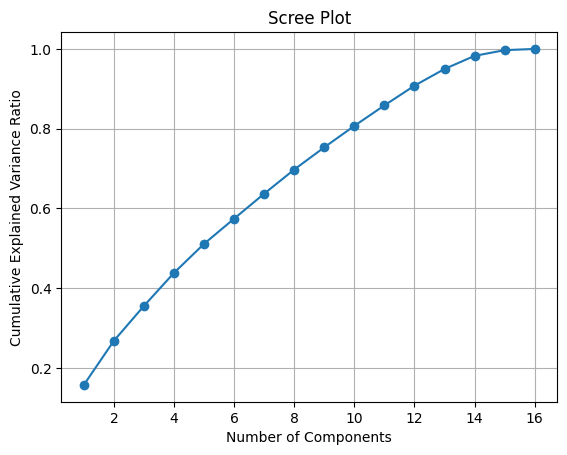

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data (mean = 0, variance = 1)
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_numeric)

# Apply PCA on the standardized data
pca = PCA(n_components=16)
pca_result = pca.fit_transform(df_standardized)

# Scree plot for cumulative explained variance
import matplotlib.pyplot as plt

plt.plot(range(1, 17), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

A Scree plot was plotted, so a visual analysis could be added to the cumulative explained variance ratio against the number of principal components. Based on the Scree Plot, we can tell the number of components necessary to sufficiently capture the variability in the dataset.


Based on that, by using the Elbow Point Identification Method, we came to the conclusion that we can explain the variance in the dataset by using the first 10 Principal Components, after PC10, the curve starts to flatten, indicating smaller returns for adding more components, so we can successfully avoid the curse of dimensionality.



#Modeling with PCA

## Regression with PCA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Drop rows with missing target values (AMNT)
pca_df_cleaned = pca_df.dropna(subset=['target'])

# Select the first 10 principal components as features
X = pca_df_cleaned[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']]

# Target variable
y = pca_df_cleaned['target']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regression model (Linear Regression in this case)
regression_model = LinearRegression()

# Train the model on the training data
regression_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regression_model.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate Residuals and Mean of Residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean of Residuals: {mean_residuals}')

# Optionally, display the model's coefficients
coefficients = pd.DataFrame(data=regression_model.coef_, index=X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 0.7940235453578791
R-Squared: 0.00084496836468817
Root Mean Squared Error (RMSE): 0.8910799881929113
Mean of Residuals: -0.0018501675230113257
      Coefficient
PC1     -0.010864
PC2     -0.007689
PC3      0.010363
PC4     -0.001331
PC5      0.009377
PC6      0.005347
PC7     -0.009472
PC8      0.009126
PC9      0.005580
PC10    -0.017159


##KNN with PCA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select the first 10 principal components as features
X = pca_df_cleaned[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']]

# Target variable
y = pca_df_cleaned['target']  # Assuming 'target' is the AMNT column

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust 'n_neighbors' as needed

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate Residuals and Mean of Residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean of Residuals: {mean_residuals}')

Mean Squared Error: 0.9763126888386453
R-Squared: -0.2285375430055605
Root Mean Squared Error (RMSE): 0.9880853651576089
Mean of Residuals: -0.003125543845632855


##Gradient Boosting with PCA

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select the first 10 principal components as features
X = pca_df_cleaned[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']]

# Target variable
y = pca_df_cleaned['target']  # Assuming 'target' is the AMNT column

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the training data
gbr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr_model.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate Residuals and Mean of Residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean of Residuals: {mean_residuals}')

Mean Squared Error: 0.9264912531848454
R-Squared: -0.16584502159632097
Root Mean Squared Error (RMSE): 0.9625441564857403
Mean of Residuals: -0.0033536746255057814


##Random Forest with PCA

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select the first 10 principal components as features
X = pca_df_cleaned[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']]

# Target variable
y = pca_df_cleaned['target']  # Assuming 'target' is the AMNT column

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate Residuals and Mean of Residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean of Residuals: {mean_residuals}')

Mean Squared Error: 1.3224793763025218
R-Squared: -0.6641344337856312
Root Mean Squared Error (RMSE): 1.149991033140051
Mean of Residuals: -0.012382154585529676


##SVR with PCA

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select the first 10 principal components as features
X = pca_df_cleaned[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']]

# Target variable
y = pca_df_cleaned['target']  # Assuming 'target' is the AMNT column

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVR model with RBF kernel
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model on the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr_model.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate Residuals and Mean of Residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean of Residuals: {mean_residuals}')

Mean Squared Error: 0.795413208531775
R-Squared: -0.0009037064203278877
Root Mean Squared Error (RMSE): 0.8918594107435179
Mean of Residuals: -0.031045247892127575


##Decision Tree Regressor with PCA

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select the first 10 principal components as features
X = pca_df_cleaned[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']]

# Target variable
y = pca_df_cleaned['target']  # Assuming 'target' is the AMNT column

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
dtr_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dtr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtr_model.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate Residuals and Mean of Residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean of Residuals: {mean_residuals}')


Mean Squared Error: 1.8973974679954628
R-Squared: -1.387579358626327
Root Mean Squared Error (RMSE): 1.3774605141329688
Mean of Residuals: -0.007523780961080245


#Interaction Terms with KNN models

According to the findings above, the KNN model with PCA performed the best, however its evaluation metrics revealed that it has weak prediction power. Therefore, new KNN models will be made with interaction terms between PCA values to see if they will produce better-performing models or not.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Assuming df_cleaned is the cleaned dataset with features and target

# Define features and target variable
X_original = df_cleaned.drop(columns=['AMNT'])  # Features without target
y = df_cleaned['AMNT']  # Target variable

# Apply PCA to reduce dimensions
n_components = min(15, X_original.shape[1])  # Set n_components to a maximum of 15 or the number of features
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_original)

# Create a DataFrame with principal components
pca_columns = [f'PC{i}' for i in range(1, n_components + 1)]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Add target variable to the DataFrame
pca_df['target'] = y

# Initialize a dictionary to store evaluation metrics for each individual principal component
pc_metrics = {}

# Iterate over each individual principal component to evaluate its performance
for pc in range(1, n_components + 1):
    # Select the specific principal component as features
    X = pca_df[[f'PC{pc}']]

    # Split the data into training and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the KNN regression model
    knn_model = KNeighborsRegressor(n_neighbors=5)

    # Train the model on the training data
    knn_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = knn_model.predict(X_test)

    # Evaluate the model using mean squared error and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    residuals = y_test - y_pred
    mean_residuals = np.mean(residuals)

    # Store the evaluation metrics
    pc_metrics[f'PC{pc}'] = {'MSE': mse, 'R2': r2, 'RMSE': rmse, 'Mean Residuals': mean_residuals}

# Convert the dictionary to a DataFrame for easier ranking and visualization
pc_metrics_df = pd.DataFrame(pc_metrics).T

# Rank the principal components based on RMSE (ascending order)
ranked_pc_metrics = pc_metrics_df.sort_values(by='RMSE')

# Print the ranked evaluation metrics
print("Ranked Principal Components based on RMSE:\n", ranked_pc_metrics)

Ranked Principal Components based on RMSE:
            MSE        R2      RMSE  Mean Residuals
PC3   1.041503  0.008872  1.020540        0.000120
PC12  1.044294  0.006216  1.021907        0.011261
PC14  1.061119 -0.009795  1.030106        0.006206
PC9   1.071470 -0.019646  1.035119        0.010226
PC13  1.072834 -0.020944  1.035777        0.007754
PC4   1.088983 -0.036312  1.043544        0.002522
PC11  1.112863 -0.059037  1.054923        0.004179
PC5   1.119030 -0.064905  1.057842        0.003344
PC10  1.137427 -0.082412  1.066502        0.002423
PC8   1.140328 -0.085173  1.067861        0.006108
PC15  1.140610 -0.085441  1.067993        0.002966
PC2   1.166321 -0.109909  1.079963        0.013058
PC1   1.175437 -0.118584  1.084176        0.001004
PC7   1.193074 -0.135367  1.092279       -0.010315
PC6   1.323745 -0.259719  1.150541       -0.011550


According to the ranking list above, KNN models with PC3, PC12, and PC14 are the best performing models in descending order.

In [ ]:
import pandas as pd
import numpy as np

# Assuming df_cleaned is the cleaned dataset with features and target

# Define features and target variable
X_original = df_cleaned.drop(columns=['AMNT'])  # Features without target
y = df_cleaned['AMNT']  # Target variable

# Apply PCA to reduce dimensions
n_components = min(15, X_original.shape[1])  # Set n_components to a maximum of 15 or the number of features
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_original)

# Get the feature weights (loadings) for each principal component
feature_weights = pd.DataFrame(pca.components_.T, index=X_original.columns, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Print the feature weights
print("Feature Weights for Each Principal Component:\n", feature_weights)


Feature Weights for Each Principal Component:
                         PC1       PC2       PC3       PC4       PC5       PC6  \
OFFICECD           0.168193 -0.318086  0.565674  0.062603  0.022109 -0.005871   
CANCLASS           0.052233 -0.366639  0.367159 -0.271167  0.091371  0.492471   
FILING             0.109412 -0.113563 -0.183971  0.552887  0.377509 -0.042113   
SCHEDULE           0.059250 -0.092792  0.063555  0.455365  0.477514  0.243465   
ORG_IND           -0.157346  0.390827  0.394691  0.028938  0.129180 -0.182322   
Latitude          -0.469747 -0.349084 -0.023886  0.106221 -0.130727 -0.122285   
Longitude          0.004528 -0.389597 -0.056418  0.164088 -0.344574 -0.145420   
Community Board    0.557760  0.007465 -0.036281  0.007855 -0.162565 -0.068791   
Community Council  0.608463  0.010818 -0.074690  0.048610 -0.152487  0.030722   
Census Tract       0.025746 -0.020159 -0.003788  0.001875 -0.012264 -0.002883   
Borough            0.083028  0.366564  0.105013 -0.259165  0.2

According to the feature weights, 'OFFICECD' is the highest-weighted feature for both PC3 and PC12, while 'Census Tract' is the highest-weighted feature for PC14.

Moving forward, two KNN models will be developed. The first will be between PC3 and PC12, as they are the top two components with the best evaluation metrics. The second model will be between PC3 and PC14, providing a more diversified approach. This is because PC3's highest-weighted feature is 'OFFICECD', while PC14's is 'Census Tract', offering a contrast in feature emphasis compared to the first model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Assuming df_cleaned is the cleaned dataset with features and target

# Define features and target variable
X_original = df_cleaned.drop(columns=['AMNT'])  # Features without target
y = df_cleaned['AMNT']  # Target variable

# Apply PCA to reduce dimensions
n_components = min(15, X_original.shape[1])  # Set n_components to a maximum of 15 or the number of features
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_original)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Add target variable to the DataFrame
pca_df['target'] = y

# 1. KNN Model with Interaction Term between PC3 and PC12
pca_df['PC3_PC12_interaction'] = pca_df['PC3'] * pca_df['PC12']
X_interaction_3_12 = pca_df[['PC3', 'PC12', 'PC3_PC12_interaction']]

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_interaction_3_12, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn_model_3_12 = KNeighborsRegressor(n_neighbors=5)
knn_model_3_12.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_3_12 = knn_model_3_12.predict(X_test)
mse_3_12 = mean_squared_error(y_test, y_pred_3_12)
r2_3_12 = r2_score(y_test, y_pred_3_12)
rmse_3_12 = np.sqrt(mse_3_12)
residuals_3_12 = y_test - y_pred_3_12
mean_residuals_3_12 = np.mean(residuals_3_12)

# Print the evaluation metrics
print("KNN Model with Interaction between PC3 and PC12:")
print(f'Mean Squared Error: {mse_3_12}')
print(f'R-Squared: {r2_3_12}')
print(f'Root Mean Squared Error (RMSE): {rmse_3_12}')
print(f'Mean of Residuals: {mean_residuals_3_12}')

# 2. KNN Model with Interaction Term between PC3 and PC14
pca_df['PC3_PC14_interaction'] = pca_df['PC3'] * pca_df['PC14']
X_interaction_3_14 = pca_df[['PC3', 'PC14', 'PC3_PC14_interaction']]

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_interaction_3_14, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn_model_3_14 = KNeighborsRegressor(n_neighbors=5)
knn_model_3_14.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_3_14 = knn_model_3_14.predict(X_test)
mse_3_14 = mean_squared_error(y_test, y_pred_3_14)
r2_3_14 = r2_score(y_test, y_pred_3_14)
rmse_3_14 = np.sqrt(mse_3_14)
residuals_3_14 = y_test - y_pred_3_14
mean_residuals_3_14 = np.mean(residuals_3_14)

# Print the evaluation metrics
print("\nKNN Model with Interaction between PC3 and PC14:")
print(f'Mean Squared Error: {mse_3_14}')
print(f'R-Squared: {r2_3_14}')
print(f'Root Mean Squared Error (RMSE): {rmse_3_14}')
print(f'Mean of Residuals: {mean_residuals_3_14}')


KNN Model with Interaction between PC3 and PC12:
Mean Squared Error: 1.35109700987676
R-Squared: -0.28574755222697035
Root Mean Squared Error (RMSE): 1.1623669858855938
Mean of Residuals: -0.0064376360825583335

KNN Model with Interaction between PC3 and PC14:
Mean Squared Error: 1.1498438791788532
R-Squared: -0.09422857299656617
Root Mean Squared Error (RMSE): 1.0723077352975
Mean of Residuals: -0.003656043698094149


The KNN model between PC3 and PC12 shows a high Mean Squared Error (MSE) of 1.35 and a negative R-squared value of -0.29, indicating that the model performs extremely poorly. The RMSE is 1.16, and the mean of residuals is close to zero, suggesting minimal bias in the model predictions, though the overall fit is weak.


In comparison, the KNN model between PC3 and PC14 performs just as poorly, however, it does have a lower MSE of 1.15 and a less negative R-squared value of -0.09. The RMSE is 1.07, indicating a smaller average error in predictions. The mean of residuals is also close to zero, pointing to low bias. Despite this, the R-squared being negative in both models suggests neither provides an adequate fit for the data, therefore none of them will be used moving forward.


# Modeling Analysis

### Model Analysis:

**General Observations from modeling with PCA analysis:**

1. Overall, all the models using the Principal Components had low R-squared values. In all models, we experience metrics that are close to zero or negative, suggesting that the features in the PCA analysis might not be capturing the relationships needed to correctly predict the target. Also, all of them had high RMSE and MSE, showing that there is a relevant predictable error.

2. Some models had a really similar performance such as regression and KNN with PCA, with identical performance metrics, opening a discussion on how much PCA components truly capture the data patterns.


**Model's Analysis:**

1. Regression with PCA: With a very low R2, it indicates poor fit, showing that the linear model is not effective.

2. KNN with PCA: Has a negative R2, showing that the model performs worse than simple mean predictions.

3. Gradient Boosting with PCA: With an MSE of 0.9265, it has a higher error when compared to KNN and Linear Regression. With a negative R2 of - 0.1658, it also shows that the model performs worse than the simple mean prediction. It is noticeable that Gradient Boosting is struggling with the reduced dimensionality from PCA.

4. Random Forest with PCA: This model has the highest MSE of all other models plotted with PCA, suggesting that this model does not capture the PCA results that well. What we can conclude is that RF requires more information to perform better.

5. SVR with PCA: With an MSE of 0.7954, it is similar in performance with the linear regression and KNN. The r2 is a negative value extremely close to 0, indicating no predictive power over a mean-based model.

6. Decision Tree Regressor: The worst performing model, with a high MSE and negative r2. Also, the DTR is overfitting to the PCA components, which may not capture the needed feature interactions.


**To conclude...**

PCA appears to have a "certain" limited effectiveness in extracting meaningful features for the dataset. Also, we concluded that advanced models such as Gradient Boosting and Random Forest did not perform better than simpler models. Overall, all these results show the importance of feature selection and dimensionality reduction's impact on model performance.


#Clustering

## K-Means Clustering

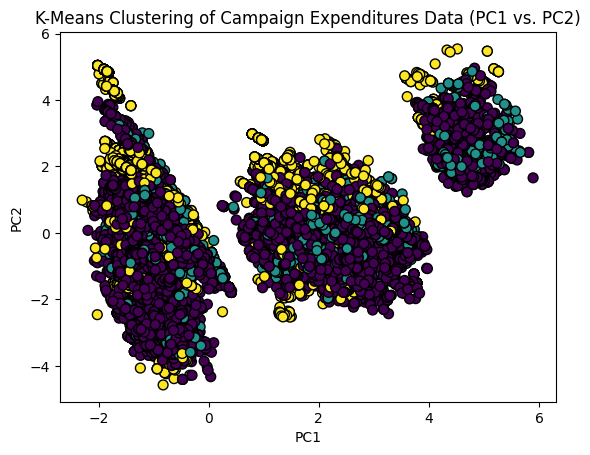

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming pca_df contains your PCA-transformed dataset
# Step 1: Drop the target variable (if any) for clustering
X = pca_df.drop('target', axis=1, errors='ignore')  # Use PCA components only

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means clustering
n_clusters = 3  # Using k=3 based on the elbow method analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
pca_df['cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Use PC1 and PC2 for visualization
feature1 = 'PC1'
feature2 = 'PC2'

# Step 5: Scatter plot of the clustered data using PC1 and PC2
plt.scatter(pca_df[feature1], pca_df[feature2], c=pca_df['cluster'], cmap='viridis', edgecolor='k', s=50)
plt.title('K-Means Clustering of Campaign Expenditures Data (PC1 vs. PC2)')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

We can see from this K-Means clustering plot that the data points are divided into distinct clusters, where the data is grouped into three main segments. We can notice that the clusters show some separations, indicating that both these two components can successfully capture the variance in the dataset.

Some insights that we gathered were that PC1 represents a significant axis of variation, and might be related to a combination of financial and categorical factors. PC2, however, adds another layer of this variation, possibly capturing information that differentiates certain behaviors or campaign characteristics.

For the business scenario, this clustering analysis can help identify the **campaign's expenditure segments**, with unique spending behaviors or patterns.

Also, we can detect some abnormal behavior in the expenditures, which probably will require further investigation, but it is interesting enough to point this out in the analysis.



## Elbow Method

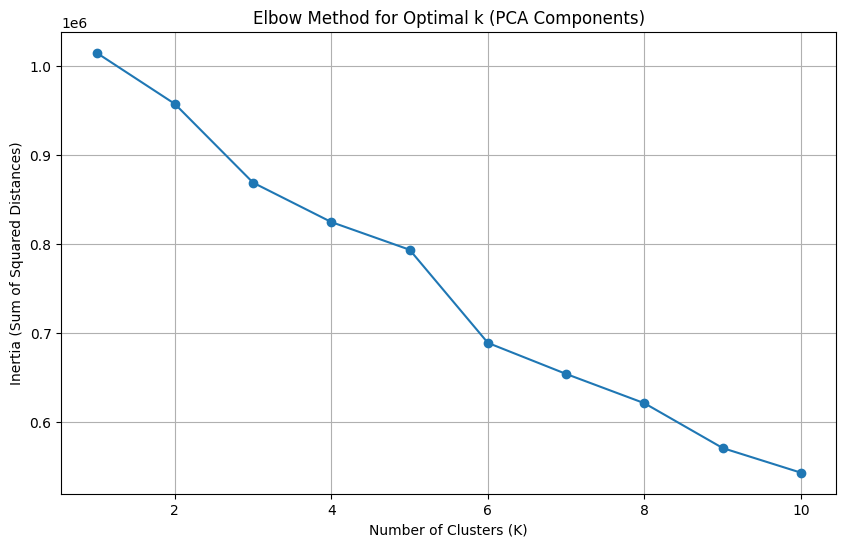

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming pca_df contains your PCA-transformed dataset
# Step 1: Drop the target variable (if any) for clustering
X = pca_df.drop('target', axis=1, errors='ignore')  # Use PCA components only

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Elbow Method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Step 4: Plot the results of the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k (PCA Components)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

This elbow plot shows the inertia plotted against the number of clusters. By doing so, we can find the optimal K number. For this number, the optimal K number appears to be K = 4 or K = 5, which means that adding more clusters than this into the analysis will not improve the clustering quality.

## Silhouette Score Analysis

We performed this analysis with a sample so that the code could run.


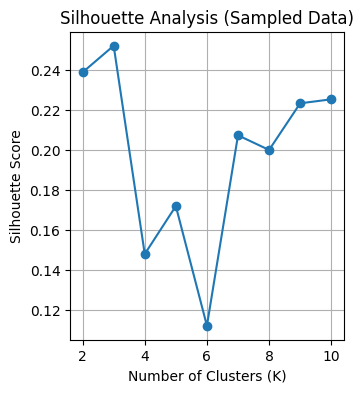

In [ ]:
from sklearn.metrics import silhouette_score

# Sampling the data to speed up the process (e.g., 10% of the data)
df_sampled = df_cleaned.sample(frac=0.1, random_state=42)  # Adjust the fraction as needed

# Drop the target variable (e.g., 'AMNT') and standardize the data
X_sampled = df_sampled.drop('AMNT', axis=1, errors='ignore')
X_scaled_sampled = scaler.fit_transform(X_sampled)

# Silhouette Analysis on the sampled data
silhouette_scores_sampled = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled_sampled)
    silhouette_scores_sampled.append(silhouette_score(X_scaled_sampled, labels))

# Plotting Silhouette Scores for sampled data
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 2)
plt.plot(range(2, 11), silhouette_scores_sampled, marker='o')
plt.title('Silhouette Analysis (Sampled Data)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

We plotted a silhouette score, considering that we can gather valuable insights regarding the clustering quality for different numbers of clusters. This score helps determine the separation distance between the resulting clusters.


It is noticeable that the optimal number of clusters, according to this plot, is K = 4, considering it has the highest Silhouette Score. After K = 4, there are two significant drops that decrease the overall performance of the score (K = 5 and K = 8).


To conclude, using 4 clusters can offer a clearer segmentation of the data, making it easier to identify patterns and certain behaviors.


# Natural Language Processing Analysis

##NLP

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-61-394c9102e7fe>:14: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv(file_path)


   ELECTION  OFFICECD CANDID CANCLASS      CANDLAST CANDFIRST CANDMI  \
0      2005         4    206        P       Manzano    Carlos    NaN   
1      2005         4     ED        P  Carrion, Jr.    Adolfo    NaN   
2      2005         4     ED        P  Carrion, Jr.    Adolfo    NaN   
3      2005         4     BW        P     Moskowitz       Eva      S   
4      2005         5    232        P        Weprin     David      I   

  COMMITTEE  FILING SCHEDULE  ...                   NTA    Borough PAY_METHOD  \
0         K       5        F  ...               Clinton  MANHATTAN      Final   
1         J       8        F  ...  Murray Hill-Kips Bay  MANHATTAN      Final   
2         J       5        F  ...  Murray Hill-Kips Bay  MANHATTAN      Final   
3         A      10        F  ...                   NaN        NaN      Final   
4         K      17        F  ...                   NaN        NaN      Final   

   AMNT PURPOSECD           PURPOSE        EXPLAIN EXEMPTCD RR_IND SEG_IND  
0  

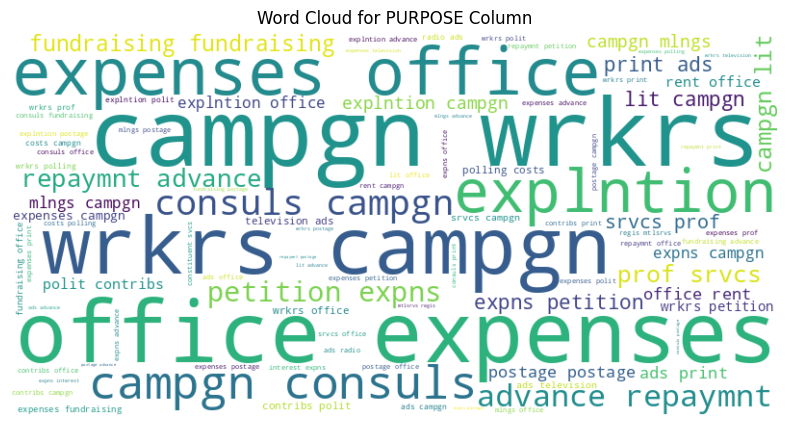

In [ ]:
# Step 1: Import necessary libraries
from google.colab import drive
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 2: Mount Google Drive
drive.mount('/content/drive')

# Step 3: Load the CSV file from Google Drive
# Update the file path to point to the correct location
file_path = '/content/drive/My Drive/Hult/2005_Campaign_Expenditures_20241016.csv'
df_original = pd.read_csv(file_path)

# Step 4: Display the first few rows of the DataFrame
print(df_original.head())

# Step 5: Create a new DataFrame for the PURPOSE column
df_purpose = df_original[['PURPOSE']].copy()  # Extract the 'PURPOSE' column from the original dataset

# Step 6: Fill missing values with empty strings
df_purpose['PURPOSE'] = df_purpose['PURPOSE'].fillna('')

# Step 7: Text Preprocessing and Tokenization
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

df_purpose['cleaned_purpose'] = df_purpose['PURPOSE'].apply(preprocess_text)

# Step 8: Generate Word Cloud for the 'PURPOSE' column
purpose_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_purpose['cleaned_purpose']))

# Step 9: Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(purpose_wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud for PURPOSE Column')
plt.show()


## Take out stop words and lemmatize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-62-a0725afff8f9>:19: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv(file_path)


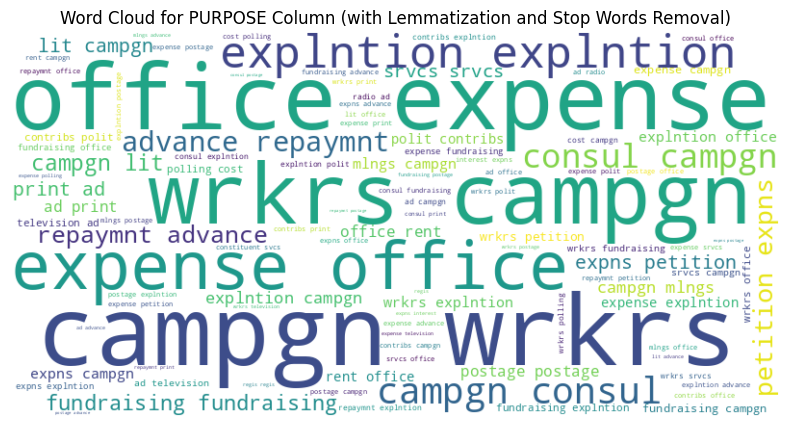

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Make sure you download the necessary NLTK resources (run only once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Step 1: Load the dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Hult/2005_Campaign_Expenditures_20241016.csv'
df_original = pd.read_csv(file_path)

# Step 2: Extract the PURPOSE column and fill missing values
df_purpose = df_original[['PURPOSE']].copy()
df_purpose['PURPOSE'] = df_purpose['PURPOSE'].fillna('')

# Step 3: Text Preprocessing with Lemmatization and Stop Words Removal
def preprocess_text(text):
    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()
    # Define stop words for faster lookups
    stop_words = set(stopwords.words('english'))
    # Tokenize the text
    words = word_tokenize(text.lower())
    # Remove stop words and lemmatize the remaining words
    cleaned_words = [
        lemmatizer.lemmatize(word)
        for word in words
        if word.isalpha() and word not in stop_words  # Keep alphabetic words and remove stopwords
    ]
    return ' '.join(cleaned_words)

# Apply the text preprocessing function to the PURPOSE column
df_purpose['cleaned_purpose'] = df_purpose['PURPOSE'].apply(preprocess_text)

# Step 4: Generate Word Cloud for the cleaned text in PURPOSE
purpose_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_purpose['cleaned_purpose']))

# Step 5: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(purpose_wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud for PURPOSE Column (with Lemmatization and Stop Words Removal)')
plt.show()

## Get the Relationships


Top 20 words correlated with AMNT:
          word  correlation
0       campgn     0.336440
1      consuls     0.267003
2    explntion    -0.218735
3        other    -0.218735
4      advance    -0.151818
5     repaymnt    -0.151818
6          lit     0.150725
7     expenses    -0.150501
8        wrkrs     0.122467
9       office    -0.115302
10         ads     0.112972
11        prof     0.110589
12       srvcs     0.110589
13        rent     0.108215
14     postage    -0.086503
15    contribs     0.083693
16       polit     0.083693
17       radio     0.082521
18  television     0.077444
19       mlngs     0.074774


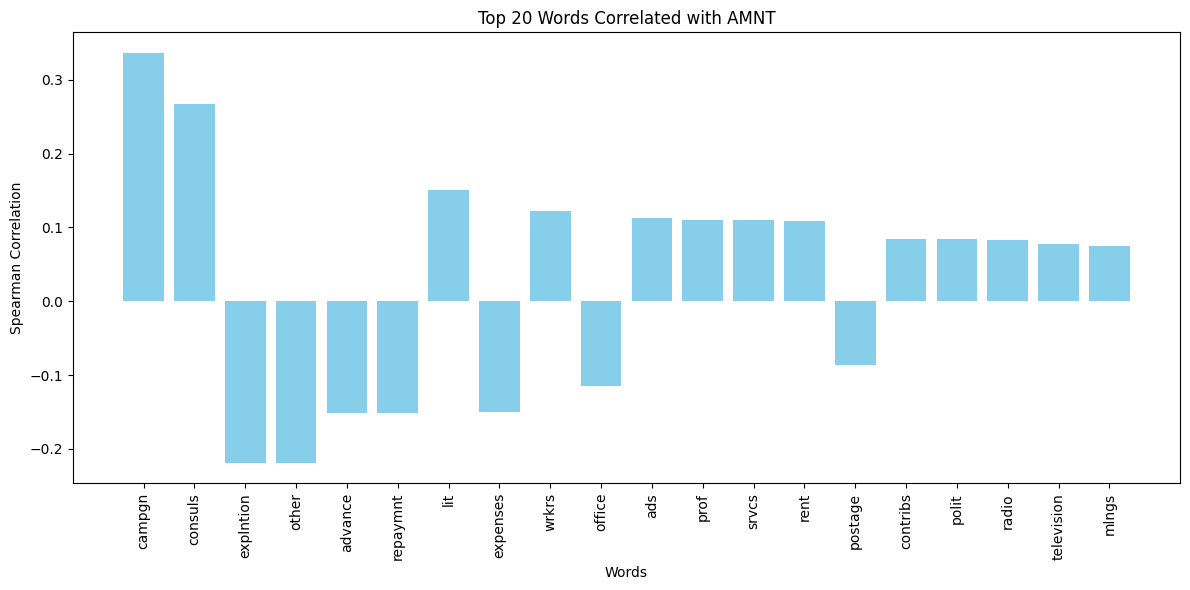

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# Step 1: Sample the dataset for faster analysis (adjust n as needed)
df_sampled = df_original.sample(n=1000, random_state=42)  # Adjust n to a suitable value for your analysis

# Step 2: Create a document-term matrix for 'PURPOSE'
df_sampled['PURPOSE'] = df_sampled['PURPOSE'].fillna('')  # Ensure no missing values in 'PURPOSE'

vectorizer = CountVectorizer(max_features=50)  # Reduced max_features for faster computation
dtm = vectorizer.fit_transform(df_sampled['PURPOSE'])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert to DataFrame
word_df = pd.DataFrame(dtm.toarray(), columns=feature_names)

# Step 3: Combine the word frequency DataFrame with the 'AMNT' column
combined_df = pd.concat([df_sampled[['AMNT']].reset_index(drop=True), word_df.reset_index(drop=True)], axis=1)

# Step 4: Function to analyze correlation with target variables
def analyze_correlation(target_variable):
    correlations = []
    for word in feature_names:
        if combined_df[word].nunique() <= 1:
            # Skip columns with constant values
            continue
        corr, _ = spearmanr(combined_df[word], combined_df[target_variable])
        correlations.append((word, corr))

    # Sort by absolute correlation
    correlations.sort(key=lambda x: abs(x[1]), reverse=True)
    return pd.DataFrame(correlations[:20], columns=['word', 'correlation'])

# Analyze correlation with 'AMNT'
amnt_corr = analyze_correlation('AMNT')
print("\nTop 20 words correlated with AMNT:")
print(amnt_corr)

# Visualize results
def plot_correlation(corr_df, title):
    plt.figure(figsize=(12, 6))
    plt.bar(corr_df['word'], corr_df['correlation'], color='skyblue')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Spearman Correlation')
    plt.tight_layout()
    plt.show()

# Plot the top correlated words with AMNT
plot_correlation(amnt_corr, 'Top 20 Words Correlated with AMNT')

1. **Word Cloud for Purpose:**

This word cloud displays the most frequent terms in the Purpose column. Some words like "campgn", "office", "expenses", and "wrkrs" show a strong correlation with the campaign execution, showing that these specific words are heavy when explaining the purpose behind every expenditure.


2. **Word Cloud After Stop Words Removal and Lemmatization:**

After the removal of Stop Words and lemmatizing, the word cloud still shows the terms mentioned above. However, it helps truly identify the most important and relevant features, reducing noise in the text analysis, and making it easier to identify the most significant features in the campaign expenditure that might have an impact on its execution.


3. **Top 20 Words Correlated with Amount:**

This graph shows the words that have the highest correlation with Amount. Some words like “campgn” and "consuls" have a positive correlation with the target variable (Amount Spent). On the other hand, negative correlations like "explitn" and "repaymnt" show a negative correlation, indicating that as their frequency increases, the spending amount may decrease.


#Modeling with Feature Selection

##Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features and target variable
X = df_cleaned.drop(columns=['AMNT'])  # Drop target variable from features
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = regressor.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)

# Calculate residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)  # Mean of residuals

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean of Residuals:", mean_residuals)

Mean Squared Error (MSE): 1.0085026285186676
Root Mean Squared Error (RMSE): 1.0042423156383462
R-squared (R2): 0.04027632616060739
Mean of Residuals: 0.0009058457514265282



The MSE is close to 1, which indicates that on average, the model's predictions deviate by approximately 1 unit from the actual values.

The low R² (0.0403) suggests that the Linear Regression model is not performing well on this dataset. It explains very little of the variance in the target variable. This could indicate that linear relationships between features and the target are weak or nonexistent.

RMSE of 1.0042 shows that the predictions are off by about 1 unit on average, which, depending on the context, might be a significant error.

The mean of residuals being close to zero is a good sign in terms of unbiased predictions, but it doesn't necessarily imply a good model fit.

###Kbest

####Kbest for 5 Features

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Select all numerical columns (except 'AMNT') from the cleaned dataset
X = df_cleaned.drop(columns=['AMNT'])  # Exclude 'AMNT' from the features
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest
k_best_selector = SelectKBest(score_func=f_regression, k=5)  # Selecting top 5 features
X_selected = k_best_selector.fit_transform(X, y)  # Fit and transform the data

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features:", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)

# Calculate residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)  # Mean of residuals

# Step 7: Print results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features: Index(['OFFICECD', 'CANCLASS', 'ORG_IND', 'State_Group', 'PURPOSECD_Group'], dtype='object')
Mean Squared Error (MSE): 1.0090703092473308
Root Mean Squared Error (RMSE): 1.0045249171858959
R-squared (R2): 0.03973610284430251
Mean of Residuals: 0.0007424813091936085


####Kbest for 8 Features

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Select all numerical columns (except 'AMNT') from the cleaned dataset
X = df_cleaned.drop(columns=['AMNT'])  # Exclude 'AMNT' from the features
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest
k_best_selector = SelectKBest(score_func=f_regression, k=8)  # Selecting top 8 features
X_selected = k_best_selector.fit_transform(X, y)  # Fit and transform the data

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features:", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)

# Calculate residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)  # Mean of residuals

# Step 7: Print results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features: Index(['OFFICECD', 'CANCLASS', 'ORG_IND', 'Community Board',
       'Community Council', 'State_Group', 'C_CODE_Group', 'PURPOSECD_Group'],
      dtype='object')
Mean Squared Error (MSE): 1.008948894975619
Root Mean Squared Error (RMSE): 1.004464481689432
R-squared (R2): 0.03985164458669255
Mean of Residuals: 0.0007855622365607373


####Kbest for 10 Features

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Select all numerical columns (except 'AMNT') from the cleaned dataset
X = df_cleaned.drop(columns=['AMNT'])  # Exclude 'AMNT' from the features
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest
k_best_selector = SelectKBest(score_func=f_regression, k=10)  # Selecting top 10 features
X_selected = k_best_selector.fit_transform(X, y)  # Fit and transform the data

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features:", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)

# Calculate residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)  # Mean of residuals

# Step 7: Print results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features: Index(['OFFICECD', 'CANCLASS', 'FILING', 'ORG_IND', 'Longitude',
       'Community Board', 'Community Council', 'State_Group', 'C_CODE_Group',
       'PURPOSECD_Group'],
      dtype='object')
Mean Squared Error (MSE): 1.0085183947343528
Root Mean Squared Error (RMSE): 1.0042501654141525
R-squared (R2): 0.04026132252054537
Mean of Residuals: 0.0008658568037605451


####Kbest for 11 Features

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Select all numerical columns (except 'AMNT') from the cleaned dataset
X = df_cleaned.drop(columns=['AMNT'])  # Exclude 'AMNT' from the features
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest
k_best_selector = SelectKBest(score_func=f_regression, k=11)  # Selecting top 11 features
X_selected = k_best_selector.fit_transform(X, y)  # Fit and transform the data

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features:", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)

# Calculate residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)  # Mean of residuals

# Step 7: Print results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features: Index(['OFFICECD', 'CANCLASS', 'FILING', 'ORG_IND', 'Longitude',
       'Community Board', 'Community Council', 'EXEMPTCD', 'State_Group',
       'C_CODE_Group', 'PURPOSECD_Group'],
      dtype='object')
Mean Squared Error (MSE): 1.0085148222386726
Root Mean Squared Error (RMSE): 1.004248386724456
R-squared (R2): 0.04026472222281874
Mean of Residuals: 0.0008344057107152155


####Kbest for 14 Features

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Select all numerical columns (except 'AMNT') from the cleaned dataset
X = df_cleaned.drop(columns=['AMNT'])  # Exclude 'AMNT' from the features
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest
k_best_selector = SelectKBest(score_func=f_regression, k=14)  # Selecting top 14 features
X_selected = k_best_selector.fit_transform(X, y)  # Fit and transform the data

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features:", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)

# Calculate residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)  # Mean of residuals

# Step 7: Print results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features: Index(['OFFICECD', 'CANCLASS', 'FILING', 'SCHEDULE', 'ORG_IND', 'Latitude',
       'Longitude', 'Community Board', 'Community Council', 'Census Tract',
       'EXEMPTCD', 'State_Group', 'C_CODE_Group', 'PURPOSECD_Group'],
      dtype='object')
Mean Squared Error (MSE): 1.0085272594734742
Root Mean Squared Error (RMSE): 1.0042545790154378
R-squared (R2): 0.0402528865484848
Mean of Residuals: 0.000832569042564989


####Kbest for 15 Features

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Select all numerical columns (except 'AMNT') from the cleaned dataset
X = df_cleaned.drop(columns=['AMNT'])  # Exclude 'AMNT' from the features
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest
k_best_selector = SelectKBest(score_func=f_regression, k=15)  # Selecting top 15 features
X_selected = k_best_selector.fit_transform(X, y)  # Fit and transform the data

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features:", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)

# Calculate residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)  # Mean of residuals

# Step 7: Print results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features: Index(['OFFICECD', 'CANCLASS', 'FILING', 'SCHEDULE', 'ORG_IND', 'Latitude',
       'Longitude', 'Community Board', 'Community Council', 'Census Tract',
       'Borough', 'EXEMPTCD', 'State_Group', 'C_CODE_Group',
       'PURPOSECD_Group'],
      dtype='object')
Mean Squared Error (MSE): 1.0085026285186676
Root Mean Squared Error (RMSE): 1.0042423156383462
R-squared (R2): 0.04027632616060739
Mean of Residuals: 0.0009058457514288089


When performing Kbest Feature Selection for the model, when using a higher number of features, the model is usually better, but it is still an untrustworthy model.

This is due to the fact that our best model was with K=15 where we have an R² of 0.0402 which suggests that the model does not explain much of the variance in the target variable. Regarding the MSE and RMSE, we have a 1.008 and 1.004 respectively, meaning that the model doesn't do well when it comes to predicting accuracy. Lastly, the Mean of residuals is 0.0009, which indicates that the model is not overpredicting or underpredicting. Even though the model did not perform well, it was the best model of all the kbest performed, since at the moment we decreased the number of features the metrics got worse, making k=5 the worst model.

The features for our best model, K=15 are: 'OFFICECD', 'CANCLASS', 'FILING', 'SCHEDULE', 'ORG_IND', 'Latitude', 'Longitude', 'Community Board', 'Community Council', 'Census Tract', 'Borough', 'EXEMPTCD', 'State_Group', 'C_CODE_Group','PURPOSECD_Group'

###LASSO

####Alpha = 0.1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features and target variable
X = df_cleaned.drop(columns=['AMNT'])  # Drop target variable from features
y = df_cleaned['AMNT']  # Target variable

# Step 1: Apply Lasso regression for feature selection (alpha=0.1)
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Get the coefficients and select features with non-zero coefficients
lasso_selected_features = X.columns[(lasso.coef_ != 0)].tolist()
print("Lasso Selected Features (alpha=0.1):", lasso_selected_features)

# Step 2: Prepare the data with the selected features
if len(lasso_selected_features) == 0:
    print("No features selected by Lasso. Please adjust alpha or review the data.")
else:
    X_lasso = X[lasso_selected_features]

    # Step 3: Train-test split (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X_lasso, y, test_size=0.2, random_state=42)

    # Step 4: Initialize and train the Linear Regression model
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Step 5: Make predictions on the test set
    y_pred = regressor.predict(X_test)

    # Step 6: Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
    r2 = r2_score(y_test, y_pred)

    # Calculate residuals
    residuals = y_test - y_pred
    mean_residuals = np.mean(residuals)  # Mean of residuals

    # Step 7: Print evaluation metrics
    print("Linear Regression Model after Lasso Feature Selection (alpha=0.1)")
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R²):", r2)
    print("Mean of Residuals:", mean_residuals)

Lasso Selected Features (alpha=0.1): ['State_Group']
Linear Regression Model after Lasso Feature Selection (alpha=0.1)
Mean Squared Error (MSE): 1.0191138308599563
Root Mean Squared Error (RMSE): 1.0095116794074035
R-squared (R²): 0.030178363292832522
Mean of Residuals: -0.0001169251211857726


####Alpha = 0.05

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features and target variable
X = df_cleaned.drop(columns=['AMNT'])  # Drop target variable from features
y = df_cleaned['AMNT']  # Target variable

# Step 1: Apply Lasso regression for feature selection (alpha=0.1)
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Get the coefficients and select features with non-zero coefficients
lasso_selected_features = X.columns[(lasso.coef_ != 0)].tolist()
print("Lasso Selected Features (alpha=0.05):", lasso_selected_features)

# Step 2: Prepare the data with the selected features
if len(lasso_selected_features) == 0:
    print("No features selected by Lasso. Please adjust alpha or review the data.")
else:
    X_lasso = X[lasso_selected_features]

    # Step 3: Train-test split (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X_lasso, y, test_size=0.2, random_state=42)

    # Step 4: Initialize and train the Linear Regression model
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Step 5: Make predictions on the test set
    y_pred = regressor.predict(X_test)

    # Step 6: Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
    r2 = r2_score(y_test, y_pred)

    # Calculate residuals
    residuals = y_test - y_pred
    mean_residuals = np.mean(residuals)  # Mean of residuals

    # Step 7: Print evaluation metrics
    print("Linear Regression Model after Lasso Feature Selection (alpha=0.05)")
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R²):", r2)
    print("Mean of Residuals:", mean_residuals)

Lasso Selected Features (alpha=0.05): ['State_Group']
Linear Regression Model after Lasso Feature Selection (alpha=0.05)
Mean Squared Error (MSE): 1.0191138308599563
Root Mean Squared Error (RMSE): 1.0095116794074035
R-squared (R²): 0.030178363292832522
Mean of Residuals: -0.0001169251211857726


####Alpha = 0.01

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features and target variable
X = df_cleaned.drop(columns=['AMNT'])  # Drop target variable from features
y = df_cleaned['AMNT']  # Target variable

# Step 1: Apply Lasso regression for feature selection (alpha=0.01)
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Get the coefficients and select features with non-zero coefficients
lasso_selected_features = X.columns[(lasso.coef_ != 0)].tolist()
print("Lasso Selected Features (alpha=0.01):", lasso_selected_features)

# Step 2: Prepare the data with the selected features
if len(lasso_selected_features) == 0:
    print("No features selected by Lasso. Please adjust alpha or review the data.")
else:
    X_lasso = X[lasso_selected_features]

    # Step 3: Train-test split (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X_lasso, y, test_size=0.2, random_state=42)

    # Step 4: Initialize and train the Linear Regression model
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Step 5: Make predictions on the test set
    y_pred = regressor.predict(X_test)

    # Step 6: Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
    r2 = r2_score(y_test, y_pred)

    # Calculate residuals
    residuals = y_test - y_pred
    mean_residuals = np.mean(residuals)  # Mean of residuals

    # Step 7: Print evaluation metrics
    print("Linear Regression Model after Lasso Feature Selection (alpha=0.01)")
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R²):", r2)
    print("Mean of Residuals:", mean_residuals)

Lasso Selected Features (alpha=0.01): ['State_Group']
Linear Regression Model after Lasso Feature Selection (alpha=0.01)
Mean Squared Error (MSE): 1.0191138308599563
Root Mean Squared Error (RMSE): 1.0095116794074035
R-squared (R²): 0.030178363292832522
Mean of Residuals: -0.0001169251211857726


In all cases, only one feature, State_Group, was selected.

The MSE, RMSE, and R² values are identical across all three alpha values.

The Mean of Residuals is also the same for all models, indicating consistent prediction errors.

Since the performance metrics (MSE, RMSE, R²) are identical across the different alpha values, the choice of alpha does not significantly affect the model in this case.

All models yield the same performance, with the selected feature being State_Group.

###Model for best features for Kbest and LASSO

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Step 1: Drop constant features and columns with all NaN values
X_filtered = X.loc[:, X.nunique() > 1]  # Drop constant features
X_filtered = X_filtered.dropna(axis=1, how='all')  # Drop columns with all NaN values

# Step 2: Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_filtered)

# Step 3: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Select top 11 features using KBest
kbest_selector = SelectKBest(score_func=f_regression, k=11)
X_kbest_train = kbest_selector.fit_transform(X_train, y_train)
X_kbest_test = kbest_selector.transform(X_test)

# Get KBest feature indices
kbest_feature_indices = kbest_selector.get_support(indices=True)
kbest_features = X_filtered.columns[kbest_feature_indices].tolist()
print("KBest Selected Features:", kbest_features)

# Step 6: Train Lasso model for feature selection
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as necessary
lasso_model.fit(X_train, y_train)

# Get selected features (non-zero coefficients)
lasso_selected_indices = np.where(lasso_model.coef_ != 0)[0]
lasso_selected_features = X_filtered.columns[lasso_selected_indices].tolist()
print("Lasso Selected Features:", lasso_selected_features)

# Step 7: Combine features from KBest and Lasso
combined_features = set(kbest_features).union(set(lasso_selected_features))
print("Combined Selected Features:", combined_features)

# Get indices of combined features in original data
combined_indices = np.isin(X_filtered.columns, list(combined_features))

# Step 8: Create final feature set
X_combined_train = X_train[:, combined_indices]
X_combined_test = X_test[:, combined_indices]

# Step 9: Build and evaluate the model using combined features
final_model = Lasso(alpha=0.1)  # You can use any other model as well
final_model.fit(X_combined_train, y_train)

# Make predictions and evaluate
y_pred = final_model.predict(X_combined_test)

# Step 10: Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)  # Mean of residuals

# Step 11: Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
print(f"Mean of Residuals: {mean_residuals}")

KBest Selected Features: ['OFFICECD', 'CANCLASS', 'FILING', 'ORG_IND', 'Longitude', 'Community Board', 'Community Council', 'EXEMPTCD', 'State_Group', 'C_CODE_Group', 'PURPOSECD_Group']
Lasso Selected Features: ['State_Group']
Combined Selected Features: {'EXEMPTCD', 'CANCLASS', 'C_CODE_Group', 'OFFICECD', 'FILING', 'ORG_IND', 'Longitude', 'Community Council', 'State_Group', 'Community Board', 'PURPOSECD_Group'}
Mean Squared Error (MSE): 1.0327603774519032
Root Mean Squared Error (RMSE): 1.0162481869365885
R² Score: 0.017191868800814247
Mean of Residuals: -0.0021612614466136404


The combined features from your best and Lasso selections indicate a broader view of potentially relevant features. Incorporating multiple features can provide the model with more information to make predictions.

MSE and RMSE: Both metrics are relatively low, indicating that the predictions are reasonably close to the actual values.

R² Score: The R² score of 0.0172 is quite low, suggesting that the model explains only about 1.72% of the variance in the target variable. This indicates that the current model has limited predictive power.

Mean of Residuals: The mean of the residuals being close to zero (-0.0022) indicates that there is no significant bias in the predictions. However, the overall model still lacks effectiveness due to the low R² score.

###Decision Trees

####DT for 5 features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Prepare the dataset
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)
y = df_cleaned['AMNT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree for feature importance
tree = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': tree.feature_importances_}).sort_values(by='Importance', ascending=False)

# Select top 5 features
top_features = feature_importance_df['Feature'].head(5)
print("Top 5 selected features:\n", top_features)

# Train Linear Regression using top 5 features
regressor = LinearRegression().fit(X_train[top_features], y_train)
y_pred = regressor.predict(X_test[top_features])

# Evaluate the model with additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)  # Mean of residuals

# Print evaluation metrics
print("\nMSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)
print("Mean of Residuals:", mean_residuals)

Top 5 selected features:
 5            Latitude
2              FILING
14    PURPOSECD_Group
12        State_Group
1            CANCLASS
Name: Feature, dtype: object

MSE: 1.0095666995748456
RMSE: 1.0047719639673698
R²: 0.03926372177626258
Mean of Residuals: 0.000584512662624229


####DT for 8 features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Prepare the dataset
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)
y = df_cleaned['AMNT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree for feature importance
tree = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': tree.feature_importances_}).sort_values(by='Importance', ascending=False)

# Select top 8 features
top_features = feature_importance_df['Feature'].head(8)
print("Top 8 selected features:\n", top_features)

# Train Linear Regression using top 8 features
regressor = LinearRegression().fit(X_train[top_features], y_train)
y_pred = regressor.predict(X_test[top_features])

# Evaluate the model with additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)  # Mean of residuals

# Print evaluation metrics
print("\nMSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)
print("Mean of Residuals:", mean_residuals)

Top 8 selected features:
 5            Latitude
2              FILING
14    PURPOSECD_Group
12        State_Group
1            CANCLASS
6           Longitude
0            OFFICECD
9        Census Tract
Name: Feature, dtype: object

MSE: 1.0088188087549304
RMSE: 1.0043997255848542
R²: 0.03997543883581467
Mean of Residuals: 0.0003436065658152205


####DT for 10 features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Prepare the dataset
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)
y = df_cleaned['AMNT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree for feature importance
tree = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': tree.feature_importances_}).sort_values(by='Importance', ascending=False)

# Select top 10 features
top_features = feature_importance_df['Feature'].head(10)
print("Top 10 selected features:\n", top_features)

# Train Linear Regression using top 10 features
regressor = LinearRegression().fit(X_train[top_features], y_train)
y_pred = regressor.predict(X_test[top_features])

# Evaluate the model with additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)  # Mean of residuals

# Print evaluation metrics
print("\nMSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)
print("Mean of Residuals:", mean_residuals)

Top 10 selected features:
 5              Latitude
2                FILING
14      PURPOSECD_Group
12          State_Group
1              CANCLASS
6             Longitude
0              OFFICECD
9          Census Tract
8     Community Council
13         C_CODE_Group
Name: Feature, dtype: object

MSE: 1.0087587248789551
RMSE: 1.0043698147987896
R²: 0.040032616592777126
Mean of Residuals: 0.0004920443909033225


####DT for 11 features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Prepare the dataset
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)
y = df_cleaned['AMNT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree for feature importance
tree = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': tree.feature_importances_}).sort_values(by='Importance', ascending=False)

# Select top 11 features
top_features = feature_importance_df['Feature'].head(11)
print("Top 11 selected features:\n", top_features)

# Train Linear Regression using top 11 features
regressor = LinearRegression().fit(X_train[top_features], y_train)
y_pred = regressor.predict(X_test[top_features])

# Evaluate the model with additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)  # Mean of residuals

# Print evaluation metrics
print("\nMSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)
print("Mean of Residuals:", mean_residuals)

Top 11 selected features:
 5              Latitude
2                FILING
14      PURPOSECD_Group
12          State_Group
1              CANCLASS
6             Longitude
0              OFFICECD
9          Census Tract
8     Community Council
13         C_CODE_Group
7       Community Board
Name: Feature, dtype: object

MSE: 1.0087010598748265
RMSE: 1.0043411073309836
R²: 0.04008749247316579
Mean of Residuals: 0.00045866915283058427


####DT for 14 features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Prepare the dataset
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)
y = df_cleaned['AMNT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree for feature importance
tree = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': tree.feature_importances_}).sort_values(by='Importance', ascending=False)

# Select top 14 features
top_features = feature_importance_df['Feature'].head(14)
print("Top 14 selected features:\n", top_features)

# Train Linear Regression using top 14 features
regressor = LinearRegression().fit(X_train[top_features], y_train)
y_pred = regressor.predict(X_test[top_features])

# Evaluate the model with additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)  # Mean of residuals

# Print evaluation metrics
print("\nMSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)
print("Mean of Residuals:", mean_residuals)


Top 14 selected features:
 5              Latitude
2                FILING
14      PURPOSECD_Group
12          State_Group
1              CANCLASS
6             Longitude
0              OFFICECD
9          Census Tract
8     Community Council
13         C_CODE_Group
7       Community Board
3              SCHEDULE
4               ORG_IND
10              Borough
Name: Feature, dtype: object

MSE: 1.008506036928581
RMSE: 1.004244012642635
R²: 0.04027308260764917
Mean of Residuals: 0.000938806751333543


####DT for 15 features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Prepare the dataset
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)
y = df_cleaned['AMNT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree for feature importance
tree = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': tree.feature_importances_}).sort_values(by='Importance', ascending=False)

# Select top 15 features
top_features = feature_importance_df['Feature'].head(15)
print("Top 15 selected features:\n", top_features)

# Train Linear Regression using top 15 features
regressor = LinearRegression().fit(X_train[top_features], y_train)
y_pred = regressor.predict(X_test[top_features])

# Evaluate the model with additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)  # Mean of residuals

# Print evaluation metrics
print("\nMSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)
print("Mean of Residuals:", mean_residuals)

Top 15 selected features:
 5              Latitude
2                FILING
14      PURPOSECD_Group
12          State_Group
1              CANCLASS
6             Longitude
0              OFFICECD
9          Census Tract
8     Community Council
13         C_CODE_Group
7       Community Board
3              SCHEDULE
4               ORG_IND
10              Borough
11             EXEMPTCD
Name: Feature, dtype: object

MSE: 1.0085026285186676
RMSE: 1.0042423156383462
R²: 0.04027632616060739
Mean of Residuals: 0.0009058457514265156


The R² values are quite low, indicating that the model explains only a small portion of the variance in the target variable (AMNT).


As the number of features is increased, the performance metrics (MSE, RMSE, R²) show slight improvements, but they remain relatively close across different feature sets.
The mean of residuals is close to zero in all cases, which is a good sign, as it suggests that there is no systematic bias in the predictions.


This being so, for Decision Trees, our best model was when we selected the top 15 features, as it gave us the closest value of R² to 1 and the lowest value for RMSE and MSE.


However, the model is still not performing well as we have a 1.008 for the MSE and a 1.004 for the RMSE, meaning that the model doesn't do well at all when it comes to predicting accuracy as the values are too high. Regarding the R², we have a value of 0.0402, which suggests the model is performing terribly as it is not capturing the variability in the target variable 'AMNT'. However, the model does well when it comes to the residuals with a value of 0.0009 as it is not overpredicting or underpredicting.


###Residual Plot for best model in Linear Regression

Overall, the best method for feature selection when using Linear Regression as a model, was Kbest, specifically when performing k=15, so let's plot the residual plot



Selected Features: Index(['OFFICECD', 'CANCLASS', 'FILING', 'SCHEDULE', 'ORG_IND', 'Latitude',
       'Longitude', 'Community Board', 'Community Council', 'Census Tract',
       'Borough', 'EXEMPTCD', 'State_Group', 'C_CODE_Group',
       'PURPOSECD_Group'],
      dtype='object')
Mean Squared Error (MSE): 1.0085026285186676
Root Mean Squared Error (RMSE): 1.0042423156383462
R-squared (R2): 0.04027632616060739
Mean of Residuals: 0.0009058457514288089


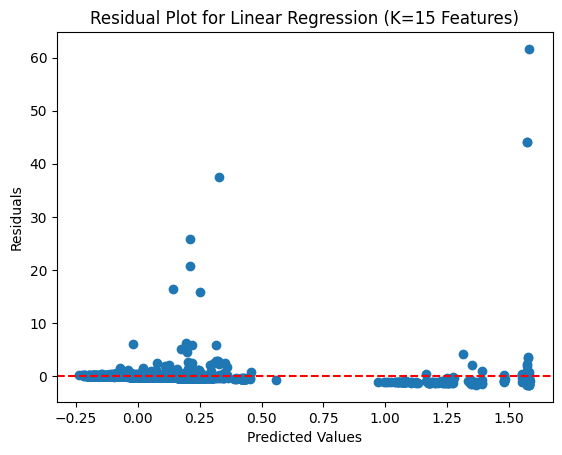

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Select all numerical columns (except 'AMNT') from the cleaned dataset
X = df_cleaned.drop(columns=['AMNT'])  # Exclude 'AMNT' from the features
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest
k_best_selector = SelectKBest(score_func=f_regression, k=15)  # Selecting top 15 features
X_selected = k_best_selector.fit_transform(X, y)  # Fit and transform the data

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features:", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)

# Calculate residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)  # Mean of residuals

# Step 7: Print results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean of Residuals:", mean_residuals)

# Step 8: Plot the residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Linear Regression (K=15 Features)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In this residual plot, we can see that most of the residuals are scattered close to zero, which is a good sign, suggesting that the model is making fairly accurate predictions for many data points. However, there are some residuals that are much larger, especially around the predicted values between 0 and 0.25, and a few extreme points above 50 on the residual axis. These indicate instances where the model made inaccurate predictions, significantly underestimating the actual values, which can possibly indicate that the model doesn't fully capture some aspects of the data.

#####Contextualization

The MSE value of 1.008 signifies the average squared difference between predicted and actual values, which can be interpreted as the "money we are losing" due to inaccuracies in predictions. A higher MSE indicates that the model's predictions deviate significantly from the actual campaign spending, which can lead to misallocated resources.

 The RMSE of 1.004 reflects the average magnitude of errors in the predictions, providing a more interpretable metric. Both values are relatively high, suggesting that the model's predictive accuracy is poor.

 The mean of the residuals at 0.0009 is a positive sign. This means the model is not consistently overpredicting or underpredicting spending. For sponsors and candidates, this could indicate that while the model may not be accurate, it isn’t favoring one side of the predictions over the other, which could lead to more stable budgeting if future improvements are made.

The R² value of 0.0402 suggests that only about 4.02% of the variability in the target variable (AMNT) is explained by the model. This low value indicates that the model is not capturing the essential drivers of campaign spending effectively. For both candidates and sponsors, this suggests that critical factors influencing spending are likely missing from the model, leading to poor strategic decisions based on its predictions



##Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables if necessary
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Decision Tree Regressor model
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = tree_regressor.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 6: Print the evaluation metrics
print("Decision Tree Model")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Decision Tree Model
Mean Squared Error (MSE): 1.2086603748938776
Root Mean Squared Error (RMSE): 1.0993909108655926
R-squared (R²): -0.15020024996967885
Mean of Residuals: -0.004582252665897695


The MSE value of 1.2086 indicates the average of the squares of the errors (the difference between the predicted and actual values). A lower MSE indicates a better fit, but this value is higher compared to the KBest models (both around 1.0085), suggesting that the Decision Tree is not performing as well in terms of error.


Similar to MSE, a higher RMSE indicates poorer performance. The RMSE here is significantly higher than the KBest models, indicating that the Decision Tree has less accuracy in its predictions.


An R² value of -0.1502 is particularly concerning. An R² value less than 0 reveals that the model is performing worse than a horizontal line, indicating that the model does not capture the underlying trend of the data at all.


The mean of residuals at -0.0045 indicates that the predictions are slightly biased towards underestimating the actual values. While this value is close to zero, it does not offset the negative implications of the R² and other error metrics.


###Kbest

####Kbest for 5 Features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_cleaned is your DataFrame and it's already defined

# Step 1: Drop columns with any NaN values
df_cleaned = df_cleaned.dropna(axis=1)

# Step 2: Define features and target variable
X = df_cleaned.drop(columns=['AMNT'])  # Drop target variable from features
y = df_cleaned['AMNT']  # Target variable

# Step 3: Apply KBest feature selection
kbest = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features
X_kbest = kbest.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[kbest.get_support(indices=True)].tolist()
print("Selected Features:", selected_features)

# Step 4: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Step 7: Evaluate the model with additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 8: Print the evaluation metrics
print("Decision Tree Model with KBest Features")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features: ['OFFICECD', 'CANCLASS', 'ORG_IND', 'State_Group', 'PURPOSECD_Group']
Decision Tree Model with KBest Features
Mean Squared Error (MSE): 0.9567848100535414
Root Mean Squared Error (RMSE): 0.9781537762813889
R-squared (R2): 0.08949267259018034
Mean of Residuals: 0.001971142957167477


####Kbest for 11 Features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_cleaned is your DataFrame and it's already defined

# Step 1: Drop columns with any NaN values
df_cleaned = df_cleaned.dropna(axis=1)

# Step 2: Define features and target variable
X = df_cleaned.drop(columns=['AMNT'])  # Drop target variable from features
y = df_cleaned['AMNT']  # Target variable

# Step 3: Apply KBest feature selection
kbest = SelectKBest(score_func=f_regression, k=11)  # Select top 11 features
X_kbest = kbest.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[kbest.get_support(indices=True)].tolist()
print("Selected Features:", selected_features)

# Step 4: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Step 7: Evaluate the model with additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 8: Print the evaluation metrics
print("Decision Tree Model with KBest Features")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features: ['OFFICECD', 'CANCLASS', 'FILING', 'ORG_IND', 'Longitude', 'Community Board', 'Community Council', 'EXEMPTCD', 'State_Group', 'C_CODE_Group', 'PURPOSECD_Group']
Decision Tree Model with KBest Features
Mean Squared Error (MSE): 1.2079268069056095
Root Mean Squared Error (RMSE): 1.0990572355003216
R-squared (R2): -0.14950216297932006
Mean of Residuals: -0.003618115452425088


####Kbest for 15 Features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_cleaned is your DataFrame and it's already defined

# Step 1: Drop columns with any NaN values
df_cleaned = df_cleaned.dropna(axis=1)

# Step 2: Define features and target variable
X = df_cleaned.drop(columns=['AMNT'])  # Drop target variable from features
y = df_cleaned['AMNT']  # Target variable

# Step 3: Apply KBest feature selection
kbest = SelectKBest(score_func=f_regression, k=15)  # Select top 15 features
X_kbest = kbest.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[kbest.get_support(indices=True)].tolist()
print("Selected Features:", selected_features)

# Step 4: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Step 7: Evaluate the model with additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 8: Print the evaluation metrics
print("Decision Tree Model with KBest Features")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features: ['OFFICECD', 'CANCLASS', 'FILING', 'SCHEDULE', 'ORG_IND', 'Latitude', 'Longitude', 'Community Board', 'Community Council', 'Census Tract', 'Borough', 'EXEMPTCD', 'State_Group', 'C_CODE_Group', 'PURPOSECD_Group']
Decision Tree Model with KBest Features
Mean Squared Error (MSE): 1.2086603748938776
Root Mean Squared Error (RMSE): 1.0993909108655926
R-squared (R2): -0.15020024996967885
Mean of Residuals: -0.004582252665897695


The performance metrics show that increasing the number of features selected (from 5 to 15) generally resulted in higher MSE and RMSE values, indicating that the model performed worse with more features in this case.

So our best model is with K=5, even though the model with gave us an R² of 0.089 which suggests that the model does not explain much of the variance in the target variable. Regarding the MSE and RMSE, we have a 0.956 and 0.977 respectively, meaning that the model doesn't do well when it comes to predicting accuracy. Lastly, the Mean of residuals is 0.002, which indicates that the model is not overpredicting or underpredicting.

The R² values for the models with 11 and 15 features are negative, suggesting that these models fit the data worse than a horizontal line (mean of the target variable). This indicates overfitting or irrelevant features.

The first model with only 5 features performed the best, suggesting that those features may have the most predictive power regarding the target variable (AMNT).

###LASSO

####Alpha = 0.1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_cleaned is your DataFrame and it's already defined

# Step 1: Drop columns with any NaN values
df_cleaned = df_cleaned.dropna(axis=1)

# Step 2: Define features and target variable
X = df_cleaned.drop(columns=['AMNT'])  # Drop target variable from features
y = df_cleaned['AMNT']  # Target variable

# Step 3: Apply Lasso regression for feature selection
lasso = Lasso(alpha=0.1)  # You may need to tune the alpha value
lasso.fit(X, y)

# Get the coefficients and select features with non-zero coefficients
lasso_selected_features = X.columns[(lasso.coef_ != 0)].tolist()
print("Lasso Selected Features:", lasso_selected_features)

# Step 4: Prepare the data with selected features
X_lasso = X[lasso_selected_features]

# Step 5: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_lasso, y, test_size=0.2, random_state=42)

# Step 6: Initialize and train the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Step 8: Evaluate the model with additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 9: Print evaluation metrics
print("Decision Tree Model with Lasso Selected Features")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Lasso Selected Features: ['State_Group']
Decision Tree Model with Lasso Selected Features
Mean Squared Error (MSE): 1.0190428854377906
Root Mean Squared Error (RMSE): 1.0094765403107646
R-squared (R²): 0.030245877247955355
Mean of Residuals: -0.00015552542934443075


####Alpha = 0.05

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_cleaned is your DataFrame and it's already defined

# Step 1: Drop columns with any NaN values
df_cleaned = df_cleaned.dropna(axis=1)

# Step 2: Define features and target variable
X = df_cleaned.drop(columns=['AMNT'])  # Drop target variable from features
y = df_cleaned['AMNT']  # Target variable

# Step 3: Apply Lasso regression for feature selection
lasso = Lasso(alpha=0.05)  # You may need to tune the alpha value
lasso.fit(X, y)

# Get the coefficients and select features with non-zero coefficients
lasso_selected_features = X.columns[(lasso.coef_ != 0)].tolist()
print("Lasso Selected Features:", lasso_selected_features)

# Step 4: Prepare the data with selected features
X_lasso = X[lasso_selected_features]

# Step 5: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_lasso, y, test_size=0.2, random_state=42)

# Step 6: Initialize and train the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Step 8: Evaluate the model with additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 9: Print evaluation metrics
print("Decision Tree Model with Lasso Selected Features")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Lasso Selected Features: ['CANCLASS', 'State_Group', 'PURPOSECD_Group']
Decision Tree Model with Lasso Selected Features
Mean Squared Error (MSE): 0.9684582797186826
Root Mean Squared Error (RMSE): 0.9841027790422515
R-squared (R²): 0.07838382182799852
Mean of Residuals: 0.0002875257629576995


####Alpha = 0.01

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_cleaned is your DataFrame and it's already defined

# Step 1: Drop columns with any NaN values
df_cleaned = df_cleaned.dropna(axis=1)

# Step 2: Define features and target variable
X = df_cleaned.drop(columns=['AMNT'])  # Drop target variable from features
y = df_cleaned['AMNT']  # Target variable

# Step 3: Apply Lasso regression for feature selection
lasso = Lasso(alpha=0.01)  # You may need to tune the alpha value
lasso.fit(X, y)

# Get the coefficients and select features with non-zero coefficients
lasso_selected_features = X.columns[(lasso.coef_ != 0)].tolist()
print("Lasso Selected Features:", lasso_selected_features)

# Step 4: Prepare the data with selected features
X_lasso = X[lasso_selected_features]

# Step 5: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_lasso, y, test_size=0.2, random_state=42)

# Step 6: Initialize and train the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Step 8: Evaluate the model with additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 9: Print evaluation metrics
print("Decision Tree Model with Lasso Selected Features")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Lasso Selected Features: ['OFFICECD', 'CANCLASS', 'FILING', 'ORG_IND', 'State_Group', 'C_CODE_Group', 'PURPOSECD_Group']
Decision Tree Model with Lasso Selected Features
Mean Squared Error (MSE): 1.0293321053362015
Root Mean Squared Error (RMSE): 1.0145600550663334
R-squared (R²): 0.020454323272187436
Mean of Residuals: 0.0008814470106821594


The R² values are quite low, suggesting that the model does not explain much of the variance in the target variable. This indicates that there may be other important variables not captured by the features selected, or that the relationship is not linear.


RMSE values ranged from approximately 0.984 to 1.014, indicating how well the model is performing.


The mean of residuals should ideally be close to 0, indicating that there is no systematic bias in the predictions. The mean residuals in this model were very close to 0, which is good.


But when it comes to choosing the best model for LASSO, our best model was when we used alpha = 0.05 as it gave us the closest value of R² (0.078) to 1 and the lowest value for RMSE (0.984) and MSE (0.968). However, the model does well when it comes to the residuals, as it is not overpredicting or underpredicting.

###Decision Trees

####DT for 5 features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)
y = df_cleaned['AMNT']

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select top 5 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_5_features = feature_importance_df['Feature'].head(5)
print("Top 5 selected features:\n", top_5_features)

# Step 5: Train Decision Tree Regressor using the top 5 features
X_train_selected = X_train[top_5_features]
X_test_selected = X_test[top_5_features]

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train_selected, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = tree_regressor.predict(X_test_selected)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 7: Print evaluation metrics
print("\nDecision Tree Model after Feature Selection")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Top 5 selected features:
 5            Latitude
2              FILING
14    PURPOSECD_Group
12        State_Group
1            CANCLASS
Name: Feature, dtype: object

Decision Tree Model after Feature Selection
Mean Squared Error (MSE): 1.2227638457736694
Root Mean Squared Error (RMSE): 1.1057865281208978
R-squared (R²): -0.16362156837171637
Mean of Residuals: -0.00366002660835434


####DT for 8 features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)
y = df_cleaned['AMNT']

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select top 8 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_8_features = feature_importance_df['Feature'].head(8)
print("Top 8 selected features:\n", top_8_features)

# Step 5: Train Decision Tree Regressor using the top 8 features
X_train_selected = X_train[top_8_features]
X_test_selected = X_test[top_8_features]

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train_selected, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = tree_regressor.predict(X_test_selected)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 7: Print evaluation metrics
print("\nDecision Tree Model after Feature Selection")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Top 8 selected features:
 5            Latitude
2              FILING
14    PURPOSECD_Group
12        State_Group
1            CANCLASS
6           Longitude
0            OFFICECD
9        Census Tract
Name: Feature, dtype: object

Decision Tree Model after Feature Selection
Mean Squared Error (MSE): 1.2111268537989162
Root Mean Squared Error (RMSE): 1.100512087075338
R-squared (R²): -0.15254743095786139
Mean of Residuals: -0.004976498109581025


####DT for 10 features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)
y = df_cleaned['AMNT']

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select top 10 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_10_features = feature_importance_df['Feature'].head(10)
print("Top 10 selected features:\n", top_10_features)

# Step 5: Train Decision Tree Regressor using the top 10 features
X_train_selected = X_train[top_10_features]
X_test_selected = X_test[top_10_features]

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train_selected, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = tree_regressor.predict(X_test_selected)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 7: Print evaluation metrics
print("\nDecision Tree Model after Feature Selection")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Top 10 selected features:
 5              Latitude
2                FILING
14      PURPOSECD_Group
12          State_Group
1              CANCLASS
6             Longitude
0              OFFICECD
9          Census Tract
8     Community Council
13         C_CODE_Group
Name: Feature, dtype: object

Decision Tree Model after Feature Selection
Mean Squared Error (MSE): 1.208067854344566
Root Mean Squared Error (RMSE): 1.0991214010947863
R-squared (R²): -0.14963638827777048
Mean of Residuals: -0.003928065226020759


####DT for 14 features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)
y = df_cleaned['AMNT']

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select top 14 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_14_features = feature_importance_df['Feature'].head(14)
print("Top 14 selected features:\n", top_14_features)

# Step 5: Train Decision Tree Regressor using the top 14 features
X_train_selected = X_train[top_14_features]
X_test_selected = X_test[top_14_features]

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train_selected, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = tree_regressor.predict(X_test_selected)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 7: Print evaluation metrics
print("\nDecision Tree Model after Feature Selection")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)


Top 14 selected features:
 5              Latitude
2                FILING
14      PURPOSECD_Group
12          State_Group
1              CANCLASS
6             Longitude
0              OFFICECD
9          Census Tract
8     Community Council
13         C_CODE_Group
7       Community Board
3              SCHEDULE
4               ORG_IND
10              Borough
Name: Feature, dtype: object

Decision Tree Model after Feature Selection
Mean Squared Error (MSE): 1.2169457919173614
Root Mean Squared Error (RMSE): 1.1031526602956463
R-squared (R²): -0.15808492041099376
Mean of Residuals: -0.005442069320066361


####DT for 15 features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)
y = df_cleaned['AMNT']

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select top 15 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_15_features = feature_importance_df['Feature'].head(15)
print("Top 15 selected features:\n", top_15_features)

# Step 5: Train Decision Tree Regressor using the top 15 features
X_train_selected = X_train[top_15_features]
X_test_selected = X_test[top_15_features]

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train_selected, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = tree_regressor.predict(X_test_selected)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 7: Print evaluation metrics
print("\nDecision Tree Model after Feature Selection")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Top 15 selected features:
 5              Latitude
2                FILING
14      PURPOSECD_Group
12          State_Group
1              CANCLASS
6             Longitude
0              OFFICECD
9          Census Tract
8     Community Council
13         C_CODE_Group
7       Community Board
3              SCHEDULE
4               ORG_IND
10              Borough
11             EXEMPTCD
Name: Feature, dtype: object

Decision Tree Model after Feature Selection
Mean Squared Error (MSE): 1.2088661631112607
Root Mean Squared Error (RMSE): 1.0994844988044445
R-squared (R²): -0.150396084683873
Mean of Residuals: -0.00433306996433762


For Decision Trees, our best model was when we selected the top 8 features, as it gave us the closest value of R² to 1 and the lowest value for RMSE and MSE.


However, the model is still not performing well as we have a 1.211 for the MSE and a 1.100 for the RMSE, meaning that the model doesn't do well at all, when it comes to predicting accuracy as the values are too high. Regarding the R², we have a value of -0.152, which suggests that the model is not capturing the variability in the target variable 'AMNT'. However, the model does well when it comes to the residuals (-0.004), as it is not overpredicting or underpredicting.


In comparison, the other model get a higher MSE and RMSE and the R² decreases.

###Residual Plot for best model in Decision Trees

Overall, the best method for feature selection when using Decision Trees as a model, was Kbest, specifically when performing k=5, so let's plot the residual plot.

Selected Features: ['OFFICECD', 'CANCLASS', 'ORG_IND', 'State_Group', 'PURPOSECD_Group']
Decision Tree Model with KBest Features
Mean Squared Error (MSE): 0.9567848100535414
Root Mean Squared Error (RMSE): 0.9781537762813889
R-squared (R2): 0.08949267259018034
Mean of Residuals: 0.001971142957167477


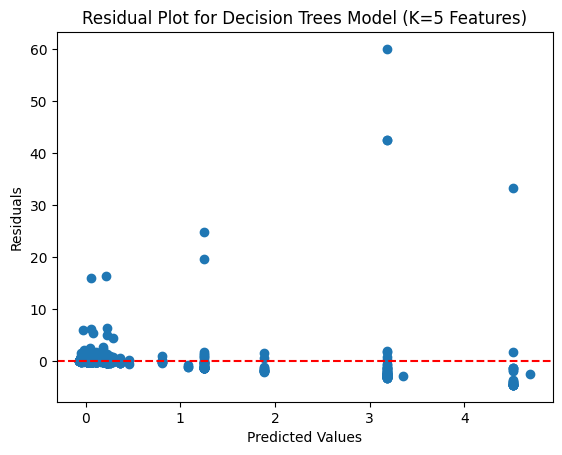

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_cleaned is your DataFrame and it's already defined

# Step 1: Drop columns with any NaN values
df_cleaned = df_cleaned.dropna(axis=1)

# Step 2: Define features and target variable
X = df_cleaned.drop(columns=['AMNT'])  # Drop target variable from features
y = df_cleaned['AMNT']  # Target variable

# Step 3: Apply KBest feature selection
kbest = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features
X_kbest = kbest.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[kbest.get_support(indices=True)].tolist()
print("Selected Features:", selected_features)

# Step 4: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Step 7: Evaluate the model with additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 8: Print the evaluation metrics
print("Decision Tree Model with KBest Features")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean of Residuals:", mean_residuals)

# Step 9: Plot the residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Decision Trees Model (K=5 Features)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In this residual plot, most of the residuals are concentrated close to zero, indicating that the Decision Tree model is making reasonably accurate predictions for many data points, suggesting that the model is correctly capturing the relationships in the data for a large portion of the test set. However, there are several residuals that stand out, especially around the predicted values between 0 and 1, where some residuals reach as high as 20 or more. These outliers show that for these specific instances, the model is significantly underestimating the actual values. Additionally, a few extreme points above 50 on the residual axis highlight cases where the model struggles to make accurate predictions, likely missing some important patterns. This suggests that while the model performs well on average, there are areas where we can handle these outlier cases more effectively.

####Contextualization

The features giving by the best model are important in understanding the factors influencing campaign spending (AMNT). By focusing on these predictive variables, the model helps candidates and sponsors optimize their budget allocations effectively.

The MSE value of 0.9568 represents the average squared difference between the predicted and actual campaign spending. This figure can be interpreted as the potential "money lost" due to inaccuracies in the model's predictions. A lower MSE indicates better predictive performance; thus, this value suggests that while there is some error, the model's predictions are relatively closer to actual spending compared to previous models with higher MSE values. Misallocation of resources is less likely, but it remains a concern.

The RMSE of 0.9782 reflects the average magnitude of errors in the predictions. As with MSE, a lower RMSE value indicates improved performance, meaning the model provides a reasonably accurate estimate of campaign spending. For candidates, this can translate into more reliable budgeting, while sponsors can have greater confidence in the forecasted resource needs.

The mean of the residuals at 0.0020 is a positive indication, suggesting that the model does not consistently overpredict or underpredict spending. This is beneficial for both candidates and sponsors, as it implies a balanced approach in the model's outputs. It allows candidates to plan their budgets without favoring overspending or underspending, which enhances stability in their campaign strategies.

The R² value of 0.0895 indicates that approximately 8.95% of the variability in the target variable (AMNT) is explained by the model. While this value is low, it suggests that the selected features contribute to some understanding of the spending patterns. However, it also highlights that a significant portion of the variability remains unexplained, indicating that important factors may still be missing from the model. For candidates and sponsors, this suggests that further refinement and exploration of additional features are necessary to capture more of the spending dynamics effectively.

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # One-hot encode categorical features
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)  # Use 100 trees
rf_regressor.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 6: Print evaluation metrics
print("Random Forest Model")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Random Forest Model
Mean Squared Error (MSE): 1.1547994858338337
Root Mean Squared Error (RMSE): 1.0746159713282852
R-squared (R²): -0.09894448834525171
Mean of Residuals: -0.005419068903662318


For the Random Forest model we can analyze that based on the metrics, it isn't a good model. Regarding the MSE we have a 1.15 and a 1.07 for the RMSE, meaning that the model doesn't does well predicting accuracy. Likewise, it happens with the R² as it has a negative value of -0.09, meaning that the model is performing awfully, as it is not capturing the variability in the target variable 'AMNT'. In regard to the mean of residuals, we have a -0.005, meaning that the model's predictions are, on average, it does not overestimate or underestimate the target variable.

###Kbest

####Kbest for 5 Features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest (k=5)
k_best_selector = SelectKBest(score_func=f_regression, k=5)  # Use f_regression as the scoring function for regression
X_selected = k_best_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest:\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 7: Print evaluation metrics
print("\nRandom Forest Model after KBest Feature Selection (Top 5)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features using KBest:
 Index(['OFFICECD', 'CANCLASS', 'ORG_IND', 'State_Group', 'PURPOSECD_Group'], dtype='object')

Random Forest Model after KBest Feature Selection (Top 5)
Mean Squared Error (MSE): 0.9561200720293213
Root Mean Squared Error (RMSE): 0.9778139250539037
R-squared (R²): 0.09012525876368627
Mean of Residuals: 0.0024976887208014186


####Kbest for 8 Features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest (k=8)
k_best_selector = SelectKBest(score_func=f_regression, k=8)  # Use f_regression as the scoring function for regression
X_selected = k_best_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest:\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 7: Print evaluation metrics
print("\nRandom Forest Model after KBest Feature Selection (Top 8)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features using KBest:
 Index(['OFFICECD', 'CANCLASS', 'ORG_IND', 'Community Board',
       'Community Council', 'State_Group', 'C_CODE_Group', 'PURPOSECD_Group'],
      dtype='object')

Random Forest Model after KBest Feature Selection (Top 8)
Mean Squared Error (MSE): 0.9808589713953441
Root Mean Squared Error (RMSE): 0.9903832447064843
R-squared (R²): 0.06658292311189284
Mean of Residuals: -0.005328198277215057


####Kbest for 10 Features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest (k=10)
k_best_selector = SelectKBest(score_func=f_regression, k=10)  # Use f_regression as the scoring function for regression
X_selected = k_best_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest:\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 7: Print evaluation metrics
print("\nRandom Forest Model after KBest Feature Selection (Top 10)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features using KBest:
 Index(['OFFICECD', 'CANCLASS', 'FILING', 'ORG_IND', 'Longitude',
       'Community Board', 'Community Council', 'State_Group', 'C_CODE_Group',
       'PURPOSECD_Group'],
      dtype='object')

Random Forest Model after KBest Feature Selection (Top 10)
Mean Squared Error (MSE): 1.1472573519323694
Root Mean Squared Error (RMSE): 1.0711009998746008
R-squared (R²): -0.09176715012935222
Mean of Residuals: -0.004290950429119486


####Kbest for 14 Features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest (k=14)
k_best_selector = SelectKBest(score_func=f_regression, k=14)  # Use f_regression as the scoring function for regression
X_selected = k_best_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest:\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 7: Print evaluation metrics
print("\nRandom Forest Model after KBest Feature Selection (Top 14)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features using KBest:
 Index(['OFFICECD', 'CANCLASS', 'FILING', 'SCHEDULE', 'ORG_IND', 'Latitude',
       'Longitude', 'Community Board', 'Community Council', 'Census Tract',
       'EXEMPTCD', 'State_Group', 'C_CODE_Group', 'PURPOSECD_Group'],
      dtype='object')

Random Forest Model after KBest Feature Selection (Top 14)
Mean Squared Error (MSE): 1.1539949432418055
Root Mean Squared Error (RMSE): 1.074241566521146
R-squared (R²): -0.09817885962962225
Mean of Residuals: -0.00531063701063604


####Kbest for 15 Features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest (k=15)
k_best_selector = SelectKBest(score_func=f_regression, k=15)  # Use f_regression as the scoring function for regression
X_selected = k_best_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest:\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 7: Print evaluation metrics
print("\nRandom Forest Model after KBest Feature Selection (Top 15)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features using KBest:
 Index(['OFFICECD', 'CANCLASS', 'FILING', 'SCHEDULE', 'ORG_IND', 'Latitude',
       'Longitude', 'Community Board', 'Community Council', 'Census Tract',
       'Borough', 'EXEMPTCD', 'State_Group', 'C_CODE_Group',
       'PURPOSECD_Group'],
      dtype='object')

Random Forest Model after KBest Feature Selection (Top 15)
Mean Squared Error (MSE): 1.1547994858338337
Root Mean Squared Error (RMSE): 1.0746159713282852
R-squared (R²): -0.09894448834525171
Mean of Residuals: -0.005419068903662318


When performing Kbest Feature Selection for the model, when using a lower number of features, the model is usually better, but it is still an untrustworthy model.


This is due to the fact that our best model was with K=5 where we have an R² of 0.090 which suggests that the model does not explain much of the variance in the target variable. Regarding the MSE and RMSE, we have a 0.956 and 0.977 respectively, meaning that the model doesn't do well when it comes to predicting accuracy. Lastly, the Mean of residuals is 0.002, which indicates that the model is not overpredicting or underpredicting. Even though, the model did not perform well, it was the best model of all the kbest performed, since at the moment we increased the number of features the metrics get worse, making k=15 the worst model.

The features for our best model, K=5 are: OFFICECD', 'CANCLASS', 'ORG_IND', 'State_Group', 'PURPOSECD_Group'

###LASSO

####Alpha = 0.1

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Lasso model with alpha=0.1 for feature selection
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Step 4: Get the coefficients of the Lasso model and filter out the non-zero features
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features using Lasso (alpha=0.1):\n", selected_features)

# Step 5: Train a new model using only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Step 6: Train a Random Forest model on the selected features
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train_selected, y_train)

# Step 7: Make predictions and evaluate the model
y_pred = rf_regressor.predict(X_test_selected)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 9: Print evaluation metrics
print("\nRandom Forest Model after Lasso Feature Selection")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features using Lasso (alpha=0.1):
 Index(['State_Group'], dtype='object')

Random Forest Model after Lasso Feature Selection
Mean Squared Error (MSE): 1.019049663512168
Root Mean Squared Error (RMSE): 1.0094798975275179
R-squared (R²): 0.030239427013460163
Mean of Residuals: 0.00020097771670944342


####Alpha = 0.05

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Lasso model with alpha=0.05 for feature selection
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

# Step 4: Get the coefficients of the Lasso model and filter out the non-zero features
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features using Lasso (alpha=0.05):\n", selected_features)

# Step 5: Train a new model using only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Step 6: Train a Random Forest model on the selected features
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train_selected, y_train)

# Step 7: Make predictions and evaluate the model
y_pred = rf_regressor.predict(X_test_selected)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 9: Print evaluation metrics
print("\nRandom Forest Model after Lasso Feature Selection")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features using Lasso (alpha=0.05):
 Index(['CANCLASS', 'State_Group', 'PURPOSECD_Group'], dtype='object')

Random Forest Model after Lasso Feature Selection
Mean Squared Error (MSE): 0.9682380931543596
Root Mean Squared Error (RMSE): 0.9839909009509994
R-squared (R²): 0.07859335847417714
Mean of Residuals: 0.0008132270872558553


####Alpha = 0.01

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Lasso model with alpha=0.01 for feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Step 4: Get the coefficients of the Lasso model and filter out the non-zero features
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features using Lasso (alpha=0.01):\n", selected_features)

# Step 5: Train a new model using only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Step 6: Train a Random Forest model on the selected features
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train_selected, y_train)

# Step 7: Make predictions and evaluate the model
y_pred = rf_regressor.predict(X_test_selected)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 9: Print evaluation metrics
print("\nRandom Forest Model after Lasso Feature Selection")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features using Lasso (alpha=0.01):
 Index(['OFFICECD', 'CANCLASS', 'FILING', 'ORG_IND', 'State_Group',
       'C_CODE_Group', 'PURPOSECD_Group'],
      dtype='object')

Random Forest Model after Lasso Feature Selection
Mean Squared Error (MSE): 1.0159185892735771
Root Mean Squared Error (RMSE): 1.0079278690826925
R-squared (R²): 0.033219058386100286
Mean of Residuals: 0.0019834358479386464


For LASSO, our best model was when we used alpha = 0.05 as it gave us the closest value of R² to 1 and the lowest value for RMSE and MSE.

However, the model is still not performing well as we have a 0.968 for the MSE and a 0.983 for the RMSE, meaning that the model doesn't do well when it comes to predicting accuracy as the values are still too high. Regarding the R², we have a value of 0.078, which suggests that the model does not explain much of the variance in the target variable. However, the model does well when it comes to the residuals, as it is not overpredicting or underpredicting.


In comparison to the other models, the metrics that we got for alpha = 0.1 and alpha = 0.01 are practically the same metrics where the MSE and RMSE increased meanwhile the R² decreased, the mean of residuals was not a significant metric as the model performs average in most of the models.


This being so the selected features for alpha 0.05 or when we have a regularization of 5% are: 'CANCLASS', 'State_Group', 'PURPOSECD_Group'

###Decision Trees

####DT for 5 Features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select the top 5 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_5_features = feature_importance_df['Feature'].head(5)
print("Top 5 selected features using Decision Tree:\n", top_5_features)

# Step 5: Use the top 5 features to train a Random Forest model
X_train_selected = X_train[top_5_features]
X_test_selected = X_test[top_5_features]

rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train_selected, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = rf_regressor.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 8: Print evaluation metrics
print("\nRandom Forest Model after Decision Tree Feature Selection (Top 5)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Top 5 selected features using Decision Tree:
 5            Latitude
2              FILING
14    PURPOSECD_Group
12        State_Group
1            CANCLASS
Name: Feature, dtype: object

Random Forest Model after Decision Tree Feature Selection (Top 5)
Mean Squared Error (MSE): 1.175419944660063
Root Mean Squared Error (RMSE): 1.0841678581566891
R-squared (R²): -0.11856758296229897
Mean of Residuals: -0.0032449541990208788


####DT for 8 Features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select the top 8 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_8_features = feature_importance_df['Feature'].head(8)
print("Top 8 selected features using Decision Tree:\n", top_8_features)

# Step 5: Use the top 8 features to train a Random Forest model
X_train_selected = X_train[top_8_features]
X_test_selected = X_test[top_8_features]

rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train_selected, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = rf_regressor.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 8: Print evaluation metrics
print("\nRandom Forest Model after Decision Tree Feature Selection (Top 8)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Top 8 selected features using Decision Tree:
 5            Latitude
2              FILING
14    PURPOSECD_Group
12        State_Group
1            CANCLASS
6           Longitude
0            OFFICECD
9        Census Tract
Name: Feature, dtype: object

Random Forest Model after Decision Tree Feature Selection (Top 8)
Mean Squared Error (MSE): 1.1519655992785554
Root Mean Squared Error (RMSE): 1.0732966035903382
R-squared (R²): -0.09624767037059678
Mean of Residuals: -0.004905869156710563


####DT for 10 Features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select the top 10 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_10_features = feature_importance_df['Feature'].head(10)
print("Top 10 selected features using Decision Tree:\n", top_10_features)

# Step 5: Use the top 10 features to train a Random Forest model
X_train_selected = X_train[top_10_features]
X_test_selected = X_test[top_10_features]

rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train_selected, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = rf_regressor.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 8: Print evaluation metrics
print("\nRandom Forest Model after Decision Tree Feature Selection (Top 10)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Top 10 selected features using Decision Tree:
 5              Latitude
2                FILING
14      PURPOSECD_Group
12          State_Group
1              CANCLASS
6             Longitude
0              OFFICECD
9          Census Tract
8     Community Council
13         C_CODE_Group
Name: Feature, dtype: object

Random Forest Model after Decision Tree Feature Selection (Top 10)
Mean Squared Error (MSE): 1.152391259832079
Root Mean Squared Error (RMSE): 1.0734948811392064
R-squared (R²): -0.09665274270128177
Mean of Residuals: -0.004732305615168386


####DT for 14 Features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select the top 14 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_14_features = feature_importance_df['Feature'].head(14)
print("Top 14 selected features using Decision Tree:\n", top_14_features)

# Step 5: Use the top 14 features to train a Random Forest model
X_train_selected = X_train[top_14_features]
X_test_selected = X_test[top_14_features]

rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train_selected, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = rf_regressor.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 8: Print evaluation metrics
print("\nRandom Forest Model after Decision Tree Feature Selection (Top 14)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Top 14 selected features using Decision Tree:
 5              Latitude
2                FILING
14      PURPOSECD_Group
12          State_Group
1              CANCLASS
6             Longitude
0              OFFICECD
9          Census Tract
8     Community Council
13         C_CODE_Group
7       Community Board
3              SCHEDULE
4               ORG_IND
10              Borough
Name: Feature, dtype: object

Random Forest Model after Decision Tree Feature Selection (Top 14)
Mean Squared Error (MSE): 1.1540079919082034
Root Mean Squared Error (RMSE): 1.0742476399360639
R-squared (R²): -0.09819127716201126
Mean of Residuals: -0.005364329498761271


####DT for 15 Features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select the top 15 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_15_features = feature_importance_df['Feature'].head(15)
print("Top 15 selected features using Decision Tree:\n", top_15_features)

# Step 5: Use the top 15 features to train a Random Forest model
X_train_selected = X_train[top_15_features]
X_test_selected = X_test[top_15_features]

rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train_selected, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = rf_regressor.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 8: Print evaluation metrics
print("\nRandom Forest Model after Decision Tree Feature Selection (Top 15)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Top 15 selected features using Decision Tree:
 5              Latitude
2                FILING
14      PURPOSECD_Group
12          State_Group
1              CANCLASS
6             Longitude
0              OFFICECD
9          Census Tract
8     Community Council
13         C_CODE_Group
7       Community Board
3              SCHEDULE
4               ORG_IND
10              Borough
11             EXEMPTCD
Name: Feature, dtype: object

Random Forest Model after Decision Tree Feature Selection (Top 15)
Mean Squared Error (MSE): 1.154685050637979
Root Mean Squared Error (RMSE): 1.0745627253157346
R-squared (R²): -0.098835588116857
Mean of Residuals: -0.0054117301335694845


For Decision Trees, our best model was when we selected the top 8 features, as it gave us the closest value of R² to 1 and the lowest value for RMSE and MSE.


However, the model is still not performing well as we have a 1.151 for the MSE and a 1.073 for the RMSE, meaning that the model doesn't do well at all, when it comes to predicting accuracy as the values are too high. Regarding the R², we have a value of -0.096, which suggests that as we have a negative value the model is performing terrible as it is not capturing the variability in the target variable 'AMNT'. However, the model does well when it comes to the residuals with a value of -0.004 as it is not overpredicting or underpredicting.


This being so the selected features for Decision Trees for the top 8 features are: Latitude, FILING, PURPOSECD_Group, State_Group, CANCLASS, Longitude, OFFICECD, and Census Tract


In comparison to the other models, we can see that when adding more than 8 features, the metrics start to get worse, so the MSE and RMSE start to increased and the R² start to get far away from 1. So it happened with the top 5 features.

###Residual Plot for best model in Random Forest

Overall, the best method for feature selection when using Random Forest as a model, was Kbest, specifically when performing k=5, so let's create the residual plot.

Selected Features using KBest:
 Index(['OFFICECD', 'CANCLASS', 'ORG_IND', 'State_Group', 'PURPOSECD_Group'], dtype='object')

Random Forest Model after KBest Feature Selection (Top 5)
Mean Squared Error (MSE): 0.9561200720293213
Root Mean Squared Error (RMSE): 0.9778139250539037
R-squared (R²): 0.09012525876368627
Mean of Residuals: 0.0024976887208014186


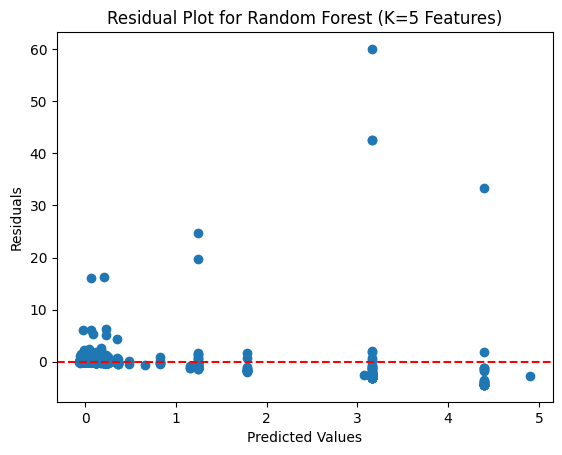

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest (k=5)
k_best_selector = SelectKBest(score_func=f_regression, k=5)  # Use f_regression as the scoring function for regression
X_selected = k_best_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest:\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 7: Print evaluation metrics
print("\nRandom Forest Model after KBest Feature Selection (Top 5)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

# Step 8: Plot the residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Random Forest (K=5 Features)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In this residual plot for the Random Forest model with K=5 features, most residuals are clustered close to zero, indicating the model performs well for many predictions. However, there are a few larger residuals, especially for predicted values near zero, where the model underestimates actual values. The extreme residuals above 50 suggest the model struggles with certain cases, indicating room for improvement in capturing variability for these instances.

####Contextualization

The MSE value of 0.9561 signifies the average squared difference between predicted and actual campaign spending. This metric can be viewed as the potential "money lost" due to inaccuracies in the model's predictions. While this MSE value indicates a relatively low level of prediction error, it still suggests that there is room for improvement. Ensuring greater accuracy in spending predictions can help avoid potential misallocation of resources.

The RMSE of 0.9778 provides insight into the average magnitude of errors in the predictions. It is a more interpretable metric, reflecting the actual error scale in real-world terms. The low RMSE indicates that the model offers reasonably accurate estimates of campaign spending, which is essential for candidates to plan their budgets effectively and for sponsors to understand the financial requirements of campaigns.

The mean of the residuals at 0.0025 suggests that the model does not consistently overpredict or underpredict spending. This is beneficial for both candidates and sponsors, as it indicates a balanced approach in the model's outputs. It allows candidates to make informed financial decisions without skewing towards overspending or underspending, thus enhancing the stability of their budgeting processes.

The R² value of 0.0901 indicates that approximately 9.01% of the variability in the target variable (AMNT) is explained by the model. While this value is marginally better than some previous models, it still highlights a significant portion of variability that remains unexplained. This suggests that critical factors influencing campaign spending may not be fully captured in the model. For candidates and sponsors, this points to the need for further exploration of additional features to improve predictive accuracy and decision-making.

##Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_regressor.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 6: Print evaluation metrics
print("Gradient Boosting Model")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Gradient Boosting Model
Mean Squared Error (MSE): 1.0124023452647948
Root Mean Squared Error (RMSE): 1.0061820636767458
R-squared (R²): 0.036565229752238526
Mean of Residuals: -0.003026969439467146


For the Gradient Boosting model we can analyze that based on the metrics, it isn't a good model. Regarding the MSE, we have a 1.012 and a 1.00 for the RMSE, meaning that the model doesn't do well predicting accuracy. Likewise, it happens with the R² as it has a value of 0.036, is not truly capturing the variability in the target variable 'AMNT'. In regard to the mean of residuals, we have a -0.005, meaning that the model's predictions are, on average, it does not overestimate or underestimate the target variable. However, it is important to know that this model performed better than the Random Forest Model.


###Kbest

####Kbest for 5 Features

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest (k=5)
k_best_selector = SelectKBest(score_func=f_regression, k=5)  # Use f_regression for regression tasks
X_selected = k_best_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest (k=5):\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 7: Print evaluation metrics
print("\nGradient Boosting Model after KBest Feature Selection (k=5)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features using KBest (k=5):
 Index(['OFFICECD', 'CANCLASS', 'ORG_IND', 'State_Group', 'PURPOSECD_Group'], dtype='object')

Gradient Boosting Model after KBest Feature Selection (k=5)
Mean Squared Error (MSE): 0.9560433015553974
Root Mean Squared Error (RMSE): 0.9777746680884085
R-squared (R²): 0.09019831602619921
Mean of Residuals: 0.001636038322471519


####Kbest for 8 Features - best

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest (k=8)
k_best_selector = SelectKBest(score_func=f_regression, k=8)  # Use f_regression for regression tasks
X_selected = k_best_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest (k=8):\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 7: Print evaluation metrics
print("\nGradient Boosting Model after KBest Feature Selection (k=8)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features using KBest (k=8):
 Index(['OFFICECD', 'CANCLASS', 'ORG_IND', 'Community Board',
       'Community Council', 'State_Group', 'C_CODE_Group', 'PURPOSECD_Group'],
      dtype='object')

Gradient Boosting Model after KBest Feature Selection (k=8)
Mean Squared Error (MSE): 0.9504026718701652
Root Mean Squared Error (RMSE): 0.9748859789073618
R-squared (R²): 0.09556612141529375
Mean of Residuals: 0.0010108823739301545


####Kbest for 10 Features

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest (k=10)
k_best_selector = SelectKBest(score_func=f_regression, k=10)  # Use f_regression for regression tasks
X_selected = k_best_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest (k=5):\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 7: Print evaluation metrics
print("\nGradient Boosting Model after KBest Feature Selection (k=10)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features using KBest (k=5):
 Index(['OFFICECD', 'CANCLASS', 'FILING', 'ORG_IND', 'Longitude',
       'Community Board', 'Community Council', 'State_Group', 'C_CODE_Group',
       'PURPOSECD_Group'],
      dtype='object')

Gradient Boosting Model after KBest Feature Selection (k=10)
Mean Squared Error (MSE): 1.000229719628733
Root Mean Squared Error (RMSE): 1.0001148532187356
R-squared (R²): 0.04814909345804985
Mean of Residuals: -0.0021749193050146047


####Kbest for 14 Features

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest (k=14)
k_best_selector = SelectKBest(score_func=f_regression, k=14)  # Use f_regression for regression tasks
X_selected = k_best_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest (k=5):\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 7: Print evaluation metrics
print("\nGradient Boosting Model after KBest Feature Selection (k=14)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features using KBest (k=5):
 Index(['OFFICECD', 'CANCLASS', 'FILING', 'SCHEDULE', 'ORG_IND', 'Latitude',
       'Longitude', 'Community Board', 'Community Council', 'Census Tract',
       'EXEMPTCD', 'State_Group', 'C_CODE_Group', 'PURPOSECD_Group'],
      dtype='object')

Gradient Boosting Model after KBest Feature Selection (k=14)
Mean Squared Error (MSE): 1.0124023452647948
Root Mean Squared Error (RMSE): 1.0061820636767458
R-squared (R²): 0.036565229752238526
Mean of Residuals: -0.0030269694394671532


####Kbest for 15 Features

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest (k=15)
k_best_selector = SelectKBest(score_func=f_regression, k=15)  # Use f_regression for regression tasks
X_selected = k_best_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest (k=5):\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 7: Print evaluation metrics
print("\nGradient Boosting Model after KBest Feature Selection (k=15)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features using KBest (k=5):
 Index(['OFFICECD', 'CANCLASS', 'FILING', 'SCHEDULE', 'ORG_IND', 'Latitude',
       'Longitude', 'Community Board', 'Community Council', 'Census Tract',
       'Borough', 'EXEMPTCD', 'State_Group', 'C_CODE_Group',
       'PURPOSECD_Group'],
      dtype='object')

Gradient Boosting Model after KBest Feature Selection (k=15)
Mean Squared Error (MSE): 1.0124023452647948
Root Mean Squared Error (RMSE): 1.0061820636767458
R-squared (R²): 0.036565229752238526
Mean of Residuals: -0.003026969439467146


When performing Kbest Feature Selection for the model, I was able to realize that when using a lower number of features, the model is usually better, but it is still an untrustworthy model.

This is due to the fact that our best model was with K=8 where we have an R² of 0.095 which suggests that the model does not explain much of the variance in the target variable. Regarding the MSE and RMSE, we have a 0.950 and 0.974 respectively, meaning that the model doesn't do well when it comes to predicting accuracy. Lastly, the Mean of residuals is 0.001, which indicates that the model is not overpredicting or underpredicting. Even though, the model did not perform well, it was the best model of all the kbest performed, making k=15 the worst model.

The features for our best model, K=8 are: 'OFFICECD', 'CANCLASS', 'ORG_IND', 'Community Board', 'Community Council', 'State_Group', 'C_CODE_Group', 'PURPOSECD_Group'

Regarding the other models, the MSE and RMSE increased as we add features and the R² decreases, so it happened with the K=5

###LASSO

####Alpha = 0.1

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Lasso model for feature selection (alpha=0.1)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Step 4: Select features with non-zero coefficients (Lasso shrinks some coefficients to zero)
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features using Lasso (alpha=0.1):\n", selected_features)

# Step 5: Train the Gradient Boosting Regressor using the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

gb_regressor = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_regressor.fit(X_train_selected, y_train)

# Step 6: Make predictions on the test set
y_pred = gb_regressor.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 8: Print evaluation metrics
print("\nGradient Boosting Model after Lasso Feature Selection (alpha=0.1)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features using Lasso (alpha=0.1):
 Index(['State_Group'], dtype='object')

Gradient Boosting Model after Lasso Feature Selection (alpha=0.1)
Mean Squared Error (MSE): 1.0190431312871793
Root Mean Squared Error (RMSE): 1.0094766620814863
R-squared (R²): 0.03024564328973678
Mean of Residuals: -0.00015561489891290938


####Alpha = 0.05

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Lasso model for feature selection (alpha=0.05)
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

# Step 4: Select features with non-zero coefficients (Lasso shrinks some coefficients to zero)
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features using Lasso (alpha=0.05):\n", selected_features)

# Step 5: Train the Gradient Boosting Regressor using the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

gb_regressor = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_regressor.fit(X_train_selected, y_train)

# Step 6: Make predictions on the test set
y_pred = gb_regressor.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 8: Print evaluation metrics
print("\nGradient Boosting Model after Lasso Feature Selection (alpha=0.05)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features using Lasso (alpha=0.05):
 Index(['CANCLASS', 'State_Group', 'PURPOSECD_Group'], dtype='object')

Gradient Boosting Model after Lasso Feature Selection (alpha=0.05)
Mean Squared Error (MSE): 0.9667917853540573
Root Mean Squared Error (RMSE): 0.9832557070030447
R-squared (R²): 0.07996971168968392
Mean of Residuals: 0.0003044705517663384


####Alpha = 0.01

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Lasso model for feature selection (alpha=0.01)
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Step 4: Select features with non-zero coefficients (Lasso shrinks some coefficients to zero)
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features using Lasso (alpha=0.01):\n", selected_features)

# Step 5: Train the Gradient Boosting Regressor using the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

gb_regressor = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_regressor.fit(X_train_selected, y_train)

# Step 6: Make predictions on the test set
y_pred = gb_regressor.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 8: Print evaluation metrics
print("\nGradient Boosting Model after Lasso Feature Selection (alpha=0.01)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)



Selected Features using Lasso (alpha=0.01):
 Index(['OFFICECD', 'CANCLASS', 'FILING', 'ORG_IND', 'State_Group',
       'C_CODE_Group', 'PURPOSECD_Group'],
      dtype='object')

Gradient Boosting Model after Lasso Feature Selection (alpha=0.01)
Mean Squared Error (MSE): 0.9855348377617923
Root Mean Squared Error (RMSE): 0.9927410728693521
R-squared (R²): 0.06213321765680524
Mean of Residuals: 0.0007786415544330177


For LASSO, our best model was when we used alpha = 0.05 as it gave us the closest value of R² to 1 and the lowest value for RMSE and MSE.

However, the model is still not performing well as we have a 0.966 for the MSE and a 0.983 for the RMSE, meaning that the model doesn't do well when it comes to predicting accuracy as the values are still too high. Regarding the R², we have a value of 0.079, which suggests that the model does not explain much of the variance in the target variable. However, the model does well when it comes to the residuals as it is not overpredicting or underpredicting.

This being so the selected features for alpha 0.05 or when we have a regularization of 5% are: 'CANCLASS', 'State_Group', 'PURPOSECD_Group'

In comparison to the other models, the metrics that we got for alpha = 0.1 and alpha = 0.01 the MSE and RMSE increased meanwhile the R² decreased, the mean of residuals was not a significant metric as the model performs average in most of the models.

###Decision Trees

####DT for 5 Features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select the top 5 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_5_features = feature_importance_df['Feature'].head(5)
print("Top 5 selected features using Decision Tree:\n", top_5_features)

# Step 5: Train the Gradient Boosting Regressor using the top 5 features
X_train_selected = X_train[top_5_features]
X_test_selected = X_test[top_5_features]

gb_regressor = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_regressor.fit(X_train_selected, y_train)

# Step 6: Make predictions on the test set
y_pred = gb_regressor.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 8: Print evaluation metrics
print("\nGradient Boosting Model after Decision Tree Feature Selection (Top 5)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Top 5 selected features using Decision Tree:
 5            Latitude
2              FILING
14    PURPOSECD_Group
12        State_Group
1            CANCLASS
Name: Feature, dtype: object

Gradient Boosting Model after Decision Tree Feature Selection (Top 5)
Mean Squared Error (MSE): 1.011671452735076
Root Mean Squared Error (RMSE): 1.005818797167301
R-squared (R²): 0.037260770689830136
Mean of Residuals: -0.003588681094379045


####DT for 8 Features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select the top 8 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_8_features = feature_importance_df['Feature'].head(8)
print("Top 8 selected features using Decision Tree:\n", top_8_features)

# Step 5: Train the Gradient Boosting Regressor using the top 8 features
X_train_selected = X_train[top_8_features]
X_test_selected = X_test[top_8_features]

gb_regressor = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_regressor.fit(X_train_selected, y_train)

# Step 6: Make predictions on the test set
y_pred = gb_regressor.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 8: Print evaluation metrics
print("\nGradient Boosting Model after Decision Tree Feature Selection (Top 8)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)


Top 8 selected features using Decision Tree:
 5            Latitude
2              FILING
14    PURPOSECD_Group
12        State_Group
1            CANCLASS
6           Longitude
0            OFFICECD
9        Census Tract
Name: Feature, dtype: object

Gradient Boosting Model after Decision Tree Feature Selection (Top 8)
Mean Squared Error (MSE): 1.0083504226088427
Root Mean Squared Error (RMSE): 1.004166531312831
R-squared (R²): 0.04042117022033176
Mean of Residuals: -0.002874244008729745


####DT for 10 Features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select the top 10 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_10_features = feature_importance_df['Feature'].head(10)
print("Top 10 selected features using Decision Tree:\n", top_10_features)

# Step 5: Train the Gradient Boosting Regressor using the top 10 features
X_train_selected = X_train[top_10_features]
X_test_selected = X_test[top_10_features]

gb_regressor = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_regressor.fit(X_train_selected, y_train)

# Step 6: Make predictions on the test set
y_pred = gb_regressor.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 8: Print evaluation metrics
print("\nGradient Boosting Model after Decision Tree Feature Selection (Top 10)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Top 10 selected features using Decision Tree:
 5              Latitude
2                FILING
14      PURPOSECD_Group
12          State_Group
1              CANCLASS
6             Longitude
0              OFFICECD
9          Census Tract
8     Community Council
13         C_CODE_Group
Name: Feature, dtype: object

Gradient Boosting Model after Decision Tree Feature Selection (Top 10)
Mean Squared Error (MSE): 1.0060740912922503
Root Mean Squared Error (RMSE): 1.003032447776367
R-squared (R²): 0.04258740062197641
Mean of Residuals: -0.0024223672273249027


####DT for 14 Features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select the top 14 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_14_features = feature_importance_df['Feature'].head(14)
print("Top 14 selected features using Decision Tree:\n", top_14_features)

# Step 5: Train the Gradient Boosting Regressor using the top 14 features
X_train_selected = X_train[top_14_features]
X_test_selected = X_test[top_14_features]

gb_regressor = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_regressor.fit(X_train_selected, y_train)

# Step 6: Make predictions on the test set
y_pred = gb_regressor.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 8: Print evaluation metrics
print("\nGradient Boosting Model after Decision Tree Feature Selection (Top 14)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Top 14 selected features using Decision Tree:
 5              Latitude
2                FILING
14      PURPOSECD_Group
12          State_Group
1              CANCLASS
6             Longitude
0              OFFICECD
9          Census Tract
8     Community Council
13         C_CODE_Group
7       Community Board
3              SCHEDULE
4               ORG_IND
10              Borough
Name: Feature, dtype: object

Gradient Boosting Model after Decision Tree Feature Selection (Top 14)
Mean Squared Error (MSE): 1.0124018481064399
Root Mean Squared Error (RMSE): 1.0061818166248284
R-squared (R²): 0.03656570286418637
Mean of Residuals: -0.0030195950480554016


####DT for 15 Features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select the top 15 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_15_features = feature_importance_df['Feature'].head(15)
print("Top 15 selected features using Decision Tree:\n", top_15_features)

# Step 5: Train the Gradient Boosting Regressor using the top 15 features
X_train_selected = X_train[top_15_features]
X_test_selected = X_test[top_15_features]

gb_regressor = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_regressor.fit(X_train_selected, y_train)

# Step 6: Make predictions on the test set
y_pred = gb_regressor.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 8: Print evaluation metrics
print("\nGradient Boosting Model after Decision Tree Feature Selection (Top 15)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Top 15 selected features using Decision Tree:
 5              Latitude
2                FILING
14      PURPOSECD_Group
12          State_Group
1              CANCLASS
6             Longitude
0              OFFICECD
9          Census Tract
8     Community Council
13         C_CODE_Group
7       Community Board
3              SCHEDULE
4               ORG_IND
10              Borough
11             EXEMPTCD
Name: Feature, dtype: object

Gradient Boosting Model after Decision Tree Feature Selection (Top 15)
Mean Squared Error (MSE): 1.0124018481064399
Root Mean Squared Error (RMSE): 1.0061818166248284
R-squared (R²): 0.03656570286418637
Mean of Residuals: -0.0030195950480554072


For Decision Trees, our best model was when we selected the top 10 features, as it gave us the closest value of R² to 1 and the lowest value for RMSE and MSE.


However, the model is still not performing well as we have a 1.01 for the MSE and a 1.00 for the RMSE, meaning that the model doesn't do well at all, when it comes to predicting accuracy as the values are too high. Regarding the R², we have a value of 0.04, which suggests that the model is not capturing the variability in the target variable 'AMNT'. However, the model does well when it comes to the residuals, as it is not overpredicting or underpredicting.


This being so the selected features for Decision Trees for the top 10 features are: Latitude, FILING, PURPOSECD_Group, State_Group, CANCLASS, Longitude, OFFICECD, Census Tract, Community Council, and C_CODE_Group


In comparison, the MSE and the RMSE increased their values and the R² decreas for the other models performed.

###Residual Plot for best model in Gradient Boosting

Overall, the best method for feature selection when using Random Forest as a model, was Kbest, specifically when performing k=8, so let's create the residual plot.

Selected Features using KBest (k=8):
 Index(['OFFICECD', 'CANCLASS', 'ORG_IND', 'Community Board',
       'Community Council', 'State_Group', 'C_CODE_Group', 'PURPOSECD_Group'],
      dtype='object')

Gradient Boosting Model after KBest Feature Selection (k=8)
Mean Squared Error (MSE): 0.9504026718701652
Root Mean Squared Error (RMSE): 0.9748859789073618
R-squared (R²): 0.09556612141529375
Mean of Residuals: 0.0010108823739301545


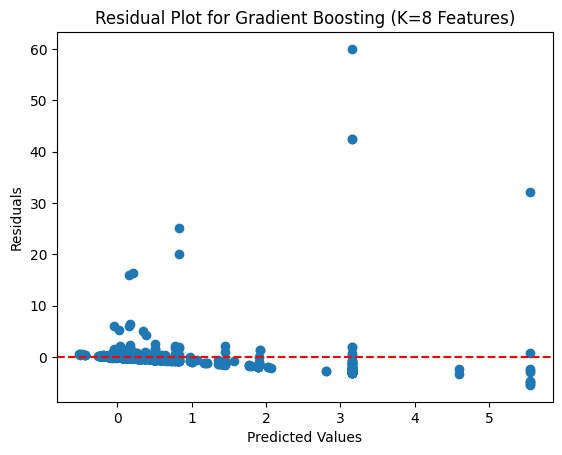

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest (k=8)
k_best_selector = SelectKBest(score_func=f_regression, k=8)  # Use f_regression for regression tasks
X_selected = k_best_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest (k=8):\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 7: Print evaluation metrics
print("\nGradient Boosting Model after KBest Feature Selection (k=8)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

# Step 8: Plot the residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Gradient Boosting (K=8 Features)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In this residual plot for the Gradient Boosting model with K=8 features, most of the residuals are centered around zero, indicating that the model performs well for many predictions. However, there are a few larger residuals, particularly around predicted values between 0 and 1, where the model underestimates the actual values. The residuals above 50 highlight cases where the model struggled significantly, indicating potential areas where the model does not fully capture the patterns in the data.

####Contextualization

The MSE value of 0.9504 indicates the average squared difference between predicted and actual campaign spending. This value represents the potential "loss" incurred due to prediction inaccuracies. A lower MSE suggests that the model is effectively minimizing errors, contributing to more precise predictions, which is essential for both candidates and sponsors in optimizing their budget allocations.

The RMSE of 0.9749 provides a clearer interpretation of the average error magnitude in the model's predictions. This relatively low RMSE indicates that the model's predictions are close to the actual spending values, reflecting a level of accuracy that can positively influence campaign budgeting strategies. Candidates can utilize these insights to allocate resources more effectively, while sponsors can gauge the financial requirements of campaigns more accurately.

The mean of the residuals at 0.0010 suggests that the model maintains a balanced approach in its predictions. For both candidates and sponsors, this is a favorable outcome, as it indicates a stable prediction landscape where financial planning can be conducted without undue risk of skewed estimates.

The R² value of 0.0956 signifies that approximately 9.56% of the variability in the target variable (AMNT) is explained by the model. While this improvement suggests that the model is capturing slightly more variability than previous iterations, it still highlights a significant portion of variability that remains unexplained. For candidates and sponsors, this indicates that there are likely additional critical factors influencing campaign spending that have not been included in the model, potentially leading to less effective strategic decisions.

##Conclusion Feature Selection Models

Overall, our best model for the feature selection was when we used the Gradient Boosting Model with K=8, as it gave us the closest value of R² to 1 and the lowest value for RMSE and MSE.

However, it is important to note that the model is still not performing well as we have an R² of 0.095 which suggesting that the model does not explain much of the variance in the target variable. Regarding the MSE and RMSE, we have a 0.950 and 0.974 respectively, meaning that the model doesn't do well when it comes to predicting accuracy. Lastly, the Mean of residuals is 0.001, which indicates that the model is not overpredicting or underpredicting.

This being so the selected features for our best model are: 'OFFICECD', 'CANCLASS', 'ORG_IND', 'Community Board', 'Community Council', 'State_Group', 'C_CODE_Group', 'PURPOSECD_Group'

Lastly, in comparison to the other models, their MSE and the RMSE increased their values and the R² decreased making them worse than the model we chose.

*You can find the contextualization above.*

#Modeling with SVR

##SVR Baseline

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Define features and target
X = df_cleaned.drop(columns=['AMNT'])
y = df_cleaned['AMNT']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define batch size
batch_size = 43896

# Kernels to be used
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

# Train and evaluate SVR models with different kernels
for kernel in kernels:
    # Create SVR model with the specified kernel
    model = SVR(kernel=kernel)

    # Fit the model on a batch of the training set
    model.fit(X_train[:batch_size], y_train[:batch_size])

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluative metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mean_residuals = np.mean(y_test - y_pred)

    # Display the results
    print(f"Kernel: {kernel}")
    print(f"  R^2: {r2:.4f}")
    print(f"  Mean Residuals: {mean_residuals:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print("\n")

Kernel: linear
  R^2: 0.0036
  Mean Residuals: -0.0294
  MSE: 1.0470
  RMSE: 1.0232


Kernel: rbf
  R^2: 0.0193
  Mean Residuals: -0.0299
  MSE: 1.0306
  RMSE: 1.0152


Kernel: poly
  R^2: 0.0165
  Mean Residuals: -0.0238
  MSE: 1.0334
  RMSE: 1.0166


Kernel: sigmoid
  R^2: -34407.1776
  Mean Residuals: -24.6569
  MSE: 36157.0090
  RMSE: 190.1500




The evaluation metrics indicate that the SVR model with the RBF kernel performed the best among all the kernels tested. The RBF kernel achieved the highest R² value of 0.0193, indicating that it was the most effective in explaining the variance in the target variable, even though this value is still quite low. Additionally, the RBF kernel had the lowest Mean Squared Error (MSE) of 1.0306 and the lowest Root Mean Squared Error (RMSE) of 1.0152, suggesting that it had the highest predictive accuracy among the kernels.

##KBest

###Kbest for 5 features

In [ ]:
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest (k=5)
k_best_selector = SelectKBest(score_func=f_regression, k=5)  # Use f_regression for regression tasks
X_selected = k_best_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest (k=5):\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the SVR model with RBF kernel
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mean_residuals = (y_test - y_pred).mean()

# Step 7: Print evaluation metrics
print("\nSVR Model (RBF kernel) after KBest Feature Selection (k=5)")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean of Residuals:", mean_residuals)

Selected Features using KBest (k=5):
 Index(['OFFICECD', 'CANCLASS', 'ORG_IND', 'State_Group', 'PURPOSECD_Group'], dtype='object')

SVR Model (RBF kernel) after KBest Feature Selection (k=5)
Mean Squared Error (MSE): 1.0338400774949035
R-squared (R²): 0.016164391367825437
Root Mean Squared Error (RMSE): 1.0167792668494493
Mean of Residuals: -0.03768391538997147


###Kbest for 8 features

In [ ]:
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest (k=8)
k_best_selector = SelectKBest(score_func=f_regression, k=8)  # Use f_regression for regression tasks
X_selected = k_best_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest (k=8):\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the SVR model with RBF kernel
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mean_residuals = (y_test - y_pred).mean()

# Step 7: Print evaluation metrics
print("\nSVR Model (RBF kernel) after KBest Feature Selection (k=8)")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean of Residuals:", mean_residuals)

Selected Features using KBest (k=8):
 Index(['OFFICECD', 'CANCLASS', 'ORG_IND', 'Community Board',
       'Community Council', 'State_Group', 'C_CODE_Group', 'PURPOSECD_Group'],
      dtype='object')

SVR Model (RBF kernel) after KBest Feature Selection (k=8)
Mean Squared Error (MSE): 1.0325263451039541
R-squared (R²): 0.01741458154188147
Root Mean Squared Error (RMSE): 1.016133035140554
Mean of Residuals: -0.03565542231234729


###Kbest for 10 features - best

In [ ]:
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest (k=10)
k_best_selector = SelectKBest(score_func=f_regression, k=10)  # Use f_regression for regression tasks
X_selected = k_best_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest (k=10):\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the SVR model with RBF kernel
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mean_residuals = (y_test - y_pred).mean()

# Step 7: Print evaluation metrics
print("\nSVR Model (RBF kernel) after KBest Feature Selection (k=10)")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean of Residuals:", mean_residuals)

Selected Features using KBest (k=10):
 Index(['OFFICECD', 'CANCLASS', 'FILING', 'ORG_IND', 'Longitude',
       'Community Board', 'Community Council', 'State_Group', 'C_CODE_Group',
       'PURPOSECD_Group'],
      dtype='object')

SVR Model (RBF kernel) after KBest Feature Selection (k=10)
Mean Squared Error (MSE): 1.0300058951131863
R-squared (R²): 0.019813123158398005
Root Mean Squared Error (RMSE): 1.0148920608188765
Mean of Residuals: -0.0311098690940344


###Kbest for 14 features

In [ ]:
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest (k=14)
k_best_selector = SelectKBest(score_func=f_regression, k=14)  # Use f_regression for regression tasks
X_selected = k_best_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest (k=14):\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the SVR model with RBF kernel
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mean_residuals = (y_test - y_pred).mean()

# Step 7: Print evaluation metrics
print("\nSVR Model (RBF kernel) after KBest Feature Selection (k=14)")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean of Residuals:", mean_residuals)

Selected Features using KBest (k=14):
 Index(['OFFICECD', 'CANCLASS', 'FILING', 'SCHEDULE', 'ORG_IND', 'Latitude',
       'Longitude', 'Community Board', 'Community Council', 'Census Tract',
       'EXEMPTCD', 'State_Group', 'C_CODE_Group', 'PURPOSECD_Group'],
      dtype='object')

SVR Model (RBF kernel) after KBest Feature Selection (k=14)
Mean Squared Error (MSE): 1.0301469362774733
R-squared (R²): 0.019678903831125583
Root Mean Squared Error (RMSE): 1.0149615442357771
Mean of Residuals: -0.030212908987812908


###Kbest for 15 features

In [ ]:
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest (k=15)
k_best_selector = SelectKBest(score_func=f_regression, k=15)  # Use f_regression for regression tasks
X_selected = k_best_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest (k=15):\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the SVR model with RBF kernel
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mean_residuals = (y_test - y_pred).mean()

# Step 7: Print evaluation metrics
print("\nSVR Model (RBF kernel) after KBest Feature Selection (k=15)")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean of Residuals:", mean_residuals)

Selected Features using KBest (k=15):
 Index(['OFFICECD', 'CANCLASS', 'FILING', 'SCHEDULE', 'ORG_IND', 'Latitude',
       'Longitude', 'Community Board', 'Community Council', 'Census Tract',
       'Borough', 'EXEMPTCD', 'State_Group', 'C_CODE_Group',
       'PURPOSECD_Group'],
      dtype='object')

SVR Model (RBF kernel) after KBest Feature Selection (k=15)
Mean Squared Error (MSE): 1.0302014221919842
R-squared (R²): 0.019627053275095174
Root Mean Squared Error (RMSE): 1.014988385249794
Mean of Residuals: -0.02981591872783757


The SVR model (RBF kernel) with Kbest feature selection performed best with K=10. The R² value of 0.0198 indicates that the model explains a very small portion of the variance in the target variable, which suggests poor predictive power. The Mean Squared Error (MSE) of 1.0300 and the Root Mean Squared Error (RMSE) of 1.0148 showed slight improvements compared to models using higher lower number of features. However, the mean of residuals at -0.0311indicates a slight bias toward overprediction. Despite this, the small gains in performance still reflect an overall weak model, as it fails to capture the significant factors that influence the target variable. The low R² combined with slightly lower error metrics suggests the model may be underfitting, indicating that while the predictions are close to the average, the underlying relationships between the features and target are not being effectively modeled.







##LASSO

###Alpha = 0.165

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Lasso model for feature selection (alpha=0.165)
lasso = Lasso(alpha=0.165)
lasso.fit(X_train, y_train)

# Step 4: Select features with non-zero coefficients (Lasso shrinks some coefficients to zero)
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features using Lasso (alpha=0.165):\n", selected_features)

# Step 5: Train the SVR model with RBF kernel using the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_selected, y_train)

# Step 6: Make predictions on the test set
y_pred = svr_model.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mean_residuals = (y_test - y_pred).mean()

# Step 8: Print evaluation metrics
print("\nSVR Model (RBF kernel) after Lasso Feature Selection (alpha=0.165)")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean of Residuals:", mean_residuals)

Selected Features using Lasso (alpha=0.165):
 Index(['State_Group'], dtype='object')

SVR Model (RBF kernel) after Lasso Feature Selection (alpha=0.165)
Mean Squared Error (MSE): 1.0484507271516936
R-squared (R²): 0.0022604252607749675
Root Mean Squared Error (RMSE): 1.0239388297899898
Mean of Residuals: -0.03606410760625965


###Alpha = 0.1

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Lasso model for feature selection (alpha=0.1)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Step 4: Select features with non-zero coefficients (Lasso shrinks some coefficients to zero)
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features using Lasso (alpha=0.1):\n", selected_features)

# Step 5: Train the SVR model with RBF kernel using the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_selected, y_train)

# Step 6: Make predictions on the test set
y_pred = svr_model.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mean_residuals = (y_test - y_pred).mean()

# Step 8: Print evaluation metrics
print("\nSVR Model (RBF kernel) after Lasso Feature Selection (alpha=0.1)")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean of Residuals:", mean_residuals)

Selected Features using Lasso (alpha=0.1):
 Index(['State_Group'], dtype='object')

SVR Model (RBF kernel) after Lasso Feature Selection (alpha=0.1)
Mean Squared Error (MSE): 1.0484507271516936
R-squared (R²): 0.0022604252607749675
Root Mean Squared Error (RMSE): 1.0239388297899898
Mean of Residuals: -0.03606410760625965


###Alpha = 0.05

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Lasso model for feature selection (alpha=0.05)
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

# Step 4: Select features with non-zero coefficients (Lasso shrinks some coefficients to zero)
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features using Lasso (alpha=0.05):\n", selected_features)

# Step 5: Train the SVR model with RBF kernel using the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_selected, y_train)

# Step 6: Make predictions on the test set
y_pred = svr_model.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mean_residuals = (y_test - y_pred).mean()

# Step 8: Print evaluation metrics
print("\nSVR Model (RBF kernel) after Lasso Feature Selection (alpha=0.05)")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean of Residuals:", mean_residuals)

Selected Features using Lasso (alpha=0.05):
 Index(['CANCLASS', 'State_Group', 'PURPOSECD_Group'], dtype='object')

SVR Model (RBF kernel) after Lasso Feature Selection (alpha=0.05)
Mean Squared Error (MSE): 1.0361083006731726
R-squared (R²): 0.01400587693248534
Root Mean Squared Error (RMSE): 1.017894051791822
Mean of Residuals: -0.03788496544327935


###Alpha = 0.01 - best

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Lasso model for feature selection (alpha=0.01)
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Step 4: Select features with non-zero coefficients (Lasso shrinks some coefficients to zero)
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features using Lasso (alpha=0.01):\n", selected_features)

# Step 5: Train the SVR model with RBF kernel using the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_selected, y_train)

# Step 6: Make predictions on the test set
y_pred = svr_model.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mean_residuals = (y_test - y_pred).mean()

# Step 8: Print evaluation metrics
print("\nSVR Model (RBF kernel) after Lasso Feature Selection (alpha=0.01)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Selected Features using Lasso (alpha=0.01):
 Index(['OFFICECD', 'CANCLASS', 'FILING', 'ORG_IND', 'State_Group',
       'C_CODE_Group', 'PURPOSECD_Group'],
      dtype='object')

SVR Model (RBF kernel) after Lasso Feature Selection (alpha=0.01)
Mean Squared Error (MSE): 1.0335113373811067
Root Mean Squared Error (RMSE): 1.0166175964349164
R-squared (R²): 0.016477231077737686
Mean of Residuals: -0.03722050085069612


The SVR model (RBF kernel) with Lasso feature selection performed best when using an alpha of 0.01, selecting the features 'OFFICECD', 'CANCLASS', 'FILING', 'ORG_IND', 'State_Group', 'C_CODE_Group', and 'PURPOSECD_Group'. The model had an R² of 0.0165, indicating that it explains only 1.65% of the variance in the target variable, which alludes to its weak predictive capability. The Mean Squared Error (MSE) was 1.0335, with a Root Mean Squared Error (RMSE) of 1.0166, showing a slight improvement over models using fewer features, such as those with alpha values of 0.1 or 0.165, which had an MSE of 1.0485. The mean of residuals for the model with alpha=0.01 was -0.0372, indicating a small tendency towards overprediction.


The fact that the mean of residuals, RMSE, and MSE are relatively small, but the R² is close to 0, suggests that the model may be underfitting. This indicates that while the model's predictions are generally close to the average of the target values, it fails to capture the true underlying relationships between the input features and the target variable.



##Decision Trees

###DT for features 5

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select the top 5 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_5_features = feature_importance_df['Feature'].head(5)
print("Top 5 selected features using Decision Tree:\n", top_5_features)

# Step 5: Train the SVR model with RBF kernel using the top 5 features
X_train_selected = X_train[top_5_features]
X_test_selected = X_test[top_5_features]

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_selected, y_train)

# Step 6: Make predictions on the test set
y_pred = svr_model.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mse ** 0.5
mean_residuals = (y_test - y_pred).mean()

# Step 8: Print evaluation metrics
print("\nSVR Model (RBF kernel) after Decision Tree Feature Selection (Top 5)")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean of Residuals:", mean_residuals)

Top 5 selected features using Decision Tree:
 5            Latitude
2              FILING
14    PURPOSECD_Group
12        State_Group
1            CANCLASS
Name: Feature, dtype: object

SVR Model (RBF kernel) after Decision Tree Feature Selection (Top 5)
Mean Squared Error (MSE): 1.0353821494827498
R-squared (R²): 0.014696905858467502
Root Mean Squared Error (RMSE): 1.0175372963595732
Mean of Residuals: -0.03736296084737093


###DT for features 8

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select the top 8 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_8_features = feature_importance_df['Feature'].head(8)
print("Top 8 selected features using Decision Tree:\n", top_8_features)

# Step 5: Train the SVR model with RBF kernel using the top 8 features
X_train_selected = X_train[top_8_features]
X_test_selected = X_test[top_8_features]

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_selected, y_train)

# Step 6: Make predictions on the test set
y_pred = svr_model.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mean_residuals = np.mean(y_test - y_pred)  # Mean of residuals

# Step 8: Print evaluation metrics
print("\nSVR Model (RBF kernel) after Decision Tree Feature Selection (Top 8)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)

Top 8 selected features using Decision Tree:
 5            Latitude
2              FILING
14    PURPOSECD_Group
12        State_Group
1            CANCLASS
6           Longitude
0            OFFICECD
9        Census Tract
Name: Feature, dtype: object

SVR Model (RBF kernel) after Decision Tree Feature Selection (Top 8)
Mean Squared Error (MSE): 1.0294855428432772
Root Mean Squared Error (RMSE): 1.0146356700034143
R-squared (R²): 0.020308307184741414
Mean of Residuals: -0.03338628846467302


###DT for features 10

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select the top 10 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_10_features = feature_importance_df['Feature'].head(10)
print("Top 10 selected features using Decision Tree:\n", top_10_features)

# Step 5: Train the SVR model with RBF kernel using the top 10 features
X_train_selected = X_train[top_10_features]
X_test_selected = X_test[top_10_features]

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_selected, y_train)

# Step 6: Make predictions on the test set
y_pred = svr_model.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mean_residual = np.mean(y_test - y_pred)

# Step 8: Print evaluation metrics
print("\nSVR Model (RBF kernel) after Decision Tree Feature Selection (Top 10)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residual)

Top 10 selected features using Decision Tree:
 5              Latitude
2                FILING
14      PURPOSECD_Group
12          State_Group
1              CANCLASS
6             Longitude
0              OFFICECD
9          Census Tract
8     Community Council
13         C_CODE_Group
Name: Feature, dtype: object

SVR Model (RBF kernel) after Decision Tree Feature Selection (Top 10)
Mean Squared Error (MSE): 1.0282868015371884
Root Mean Squared Error (RMSE): 1.0140447729450552
R-squared (R²): 0.021449068128470805
Mean of Residuals: -0.029633851845032887


###DT for features 14

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select the top 14 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_14_features = feature_importance_df['Feature'].head(14)
print("Top 14 selected features using Decision Tree:\n", top_14_features)

# Step 5: Train the SVR model with RBF kernel using the top 14 features
X_train_selected = X_train[top_14_features]
X_test_selected = X_test[top_14_features]

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_selected, y_train)

# Step 6: Make predictions on the test set
y_pred = svr_model.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mean_residual = np.mean(y_test - y_pred)

# Step 8: Print evaluation metrics
print("\nSVR Model (RBF kernel) after Decision Tree Feature Selection (Top 14)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residual)

Top 14 selected features using Decision Tree:
 5              Latitude
2                FILING
14      PURPOSECD_Group
12          State_Group
1              CANCLASS
6             Longitude
0              OFFICECD
9          Census Tract
8     Community Council
13         C_CODE_Group
7       Community Board
3              SCHEDULE
4               ORG_IND
10              Borough
Name: Feature, dtype: object

SVR Model (RBF kernel) after Decision Tree Feature Selection (Top 14)
Mean Squared Error (MSE): 1.029825451374441
Root Mean Squared Error (RMSE): 1.0148031589300661
R-squared (R²): 0.019984839248146202
Mean of Residuals: -0.029737151007022226


###DT for features 15

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select the top 15 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_15_features = feature_importance_df['Feature'].head(15)
print("Top 15 selected features using Decision Tree:\n", top_15_features)

# Step 5: Train the SVR model with RBF kernel using the top 15 features
X_train_selected = X_train[top_15_features]
X_test_selected = X_test[top_15_features]

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_selected, y_train)

# Step 6: Make predictions on the test set
y_pred = svr_model.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mean_residual = np.mean(y_test - y_pred)

# Step 8: Print evaluation metrics
print("\nSVR Model (RBF kernel) after Decision Tree Feature Selection (Top 15)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residual)

Top 15 selected features using Decision Tree:
 5              Latitude
2                FILING
14      PURPOSECD_Group
12          State_Group
1              CANCLASS
6             Longitude
0              OFFICECD
9          Census Tract
8     Community Council
13         C_CODE_Group
7       Community Board
3              SCHEDULE
4               ORG_IND
10              Borough
11             EXEMPTCD
Name: Feature, dtype: object

SVR Model (RBF kernel) after Decision Tree Feature Selection (Top 15)
Mean Squared Error (MSE): 1.0302014221919844
Root Mean Squared Error (RMSE): 1.014988385249794
R-squared (R²): 0.019627053275094952
Mean of Residuals: -0.029815918727836642


The SVR model (RBF kernel) with Decision Tree feature selection achieved the best performance when using the top 10 features, although overall the model's performance remained weak.

The R² of 0.0214 indicates that the model explains only a small portion of the variance in the target variable, suggesting poor predictive power. The Mean Squared Error (MSE) of 1.0283 and Root Mean Squared Error (RMSE) of 1.0140 were marginally better than models with fewer features, such as the top 5, which had an MSE of 1.0354 and RMSE of 1.0175. This indicates that the model suffers from the curse of dimensionality as it requires more features to produce better results. The mean of residuals for the top 10 feature model was -0.0296, showing slight overpredictions but not significant bias.

##Best SVR model with Residual Plot

The SVR model (RBF kernel) with Decision Tree feature selection achieved the best performance when using the top 10 features, although overall the model's performance remained weak.

The R² of 0.0214 indicates that the model explains only a small portion of the variance in the target variable, suggesting poor predictive power. The Mean Squared Error (MSE) of 1.0283 and Root Mean Squared Error (RMSE) of 1.0140 were marginally better than models with fewer features, such as the top 5, which had an MSE of 1.0354 and RMSE of 1.0175. This indicates that the model suffers from the curse of dimensionality as it requires more features to produce better results. The mean of residuals for the top 10 feature model was -0.0296, showing slight overpredictions but not significant bias.

All in all, the model cannot effectively capture the important drivers of the target variable. The low R² combined with small gains in RMSE and MSE indicates that the model may be underfitting, suggesting that the selected features are insufficient to explain the underlying relationships between the input features and target values effectively.

Top 10 selected features using Decision Tree:
 5              Latitude
2                FILING
14      PURPOSECD_Group
12          State_Group
1              CANCLASS
6             Longitude
0              OFFICECD
9          Census Tract
8     Community Council
13         C_CODE_Group
Name: Feature, dtype: object

SVR Model (RBF kernel) after Decision Tree Feature Selection (Top 10)
Mean Squared Error (MSE): 1.0282868015371884
Root Mean Squared Error (RMSE): 1.0140447729450552
R-squared (R²): 0.021449068128470805
Mean of Residuals: -0.029633851845032887


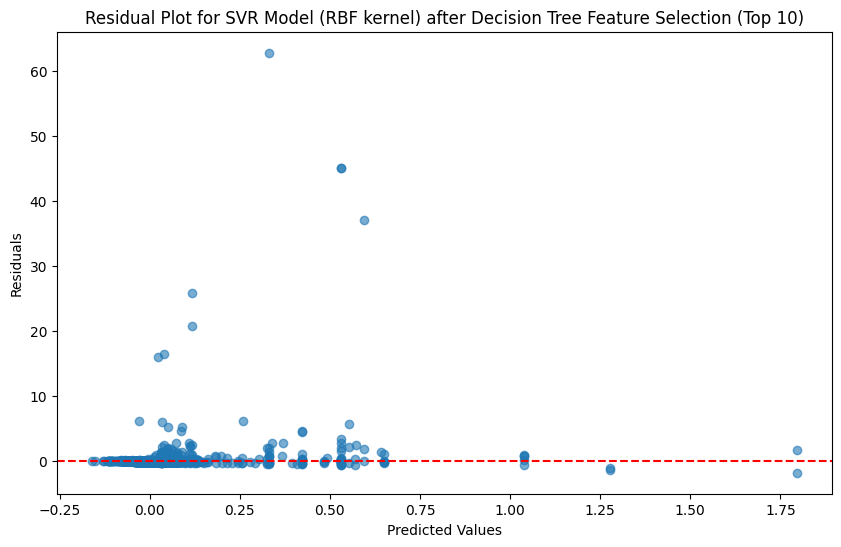

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Decision Tree Regressor to get feature importances
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Step 4: Get feature importances and select the top 10 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_10_features = feature_importance_df['Feature'].head(10)
print("Top 10 selected features using Decision Tree:\n", top_10_features)

# Step 5: Train the SVR model with RBF kernel using the top 10 features
X_train_selected = X_train[top_10_features]
X_test_selected = X_test[top_10_features]

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_selected, y_train)

# Step 6: Make predictions on the test set
y_pred = svr_model.predict(X_test_selected)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mean_residual = np.mean(y_test - y_pred)

# Step 8: Print evaluation metrics
print("\nSVR Model (RBF kernel) after Decision Tree Feature Selection (Top 10)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residual)

# Step 9: Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for SVR Model (RBF kernel) after Decision Tree Feature Selection (Top 10)')
plt.show()



In this residual plot, most of the residuals are clustered around zero, which indicates that the model is making reasonably accurate predictions for the majority of the data points. However, some residuals are much larger, especially at predicted values between 0 and 0.5, with a few extreme points reaching above 60 on the residual axis. These large residuals suggest that the model has made significant errors in some predictions, indicating that it may not fully capture some important aspects or complexities of the data.

##Contextualization

The SVR model (RBF kernel) with Decision Tree feature selection achieved the best performance when using the top 10 features, although overall the model's performance remained weak.


The R² value of 0.0214 indicates that the model explains only a small portion of the variance in the target variable, thus alluding to poor predictive power. This indicates that the features that impact expenditure amounts are not sufficiently represented. Therefore, this model would not be able to confidently guide campaign budgeting strategies.


It was previously explored that the Mean Squared Error (MSE) of 1.0283 and Root Mean Squared Error (RMSE) of 1.0140 were marginally better than those of models with fewer features. This suggests that using more features slightly improved the model's accuracy, however, it comes at a cost where additional computing power and energy fees would rise due to the curse of dimensionality.


The mean of residuals for the top 10 feature model was -0.0296, showing slight overprediction but not a significant bias. This indicates that, on average, the model tends to predict campaign spending slightly higher than the actual values, which could mislead these candidates to overestimate their budget for the campaign.


Overall, the SVR model with the top 10 features cannot effectively capture the important drivers of campaign spending. The low R² combined with small gains in RMSE and MSE indicates that the model may be underfitting. This is mainly due to the selected features being insufficient to explain the underlying relationships between the input features and the target variable effectively.


# Modeling with KNN

##KNN Baseline

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline KNN model without feature selection
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mean_residuals_knn = (y_test - y_pred_knn).mean()

# Print evaluation metrics for the KNN model
print("\nBaseline KNN Model")
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R-squared (R²):", r2_knn)
print("Mean of Residuals:", mean_residuals_knn)


Baseline KNN Model
Mean Squared Error (MSE): 1.046409933189539
Root Mean Squared Error (RMSE): 1.022941803422628
R-squared (R²): 0.0042025107085692515
Mean of Residuals: 0.009537244385799946


In the KNN model we can analyze that based on the metrics, it isn't a good model. Regarding the MSE we have a 1.046 and a 1.022 for the RMSE, meaning that the model doesn't does well predicting accuracy. Likewise, it happens with the R² as it has a 0.0042, meaning that the model is performing awfully, as it is not capturing the variability in the target variable 'AMNT'. In regard to the mean of residuals, we have a 0.00953, meaning that the model's predictions are, on average, it does not overestimate or underestimate the target variable.

##Kbest

###Kbest for 5 features

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest (k=5)
k_best_selector = SelectKBest(score_func=f_regression, k=5)  # Use f_regression for regression tasks
X_selected = k_best_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest (k=5):\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Baseline KNN model with KBest feature selection
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mean_residuals_knn = (y_test - y_pred_knn).mean()

# Print evaluation metrics for the KNN model
print("\nBaseline KNN Model after KBest Feature Selection (k=5)")
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R-squared (R²):", r2_knn)
print("Mean of Residuals:", mean_residuals_knn)

Selected Features using KBest (k=5):
 Index(['OFFICECD', 'CANCLASS', 'ORG_IND', 'State_Group', 'PURPOSECD_Group'], dtype='object')

Baseline KNN Model after KBest Feature Selection (k=5)
Mean Squared Error (MSE): 1.0224905035284864
Root Mean Squared Error (RMSE): 1.0111827250939793
R-squared (R²): 0.026965012521942944
Mean of Residuals: 0.00944546891132702


###Kbest for 8 features

In [ ]:
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Apply KBest feature selection (k=8)
k_best_selector = SelectKBest(score_func=f_regression, k=8)
X_selected = k_best_selector.fit_transform(X, y)
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest (k=8):\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Baseline KNN model with KBest feature selection
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mean_residuals_knn = (y_test - y_pred_knn).mean()

# Print evaluation metrics for the KNN model
print("\nBaseline KNN Model with KBest Feature Selection (k=8)")
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R-squared (R²):", r2_knn)
print("Mean of Residuals:", mean_residuals_knn)

Selected Features using KBest (k=8):
 Index(['OFFICECD', 'CANCLASS', 'ORG_IND', 'Community Board',
       'Community Council', 'State_Group', 'C_CODE_Group', 'PURPOSECD_Group'],
      dtype='object')

Baseline KNN Model with KBest Feature Selection (k=8)
Mean Squared Error (MSE): 0.9665621214564382
Root Mean Squared Error (RMSE): 0.983138912593962
R-squared (R²): 0.08018826727232542
Mean of Residuals: 0.014827876621548719


###Kbest for 10 features

In [ ]:
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Apply KBest feature selection (k=10)
k_best_selector = SelectKBest(score_func=f_regression, k=10)
X_selected = k_best_selector.fit_transform(X, y)
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest (k=10):\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Baseline KNN model with KBest feature selection
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mean_residuals_knn = (y_test - y_pred_knn).mean()

# Print evaluation metrics for the KNN model
print("\nBaseline KNN Model with KBest Feature Selection (k=10)")
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R-squared (R²):", r2_knn)
print("Mean of Residuals:", mean_residuals_knn)

Selected Features using KBest (k=10):
 Index(['OFFICECD', 'CANCLASS', 'FILING', 'ORG_IND', 'Longitude',
       'Community Board', 'Community Council', 'State_Group', 'C_CODE_Group',
       'PURPOSECD_Group'],
      dtype='object')

Baseline KNN Model with KBest Feature Selection (k=10)
Mean Squared Error (MSE): 1.0482004542619248
Root Mean Squared Error (RMSE): 1.0238166116360512
R-squared (R²): 0.002498593025973772
Mean of Residuals: 0.011161380178371875


###Kbest for 14 features

In [ ]:
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Apply KBest feature selection (k=14)
k_best_selector = SelectKBest(score_func=f_regression, k=14)
X_selected = k_best_selector.fit_transform(X, y)
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest (k=14):\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Baseline KNN model with KBest feature selection
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mean_residuals_knn = (y_test - y_pred_knn).mean()

# Print evaluation metrics for the KNN model
print("\nBaseline KNN Model with KBest Feature Selection (k=14)")
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R-squared (R²):", r2_knn)
print("Mean of Residuals:", mean_residuals_knn)

Selected Features using KBest (k=14):
 Index(['OFFICECD', 'CANCLASS', 'FILING', 'SCHEDULE', 'ORG_IND', 'Latitude',
       'Longitude', 'Community Board', 'Community Council', 'Census Tract',
       'EXEMPTCD', 'State_Group', 'C_CODE_Group', 'PURPOSECD_Group'],
      dtype='object')

Baseline KNN Model with KBest Feature Selection (k=14)
Mean Squared Error (MSE): 1.0463940177060456
Root Mean Squared Error (RMSE): 1.0229340241218128
R-squared (R²): 0.004217656396698688
Mean of Residuals: 0.009553060451153672


###Kbest for 15 features

In [ ]:
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Apply KBest feature selection (k=15)
k_best_selector = SelectKBest(score_func=f_regression, k=15)
X_selected = k_best_selector.fit_transform(X, y)
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest (k=15):\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Baseline KNN model with KBest feature selection
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mean_residuals_knn = (y_test - y_pred_knn).mean()

# Print evaluation metrics for the KNN model
print("\nBaseline KNN Model with KBest Feature Selection (k=15)")
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R-squared (R²):", r2_knn)
print("Mean of Residuals:", mean_residuals_knn)

Selected Features using KBest (k=15):
 Index(['OFFICECD', 'CANCLASS', 'FILING', 'SCHEDULE', 'ORG_IND', 'Latitude',
       'Longitude', 'Community Board', 'Community Council', 'Census Tract',
       'Borough', 'EXEMPTCD', 'State_Group', 'C_CODE_Group',
       'PURPOSECD_Group'],
      dtype='object')

Baseline KNN Model with KBest Feature Selection (k=15)
Mean Squared Error (MSE): 1.046409933189539
Root Mean Squared Error (RMSE): 1.022941803422628
R-squared (R²): 0.0042025107085692515
Mean of Residuals: 0.009537244385799946


The KNN model with KBest feature selection using k=8 features achieved moderate performance, though the overall results indicate a weak predictive model. The R² of 0.0802 suggests that the model explains only 8.02% of the variance in the target variable, implying limited predictive power. The Mean Squared Error (MSE) of 0.9666 and Root Mean Squared Error (RMSE) of 0.9831 indicate that while the predictions are somewhat close to the actual values. The mean of residuals at 0.0148 shows minimal bias in predictions, which is a positive indication. However, the overall low R² and relatively high RMSE suggest that the model may be underfitting, failing to capture the essential drivers of the target variable effectively. The selected features, such as 'OFFICECD', 'CANCLASS', and 'State_Group', may provide some predictive power but are insufficient to be trusted with confidence.

##LASSO

###Alpha = 0.165

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply LASSO feature selection (alpha=0.165)
lasso = Lasso(alpha=0.165)
lasso.fit(X_train, y_train)
selected_features = X.columns[np.abs(lasso.coef_) > 1e-5]
print("Selected Features using LASSO (alpha=0.165):\n", selected_features)

# Step 4: Train the KNN model with LASSO feature selection
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

knn_model = KNeighborsRegressor()
knn_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_selected)

# Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mean_residuals_knn = (y_test - y_pred_knn).mean()

# Print evaluation metrics for the KNN model
print("\nBaseline KNN Model with LASSO Feature Selection (alpha=0.165)")
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R-squared (R²):", r2_knn)
print("Mean of Residuals:", mean_residuals_knn)

Selected Features using LASSO (alpha=0.165):
 Index(['State_Group'], dtype='object')

Baseline KNN Model with LASSO Feature Selection (alpha=0.165)
Mean Squared Error (MSE): 1.0323847687175796
Root Mean Squared Error (RMSE): 1.0160633684557177
R-squared (R²): 0.017549310203778812
Mean of Residuals: 0.05539486942503046


###Alpha = 0.1

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply LASSO feature selection (alpha=0.1)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
selected_features = X.columns[np.abs(lasso.coef_) > 1e-5]
print("Selected Features using LASSO (alpha=0.1):\n", selected_features)

# Step 4: Train the KNN model with LASSO feature selection
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

knn_model = KNeighborsRegressor()
knn_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_selected)

# Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mean_residuals_knn = (y_test - y_pred_knn).mean()

# Print evaluation metrics for the KNN model
print("\nBaseline KNN Model with LASSO Feature Selection (alpha=0.1)")
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R-squared (R²):", r2_knn)
print("Mean of Residuals:", mean_residuals_knn)

Selected Features using LASSO (alpha=0.1):
 Index(['State_Group'], dtype='object')

Baseline KNN Model with LASSO Feature Selection (alpha=0.1)
Mean Squared Error (MSE): 1.0323847687175796
Root Mean Squared Error (RMSE): 1.0160633684557177
R-squared (R²): 0.017549310203778812
Mean of Residuals: 0.05539486942503046


###Alpha = 0.05

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply LASSO feature selection (alpha=0.05)
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
selected_features = X.columns[np.abs(lasso.coef_) > 1e-5]
print("Selected Features using LASSO (alpha=0.05):\n", selected_features)

# Step 4: Train the KNN model with LASSO feature selection
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

knn_model = KNeighborsRegressor()
knn_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_selected)

# Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mean_residuals_knn = (y_test - y_pred_knn).mean()

# Print evaluation metrics for the KNN model
print("\nBaseline KNN Model with LASSO Feature Selection (alpha=0.05)")
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R-squared (R²):", r2_knn)
print("Mean of Residuals:", mean_residuals_knn)

Selected Features using LASSO (alpha=0.05):
 Index(['CANCLASS', 'State_Group', 'PURPOSECD_Group'], dtype='object')

Baseline KNN Model with LASSO Feature Selection (alpha=0.05)
Mean Squared Error (MSE): 1.0183183555943816
Root Mean Squared Error (RMSE): 1.0091176123695302
R-squared (R²): 0.030935363247753145
Mean of Residuals: 0.032643052296967054


###Alpha = 0.01

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply LASSO feature selection (alpha=0.01)
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
selected_features = X.columns[np.abs(lasso.coef_) > 1e-5]
print("Selected Features using LASSO (alpha=0.01):\n", selected_features)

# Step 4: Train the KNN model with LASSO feature selection
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

knn_model = KNeighborsRegressor()
knn_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_selected)

# Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mean_residuals_knn = (y_test - y_pred_knn).mean()

# Print evaluation metrics for the KNN model
print("\nBaseline KNN Model with LASSO Feature Selection (alpha=0.01)")
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R-squared (R²):", r2_knn)
print("Mean of Residuals:", mean_residuals_knn)

Selected Features using LASSO (alpha=0.01):
 Index(['OFFICECD', 'CANCLASS', 'FILING', 'ORG_IND', 'State_Group',
       'C_CODE_Group', 'PURPOSECD_Group'],
      dtype='object')

Baseline KNN Model with LASSO Feature Selection (alpha=0.01)
Mean Squared Error (MSE): 1.0665490368830028
Root Mean Squared Error (RMSE): 1.0327386101444076
R-squared (R²): -0.014962510817366992
Mean of Residuals: 0.010550002658630583


The KNR model with LASSO feature selection (alpha=0.05) achieved modest performance, but overall, the results suggest a weak model. The R² value of 0.0309 indicates that the model explains only about 3.09% of the variance in the target variable, which points to poor predictive ability. The Mean Squared Error (MSE) of 1.0183 and the Root Mean Squared Error (RMSE) of 1.0091 show that there are not much of a difference betweeen the average and predicted values. The mean of residuals at 0.0326 indicates a slight tendency to underestimate, but overall, it is close to zero. Despite the minimal bias, the low R² value and high RMSE imply that the model might be underfitting, suggesting that the selected features 'CANCLASS', 'State_Group', and 'PURPOSECD_Group' do not sufficiently capture the relationships needed for accurate prediction.

##Decision Trees

###DT for features 5

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply Decision Tree Regressor to get feature importances and select the top 5 features
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

selected_features = feature_importance_df['Feature'].head(5)
print("Top 5 selected features using Decision Tree:\n", selected_features)

# Step 4: Train the KNN model with Decision Tree feature selection
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

knn_model = KNeighborsRegressor()
knn_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_selected)

# Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mean_residuals_knn = (y_test - y_pred_knn).mean()

# Print evaluation metrics for the KNN model
print("\nBaseline KNN Model with Decision Tree Feature Selection (Top 5 Features)")
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R-squared (R²):", r2_knn)
print("Mean of Residuals:", mean_residuals_knn)

Top 5 selected features using Decision Tree:
 5            Latitude
2              FILING
14    PURPOSECD_Group
12        State_Group
1            CANCLASS
Name: Feature, dtype: object

Baseline KNN Model with Decision Tree Feature Selection (Top 5 Features)
Mean Squared Error (MSE): 1.1033500046586535
Root Mean Squared Error (RMSE): 1.05040468613704
R-squared (R²): -0.04998350034752863
Mean of Residuals: 0.010326927383792957


###DT for features 8

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply Decision Tree Regressor to get feature importances and select the top 8 features
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

selected_features = feature_importance_df['Feature'].head(8)
print("Top 8 selected features using Decision Tree:\n", selected_features)

# Step 4: Train the KNN model with Decision Tree feature selection
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

knn_model = KNeighborsRegressor()
knn_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_selected)

# Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mean_residuals_knn = (y_test - y_pred_knn).mean()

# Print evaluation metrics for the KNN model
print("\nBaseline KNN Model with Decision Tree Feature Selection (Top 8 Features)")
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R-squared (R²):", r2_knn)
print("Mean of Residuals:", mean_residuals_knn)

Top 8 selected features using Decision Tree:
 5            Latitude
2              FILING
14    PURPOSECD_Group
12        State_Group
1            CANCLASS
6           Longitude
0            OFFICECD
9        Census Tract
Name: Feature, dtype: object

Baseline KNN Model with Decision Tree Feature Selection (Top 8 Features)
Mean Squared Error (MSE): 1.111044077313782
Root Mean Squared Error (RMSE): 1.0540607559878994
R-squared (R²): -0.0573054283887211
Mean of Residuals: 0.00810842307266933


###DT for features 10

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply Decision Tree Regressor to get feature importances and select the top 10 features
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

selected_features = feature_importance_df['Feature'].head(10)
print("Top 10 selected features using Decision Tree:\n", selected_features)

# Step 4: Train the KNN model with Decision Tree feature selection
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

knn_model = KNeighborsRegressor()
knn_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_selected)

# Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mean_residuals_knn = (y_test - y_pred_knn).mean()

# Print evaluation metrics for the KNN model
print("\nBaseline KNN Model with Decision Tree Feature Selection (Top 10 Features)")
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R-squared (R²):", r2_knn)
print("Mean of Residuals:", mean_residuals_knn)

Top 10 selected features using Decision Tree:
 5              Latitude
2                FILING
14      PURPOSECD_Group
12          State_Group
1              CANCLASS
6             Longitude
0              OFFICECD
9          Census Tract
8     Community Council
13         C_CODE_Group
Name: Feature, dtype: object

Baseline KNN Model with Decision Tree Feature Selection (Top 10 Features)
Mean Squared Error (MSE): 1.0715717023065763
Root Mean Squared Error (RMSE): 1.0351674754872162
R-squared (R²): -0.019742241456104592
Mean of Residuals: 0.011315703966434767


###DT for features 14

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply Decision Tree Regressor to get feature importances and select the top 14 features
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

selected_features = feature_importance_df['Feature'].head(14)
print("Top 14 selected features using Decision Tree:\n", selected_features)

# Step 4: Train the KNN model with Decision Tree feature selection
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

knn_model = KNeighborsRegressor()
knn_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_selected)

# Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mean_residuals_knn = (y_test - y_pred_knn).mean()

# Print evaluation metrics for the KNN model
print("\nBaseline KNN Model with Decision Tree Feature Selection (Top 14 Features)")
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R-squared (R²):", r2_knn)
print("Mean of Residuals:", mean_residuals_knn)

Top 14 selected features using Decision Tree:
 5              Latitude
2                FILING
14      PURPOSECD_Group
12          State_Group
1              CANCLASS
6             Longitude
0              OFFICECD
9          Census Tract
8     Community Council
13         C_CODE_Group
7       Community Board
3              SCHEDULE
4               ORG_IND
10              Borough
Name: Feature, dtype: object

Baseline KNN Model with Decision Tree Feature Selection (Top 14 Features)
Mean Squared Error (MSE): 1.0468041676265691
Root Mean Squared Error (RMSE): 1.0231344816917125
R-squared (R²): 0.0038273444853376137
Mean of Residuals: 0.00934519196401523


###DT for features 15

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply Decision Tree Regressor to get feature importances and select the top 15 features
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

selected_features = feature_importance_df['Feature'].head(15)
print("Top 15 selected features using Decision Tree:\n", selected_features)

# Step 4: Train the KNN model with Decision Tree feature selection
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

knn_model = KNeighborsRegressor()
knn_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_selected)

# Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mean_residuals_knn = (y_test - y_pred_knn).mean()

# Print evaluation metrics for the KNN model
print("\nBaseline KNN Model with Decision Tree Feature Selection (Top 15 Features)")
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R-squared (R²):", r2_knn)
print("Mean of Residuals:", mean_residuals_knn)

Top 15 selected features using Decision Tree:
 5              Latitude
2                FILING
14      PURPOSECD_Group
12          State_Group
1              CANCLASS
6             Longitude
0              OFFICECD
9          Census Tract
8     Community Council
13         C_CODE_Group
7       Community Board
3              SCHEDULE
4               ORG_IND
10              Borough
11             EXEMPTCD
Name: Feature, dtype: object

Baseline KNN Model with Decision Tree Feature Selection (Top 15 Features)
Mean Squared Error (MSE): 1.0464099278827144
Root Mean Squared Error (RMSE): 1.0229418008287248
R-squared (R²): 0.0042025157587148865
Mean of Residuals: 0.00953759653710487


The KNN model with Decision Tree feature selection (top 15 features) exhibited poor performance overall, as indicated by the negative R² value of 0.0042. The Mean Squared Error (MSE) of 1.0464 and Root Mean Squared Error (RMSE) of 1.0229 indicate minor discrepancies between predicted and averaged error values. The mean of residuals, at 0.00953, is close to zero, suggesting minimal bias in predictions, but this does not compensate for the overall lack of predictive power. The selected features such as 'Latitude', 'FILING', and 'PURPOSECD_Group' were insufficient to create a model that could effectively capture the underlying relationships in the target variable, indicating significant underfitting.

##Best KNN model with Residual Plot

The KNN model with KBest feature selection using k=8 features achieved moderate performance, though the overall results indicate a weak predictive model. The R² of 0.0802 suggests that the model explains only 8.02% of the variance in the target variable, implying limited predictive power. The Mean Squared Error (MSE) of 0.9666 and Root Mean Squared Error (RMSE) of 0.9831 indicate that while the predictions are somewhat close to the actual values. The mean of residuals at 0.0148 shows minimal bias in predictions, which is a positive indication. However, the overall low R² and relatively high RMSE suggest that the model may be underfitting, failing to capture the essential drivers of the target variable effectively. The selected features, such as 'OFFICECD', 'CANCLASS', and 'State_Group', may provide some predictive power but are insufficient to be trusted with confidence.

Selected Features using KBest (k=8):
 Index(['OFFICECD', 'CANCLASS', 'ORG_IND', 'Community Board',
       'Community Council', 'State_Group', 'C_CODE_Group', 'PURPOSECD_Group'],
      dtype='object')

Baseline KNR Model with KBest Feature Selection (k=8)
Mean Squared Error (MSE): 0.9665621214564382
Root Mean Squared Error (RMSE): 0.983138912593962
R-squared (R²): 0.08018826727232542
Mean of Residuals: 0.014827876621548719


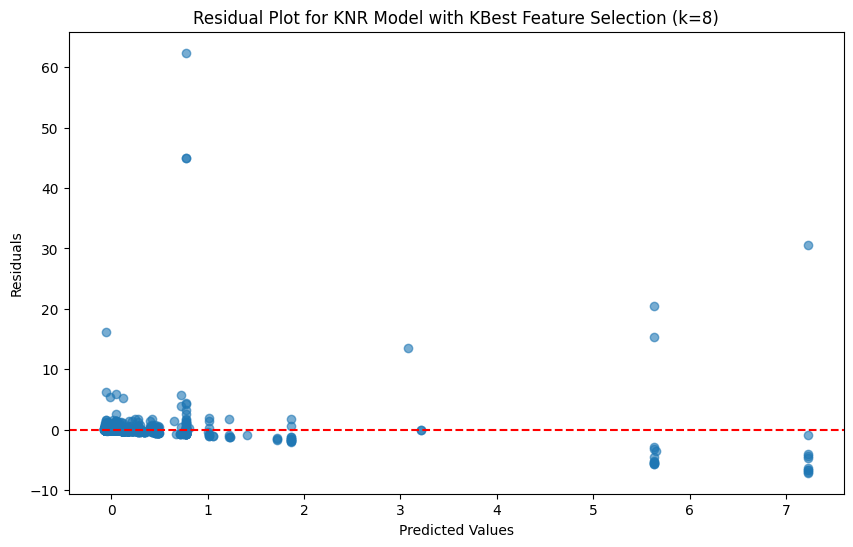

In [ ]:
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare the dataset (X and y)
X = pd.get_dummies(df_cleaned.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = df_cleaned['AMNT']  # Target variable

# Step 2: Apply KBest feature selection (k=8)
k_best_selector = SelectKBest(score_func=f_regression, k=8)
X_selected = k_best_selector.fit_transform(X, y)
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest (k=8):\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Baseline KNN model with KBest feature selection
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mean_residuals_knn = (y_test - y_pred_knn).mean()

# Print evaluation metrics for the KNN model
print("\nBaseline KNR Model with KBest Feature Selection (k=8)")
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R-squared (R²):", r2_knn)
print("Mean of Residuals:", mean_residuals_knn)

# Step 4: Plot a Residual Plot
residuals_knn = y_test - y_pred_knn

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_knn, residuals_knn, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for KNR Model with KBest Feature Selection (k=8)')
plt.show()


In this residual plot, most of the residuals are clustered close to zero, suggesting that the model is making reasonably accurate predictions for many data points. However, there are some residuals that are significantly larger, particularly around the predicted values close to zero and up to around 7. Additionally, a few extreme residual points above 60 on the residual axis indicate cases where the model made notably inaccurate predictions. These larger residuals imply that the model may not be fully capturing certain underlying patterns in the data, leading to inconsistent predictions for some instances.

##Contextualization

The KNN model with Kbest=8 (top 8 features) was the best model. However, it exhibited poor performance overall, as indicated by the R² value of 0.0802. The R² value indicates that the model fails to explain the variance in the target variable, suggesting extremely poor predictive power. This result implies that the features used do not sufficiently capture the factors influencing expenditure amount. Consequently, this model would not provide reliable guidance for campaign budgeting strategies.

The Mean Squared Error (MSE) of 0.9666 and Root Mean Squared Error (RMSE) of 0.9831 indicate only minor discrepancies between predicted and actual values. The mean of residuals, at 0.0148, is close to zero, suggesting minimal bias in predictions as it tends to make underpredictions on average. However, this minimal bias does not compensate for the model's lack of overall predictive power. The R² coupled with low MSE, RMSE, and mean of residuals implies that the model is actually underfit as it merely predicts values close to the means of the data points instead of the actual values, indicating that more complex relationships in the data remain unmodeled.

Overall, candidates may still struggle to use the model effectively for campaign expenditure planning, primarily due to the inadequacy of the selected features like 'OFFICECD', 'CANCLASS', and 'State_Group' in explaining the underlying relationships in the target variable.


##Conclusion for Clustering Models

Based on the analyses of both the SVR and KNN models, it is evident that the selected features and modeling approaches fail to effectively capture the complexity of campaign expenditure data. Out of the two modelling techniques, the KNN model with Kbest=8 (top 8 features) was the best model. Nonetheless, both models exhibited low RMSE, MSE, and mean of residuals values but a low and even the R² value which indicates significant underfitting. The inability of these clustering regression models to represent the underlying relationships suggests that these methods may not be suitable for predicting campaign expenditure in this context.

#Final Conclusion for the Models

Overall, our best model was Gradient Boosting when using Kbest = Top 8 features.

Where we have the following analysis:

The MSE value of 0.9504 indicates the average squared difference between predicted and actual campaign spending. This value represents the potential "loss" incurred due to prediction inaccuracies. A lower MSE suggests that the model is effectively minimizing errors, contributing to more precise predictions, which is essential for both candidates and sponsors in optimizing their budget allocations.

The RMSE of 0.9749 provides a clearer interpretation of the average error magnitude in the model's predictions. This relatively low RMSE indicates that the model's predictions are close to the actual spending values, reflecting a level of accuracy that can positively influence campaign budgeting strategies. Candidates can utilize these insights to allocate resources more effectively, while sponsors can gauge the financial requirements of campaigns more accurately.

The mean of the residuals at 0.0010 suggests that the model maintains a balanced approach in its predictions. For both candidates and sponsors, this is a favorable outcome, as it indicates a stable prediction landscape where financial planning can be conducted without undue risk of skewed estimates.

The R² value of 0.0956 signifies that approximately 9.56% of the variability in the target variable (AMNT) is explained by the model. While this improvement suggests that the model is capturing slightly more variability than previous iterations, it still highlights a significant portion of variability that remains unexplained. For candidates and sponsors, this indicates that there are likely additional critical factors influencing campaign spending that have not been included in the model, potentially leading to less effective strategic decisions.

## Analyzing the best performing model with a dataset with only outliers

In [ ]:
import pandas as pd

# Assuming df_cleaned is your dataset containing all the columns
# First, select only numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Create an empty DataFrame to store outliers
outliers_df = pd.DataFrame()

# Loop through each numeric column to calculate IQR and filter outliers
for col in numeric_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the outliers
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]

    # Append the outliers to the new DataFrame
    outliers_df = pd.concat([outliers_df, outliers], axis=0)

# Drop duplicate rows (since some rows may have been added multiple times if they are outliers in multiple columns)
outliers_df = outliers_df.drop_duplicates()

# Display the resulting dataset containing only outliers
print(outliers_df)

       OFFICECD  CANCLASS    FILING  SCHEDULE   ORG_IND  Latitude  Longitude  \
14     0.880198 -2.736957  0.896831 -0.144319  0.830455  0.062562  -0.200335   
15     0.880198 -2.736957  1.156311 -0.144319  0.830455  0.062562  -0.200335   
38     0.880198 -2.736957  1.156311 -0.144319  0.830455  0.062562  -0.200335   
39     0.880198 -2.736957 -1.438490 -0.144319  0.830455  0.062562  -0.200335   
40     1.467933 -2.736957 -1.697970 -0.144319  0.830455  0.062562  -0.200335   
...         ...       ...       ...       ...       ...       ...        ...   
58269 -1.470745  0.365369 -1.179010 -0.144319 -1.204159 -0.087669  -0.369678   
58345  0.292462  0.365369  1.415791 -0.144319  0.830455  0.874148   0.082951   
58354  0.880198  0.365369  0.377870 -0.144319  0.830455  0.911136  -0.391361   
58388  0.292462  0.365369 -0.400570 -0.144319  0.830455  0.462963  -0.589211   
58444 -1.470745  0.365369 -1.697970 -0.144319 -1.204159  0.062562  -0.200335   

       Community Board  Community Counc

In order to understand more in depth the nature of our data, we assumed that the reason average residuals were close to 0 is because of the extreme variance in the data, with a significant amount of spending higher than the average. We also did not want our model to have such low mean residuals because that would make our client's recommendation more confusing. In order to avoid that, we created a new data frame, called outliers_df, where we gathered all the outliers (data points outside the IQR range) from our standardized dataset, and plotted them in this specific dataset.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare the dataset (X and y) using outliers_df
X = pd.get_dummies(outliers_df.drop(columns=['AMNT']), drop_first=True)  # Convert categorical variables to numeric
y = outliers_df['AMNT']  # Target variable

# Step 2: Perform feature selection with SelectKBest (k=8)
k_best_selector = SelectKBest(score_func=f_regression, k=8)  # Use f_regression for regression tasks
X_selected = k_best_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features using KBest (k=8):\n", selected_features)

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)

# Calculate residuals and mean of residuals
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)

# Step 7: Print evaluation metrics
print("\nGradient Boosting Model after KBest Feature Selection (k=8)")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean of Residuals:", mean_residuals)


Selected Features using KBest (k=8):
 Index(['OFFICECD', 'CANCLASS', 'ORG_IND', 'Community Board',
       'Community Council', 'State_Group', 'C_CODE_Group', 'PURPOSECD_Group'],
      dtype='object')

Gradient Boosting Model after KBest Feature Selection (k=8)
Mean Squared Error (MSE): 2.1939240559497923
Root Mean Squared Error (RMSE): 1.4811900809652325
R-squared (R²): 0.08146677307826355
Mean of Residuals: 0.01193251260195301


After creating the outliers_df, we run a Gradient Boosting Model with K = 8 (considering this was the best performing model from our analysis) and we got the following result:

R2: 0.081
MSE: 2.19
RMSE: 1.48
Mean of Residuals: 0.011

These metric's outputs does not vary so much from what we already achieved with different models, which proved that our assumption of creating a DF with outliers would perform better was wrong! Further explanation about the residuals plot with be made below.

# Residual Plot and Boxplot for outlier_df

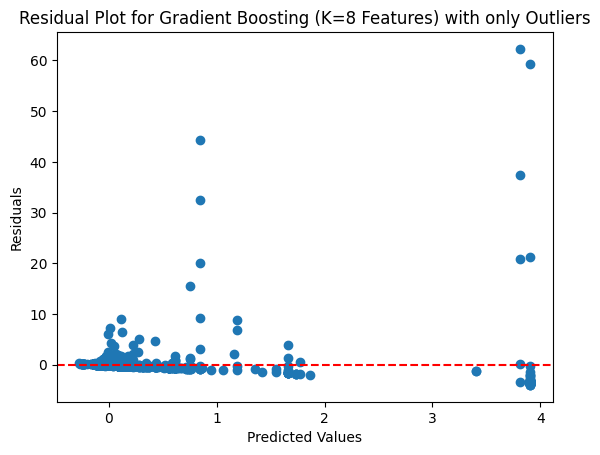

In [ ]:
import matplotlib.pyplot as plt

# Step 8: Plot the residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Gradient Boosting (K=8 Features) with only Outliers')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


- The majority of the residuals are close to 0, showing that similar to our previous models, the model predicts many points accurately.

- Some data points have high residuals value (up to 60) showing presence of clear outliers where the model's prediction differs in a significant way from the actual values

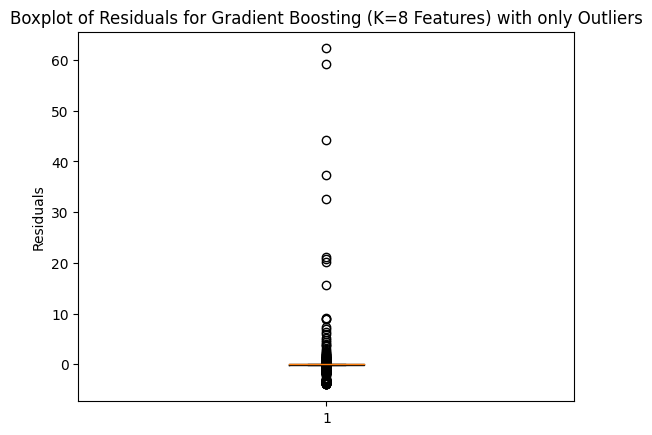

In [ ]:
import matplotlib.pyplot as plt

# Assuming residuals are already calculated
plt.boxplot(residuals)
plt.title('Boxplot of Residuals for Gradient Boosting (K=8 Features) with only Outliers')
plt.ylabel('Residuals')
plt.show()


- Significant Outliers: As shown before, there are many outliers above 10, showing that some predictions have substantial errors.

- The median is close to 0, showing that most residuals are small

To sum up, these plots show what it was commented above, that while the model performed well for the majority of predictions, it can certainly show some extreme deviations from the average, and this is precisely the point where we want to focus to our potential client, is to avoid these high-spending pattern, so in the future we can make for him an efficient and personalized campaign expenditure strategy.

# Conclusion and Recommendation

After this extensive analysis, passing through all the steps in the SEMMA process, and running a considerable amount of model, we as a consulting service company, came up with valuable insights and recommendations, that will be explained in a detail and descriptive manner below:


**Conclusions:**
1. **Geographic Location Matters:** There are a lot of observable trends between the expenditure data (Amount Spent) and the location it was spent (State groups, latitudes, longitudes) indicating that spending patterns are influenced by regional factors. However, borough, which is a more ''broad'' variable had no correlation with amount, suggesting that finer geographical details may hold more relevance than broader categories.


2. **Participant Impact:** The distinction between participants (candidates that participates in public funding programs) and non-participants (candidates that does not participate in public funding programs) significantly impacts expenditure values, with Participants usually engaging in a higher spending, which can give our client valuable insights in campaign strategy and resource allocation)


3. **Word Analysis Insights:** The analysis behind each campaign expending purpose column revealed some consistent pattern around key expenses, such as office, workers, and campaign in general.


4. **Expenditure Distribution:** The outlier analysis (even when we created a new df with only outliers as data points) showed significant variations in spending habits, with some candidates spending an extreme high amount. This shows a skewed data, indicating different strategies and profiles between candidates.

**Recommendations:**

1. **Targeted Geographic Campaigns:** We recommend our potential customer to focus its resources into regions where spending patterns suggests higher impact and visibility for our candidate. Focus on strategies to target these areas (especially the ones identified as high-spending zones) can maximize efficiency.


2. **Encourage Participant Dynamics:** As showed before, it is of extreme importance the presence of participants in our analysis. We recommend our target customer to engage in activities tied to higher expenditures.


3. **Optimize Key Expenses:**  We suggest our customer to allocate resources prioritizing the budget allocation towards areas that by their nature are efficient for their campaigns, such as campaign materials and office-related expense. Following this consistent patterns will optimize the candidate's campaign efficiency, considering it is a critical component for a campaign's success.


4. **Balance Outliers with Average Behavior:** To conclude, this is by far the most important recommendation, considering the fact that our model is neither over nor underpredicting. While outliers indicates high expenditures, the purpose of our goal should be balanced them against the most common spending habits, so instead of following the 'status quo' the candidates **can make informed decisions without overextending their campaign budget**.


For all of these topics mentioned above, we as a consultant service company will always be partnering and collaborating with our data engineers to improve and expand our dataset (with more columns that add-on to the analysis) in order for us to produce better performing models and also to help us to collect more recent data.


